In [4]:
import numpy as np
import pandas as pd
import json
import gensim
import collections
import matplotlib.pyplot as plt
import pprint
import itertools
import seaborn as sns
import networkx as nx
from IPython.display import display_svg
import tqdm
%matplotlib inline

In [298]:
with open("./lt.json", "r") as f:
    raw_lt = json.load(f)

In [299]:
lt_per_cat = {}
for ltid, value in raw_lt.items():
    if value['cat'] not in lt_per_cat:
        lt_per_cat[value['cat']] = [value['lt']]
    else:
        lt_per_cat[value['cat']].append(value['lt'])

In [5]:
def remove_symbols(value):
    return value.replace('-', '').replace('+', '').replace("'",'').replace('>','').replace('<','').replace('=','').replace('(', '').replace(')', '').replace('[', '').replace(']', '').replace('**', '').replace(':', '').replace(',', '').replace("_", " ")

def string_to_corpus(lt, max_len=None):
    words = [remove_symbols(t) for t in lt.split()]
    split_words = []
    for w in words:
        if len(w.split()) > 1: # さらに分割できる場合
            split_words.extend(w.split())
        else:
            split_words.append(w)
    split_words = [t.lower() for t in split_words if t != '']
    if max_len != None:
        split_words = split_words[:max_len] # 前方のみ残す

    return split_words

In [301]:
all_corpus = dict()
for cat, lts in lt_per_cat.items():
    corpus = []
    for lt in lts:
        words = [remove_symbols(t) for t in lt.split()]
        split_words = []
        for w in words:
            if len(w.split()) > 1: # さらに分割できる場合
                split_words.extend(w.split())
            else:
                split_words.append(w)
        split_words = [t.lower() for t in split_words if t != '']
        corpus.extend(split_words)
    all_corpus[cat] = corpus

In [302]:
df = dict()
for cat, words in all_corpus.items():
    for word in set(words):
        if word not in df:
            df[word] = 1
        else:
            df[word] += 1

In [303]:
tfidfs = {}
for cat, words in all_corpus.items():
    all_word_freq = len(words)
    tfidf_per_word = {}
    
    for word, cnt in collections.Counter(words).items():
        tf = cnt/all_word_freq
        tfidf = tf/np.log(len(all_corpus.keys())/df[word])
        tfidf_per_word[word] = tfidf
    
    tfidfs[cat] = tfidf_per_word

In [304]:
for cat, tfidfs_per_word in tfidfs.items():
    print(cat)
    pprint.pprint(sorted(tfidfs_per_word.items(), key=lambda x:x[1])[-10::][::-1])
    print()

system(cron)
[('cmd', 0.06515396958853382),
 ('/usr/sbin/cron', 0.062051399608127465),
 ('a', 0.025305948826832625),
 ('root', 0.021081836661046363),
 ('l', 0.015512849902031866),
 ('/usr/sbin/checksupport', 0.015512849902031866),
 ('adjkerntz', 0.015512849902031866),
 ('newsyslog', 0.015512849902031866),
 ('/etc/crontab', 0.007756424951015933),
 ('reload', 0.007756424951015933)]

network(lacp)
[('for', 0.053881120848471666),
 ('not', 0.049232804344377865),
 ('state', 0.04481276120079805),
 ('lacp', 0.04084605853077733),
 ('ifl', 0.0343498819259277),
 ('info', 0.0343498819259277),
 ('found', 0.025762411444445774),
 ('current', 0.01932180858333433),
 ('is', 0.014077243536330235),
 ('cleared', 0.014008650243425203)]

service(ntp)
[('xntpd', 0.05077808632528443),
 ('time', 0.04141687898056147),
 ('to', 0.04098784040868196),
 ('on', 0.024482162671878673),
 ('kernel', 0.020161887217392347),
 ('sync', 0.013441258144928232),
 ('from', 0.011633159386744283),
 ('reset', 0.01049574274388232),
 (

In [305]:
all_words = list(set([word for cat, words in all_corpus.items() for word in words]))
word_dict = {w:i for i, w in enumerate(all_words)}
inv_word_dict = {v:k for k,v in word_dict.items()}

corpus = []
for cat, lts in lt_per_cat.items():
    for lt in lts:
        words = [remove_symbols(t) for t in lt.split()]
        split_words = []
        for w in words:
            if len(w.split()) > 1: # さらに分割できる場合
                split_words.extend(w.split())
            else:
                split_words.append(w)
        split_words = [t.lower() for t in split_words if t != '']
        
        split_words = split_words[:10] # 前方のみ残す
        
        lt_word_id_cnt = collections.Counter([word_dict[w] for w in split_words])
        
        corpus.append([(tid, cnt) for tid, cnt in lt_word_id_cnt.items()])

In [306]:
# 単語のカウント
word_cnt = {}
for wid, cnt in sorted(collections.Counter([c[0] for s in corpus for c in s]).items(), key= lambda x: x[1])[::-1]:
    print(inv_word_dict[wid], cnt)
    word_cnt[inv_word_dict[wid]] = cnt

user 544
ui 543
mgd 505
cfg 470
audit 466
rpd 374
set 326
other 257
event 198
index 182
multicast 168
broadcast 168
protocols 139
delete 136
to 134
on 127
bgp 123
up 110
from 107
mpls 99
logicalsystems 98
/kernel 92
address 91
lsp 89
interfaces 87
for 87
# 73
group 72
routinginstances 69
evt 62
policyoptions 61
unit 61
login 61
init 60
family 60
updown 55
primary 54
is 52
as 49
mtu 48
port 47
received 46
file 45
system 44
failed 44
state 43
chassisd 42
snmp 42
routingoptions 42
error 42
change 42
alarm 41
policystatement 41
trap 41
sent 41
task 41
pic 41
read 40
of 40
interface 40
mcsn 39
add 37
pointtopoint 37
term 36
notification 36
peer 35
area 34
class 34
xntpd 34
code 33
down 32
message 32
pid 31
host 31
changed 31
not 31
cmd 31
secondary 30
neighbor 30
luchip 30
link 30
client 30
no 29
status 29
deactivate 28
connection 28
cleared 28
bandwidth 27
filter 27
firewall 27
junoscript 27
forwardingoptions 26
slot 26
signal 26
route 25
by 25
power 24
instance 24
ospf 24
static 24
pfe 24

In [ ]:
# LTレベルの共起
cor_df = pd.DataFrame(index=np.arange(len(word_dict)), columns=np.arange(len(word_dict)), dtype=int)
cor_df = cor_df.fillna(0)

for s in corpus:
    for a,b in itertools.combinations(s, 2):
        ida = int(a[0])
        idb = int(b[0])
        cor_df[ida][idb] += 1
        cor_df[idb][ida] += 1

cor_list = []
for a,b in itertools.combinations(np.arange(len(word_dict)), 2):
    if cor_df[a][b] != 0 :
        cor_list.append([(a, b) , cor_df[a][b]])
        
for i in tqdm.tqdm(sorted(cor_list, key=lambda x:x[1], reverse=True)):
    a,b = i[0]
    print(inv_word_dict[a], inv_word_dict[b], i[1])
    print("\t simpson:", i[1]/min(word_cnt[inv_word_dict[a]], word_cnt[inv_word_dict[b]]))
    print("\t jaccard:", i[1]/(word_cnt[inv_word_dict[a]] + word_cnt[inv_word_dict[b]] - i[1]))
    print()

In [ ]:
G = nx.DiGraph()
nx.set_node_attributes

for i in sorted(cor_list, key=lambda x:x[1], reverse=True):
    if i[1] > 9: # 共起が10回以上
        a,b = i[0]
        simpson = i[1]/min(word_cnt[inv_word_dict[a]], word_cnt[inv_word_dict[b]])
        jaccard = i[1]/(word_cnt[inv_word_dict[a]] + word_cnt[inv_word_dict[b]] - i[1])
        
        print(simpson)
        if simpson > 0.7:
            if a not in G.nodes:
                G.add_node(inv_word_dict[a])

            if b not in G.nodes:
                G.add_node(inv_word_dict[b])

            src = inv_word_dict[a] if np.argmin([word_cnt[inv_word_dict[a]], word_cnt[inv_word_dict[b]]]) == 0 else inv_word_dict[b]
            dst = inv_word_dict[a] if src == inv_word_dict[b] else inv_word_dict[b]
            G.add_edge(src, dst, weight=jaccard)

In [ ]:
json_data = nx.node_link_data(G)
f = open("nx.json", "w")
json.dump(json_data, f, ensure_ascii=False, indent=4, sort_keys=True, separators=(',', ': '))
f.close()

In [ ]:
plt.figure(figsize=(13, 13))
nx.draw_networkx(G, pos=nx.shell_layout(G))
plt.show()

## LDA

- __getItem__での結果は，inference(collect_stats=True)の結果をノーマライズしたものっぽい

In [307]:
for cat, lts in lt_per_cat.items():
    print(cat)

system(cron)
network(lacp)
service(ntp)
monitor(syslog)
network(mtu)
mgmt(login)
system(ui)
mgmt(command)
mgmt(ssh)
network(l2)
system(unix)
network(storm)
system(pic)
network(pfe)
system(ppe)
mgmt(pam)
mgmt(su)
egp(bgp)
network(mld)
system(fpc)
network(arp)
interface(port)
mgmt(config)
interface(agg)
monitor(snmp)
interface(if_event)
interface(vlan)
mgmt(enable)
vpn(mpls)
network(stp)
igp(ospf)
network(rsvp)
vpn(l2vc)
vpn(vpls)
network(tcp)
system(fan)
mgmt(ftp)
network(sfp)
system(power)
system(system_conf)
network(socket)
system(tnp)
system(alarm)
system(gres)
network(pim)
egp(msdp)
interface(interface)
system(others)
system(config_apply)
mgmt(config_process)
network(routing)
mgmt(ui_error)
system(None)
system(cos)
system(ppm)
monitor(bfd)
system(lisence)
network(icmp)
system(csu)
system(boot)
system(pci)
interface(inet6)
network(lldp)
network(mcsnoop)


In [308]:
STOP_WORDS = [word_dict[i] for i in ['and', 'of', 'from', 'to', 'in', 'on', 'is', 'for']]
# STOP_WORDS = []

In [260]:
tmp = []
eval_corpus = []
eval_corpus_ltids = []
for ltid, i in enumerate(corpus):
    if word_dict['ui'] not in [j[0] for j in i]: # uiを弾く(550番)
        tmp.append(tuple(sorted(i)))
        print(tuple(sorted(i)))
        eval_corpus.append(i)
        eval_corpus_ltids.append(ltid)
    
print(len(tmp))
set_corpus = list(set(tmp))

tmp = []
eval_corpus = []
eval_corpus_ltids = []
for ltid, i in enumerate(corpus):
    if word_dict['ui'] not in [j[0] for j in i]: # uiを弾く(550番)
        i = [j for j in i if j[0] not in STOP_WORDS]
        tmp.append(tuple(sorted(i)))
        print(tuple(sorted(i)))
        eval_corpus.append(i)
        eval_corpus_ltids.append(ltid)
    
print(len(tmp))
set_corpus2 = list(set(tmp))

((348, 1), (427, 1), (763, 1), (1161, 1))
((347, 1), (348, 1), (763, 1), (1578, 1))
((348, 1), (488, 1), (763, 1), (1593, 1))
((348, 1), (763, 1), (1161, 1))
((347, 1), (348, 1), (763, 1), (1578, 1))
((348, 1), (488, 1), (763, 1), (1593, 1))
((348, 1), (427, 1), (763, 1), (767, 1))
((348, 1), (366, 1), (1138, 1), (1217, 1))
((90, 1), (210, 1), (754, 1), (835, 1), (1116, 1), (1301, 1), (1628, 1))
((90, 1), (210, 1), (754, 1), (835, 1), (1116, 1), (1301, 1), (1357, 1), (1628, 1))
((90, 1), (623, 1), (754, 1), (835, 1), (1116, 1), (1301, 1), (1628, 1))
((90, 1), (623, 1), (754, 1), (835, 1), (1116, 1), (1301, 1), (1357, 1), (1628, 1))
((18, 1), (400, 2), (410, 1), (571, 1), (700, 1), (1301, 2), (1349, 1), (1526, 1))
((14, 1), (344, 1), (873, 1), (1110, 2), (1167, 2), (1173, 1), (1248, 1), (1301, 1))
((212, 1), (325, 1), (1205, 1), (1530, 1))
((424, 1), (843, 1), (1135, 1), (1205, 1), (1607, 1))
((592, 1), (1041, 1), (1205, 1), (1236, 1))
((54, 1), (80, 1), (291, 1), (641, 1), (1205, 1))
(

In [268]:
lda4 = gensim.models.ldamodel.LdaModel(
                                      corpus=set_corpus,
                                      chunksize=len(set_corpus),
                                      num_topics=40, 
                                      id2word=inv_word_dict, 
                                      minimum_probability=1e-8,
                                      iterations=100,
                                      update_every=0,
                                      decay=1.0,
                                      passes=200,
                                      per_word_topics=True)

In [266]:
len(set_corpus)

863

In [267]:
863/5

172.6

E stepとM step を172回やっている

In [331]:
# from IPython.core.debugger import Pdb; Pdb().set_trace()
lda = gensim.models.ldamodel.LdaModel(
                                      #corpus=corpus, 
                                      corpus=set_corpus,
                                      chunksize=5,
                                      num_topics=40, 
                                      id2word=inv_word_dict, 
                                      minimum_probability=1e-8, 
                                      #gamma_threshold=1e-5,
                                      #eval_every=10,
                                      iterations=100,
#                                       alpha='auto', 
#                                       eta='auto', 
                                      decay=1.0,
                                      passes=1,
                                      per_word_topics=True)

lda2 = gensim.models.ldamodel.LdaModel(
                                      #corpus=corpus, 
                                      corpus=set_corpus2,
                                      chunksize=5,
                                      num_topics=40, 
                                      id2word=inv_word_dict, 
                                      minimum_probability=1e-8, 
                                      #gamma_threshold=1e-5,
                                      #eval_every=10,
                                      iterations=100,
#                                       alpha='auto', 
#                                       eta='auto', 
                                      decay=1.0,
                                      passes=1,
                                      per_word_topics=True)

In [101]:
results =  [np.argmax(l) for l in lda.inference(eval_corpus)[0]]

inference_results = {}
for a,b in zip(eval_corpus, results):
    if b in inference_results:
        inference_results[b].append([inv_word_dict[c[0]] for c in a])
    else:
        inference_results[b] = [[inv_word_dict[c[0]] for c in a]]

In [310]:
inf_topic_words = {}
for topic in range(lda.num_topics):
    print(topic, [inv_word_dict[i[0]] for i in lda.get_topic_terms(topic)])
    inf_topic_words[topic] = [inv_word_dict[i[0]] for i in lda.get_topic_terms(topic)]

print()

# # inf_topic_words2 = {}
# for topic in range(lda4.num_topics):
#     print(topic, [inv_word_dict[i[0]] for i in lda4.get_topic_terms(topic)])
# #     inf_topic_words2[topic] = [inv_word_dict[i[0]] for i in lda2.get_topic_terms(topic)]
    
# print()

inf_topic_words2 = {}
for topic in range(lda2.num_topics):
    print(topic, [inv_word_dict[i[0]] for i in lda2.get_topic_terms(topic)])
    inf_topic_words2[topic] = [inv_word_dict[i[0]] for i in lda2.get_topic_terms(topic)]

0 ['port', 'pic', 'slot', 'by', 'chas', 'version', 'update', 'count', 'cm', 'builder']
1 ['read', 'pio', 'trinity', 'last', 'pcie', 'toe', 'generic', 'failure!', 'handle;', 'mq0']
2 ['/kernel', 'not', 'ok', 'jsr', 'ready', 'tcp', 'mode', 'auth', 'prl', 'ack']
3 ['cleared', 'ifl', 'mib2d', 'lacp', 'found', 'local', 'route', 'ethernet', 'ifinfo', 'bcm5389']
4 ['interface', 'rsp', 'proto', 'because', 'attempt', 'can', 'out', 'cant', 'enable', 'timed']
5 ['for', 'mcsn', 'device', 'create', 'rsvp', 'ae', 'bypass', 'intf', 'enabled', 'tlv']
6 ['no', 'config', 'configuration', 'socket', 'process', 'error.', 'management', 'was', 'time', 'empty']
7 ['pfe', 'after', 'cmtfpc', 'asic', 'client', 'rt', 'man', 'connected', 'mq', 'veto']
8 ['link', 'in', 'host', 'bundle', 'sfp', 'low', 'mic', 'down', 'has', 'cmt']
9 ['index', 'multicast', 'broadcast', 'event', 'mtu', 'up', 'add', 'loopback', 'flags', 'encapsulation']
10 ['task', 'reinitializing', 'ifd', 'reinit', 'done', 'reconfigure', 'pre', 'lldpd'

### eval

- 外れたやつについて，調査

In [42]:
for a,b in lt_per_cat.items():
    print(a, len(b))

system(cron) 8
network(lacp) 6
service(ntp) 35
monitor(syslog) 4
network(mtu) 26
mgmt(login) 38
system(ui) 41
mgmt(command) 24
mgmt(ssh) 18
network(l2) 15
system(unix) 35
network(storm) 6
system(pic) 35
network(pfe) 47
system(ppe) 6
mgmt(pam) 3
mgmt(su) 4
egp(bgp) 56
network(mld) 1
system(fpc) 76
network(arp) 6
interface(port) 10
mgmt(config) 491
interface(agg) 36
monitor(snmp) 80
interface(if_event) 133
interface(vlan) 6
mgmt(enable) 2
vpn(mpls) 85
network(stp) 12
igp(ospf) 15
network(rsvp) 14
vpn(l2vc) 2
vpn(vpls) 2
network(tcp) 4
system(fan) 2
mgmt(ftp) 4
network(sfp) 9
system(power) 8
system(system_conf) 1
network(socket) 6
system(tnp) 6
system(alarm) 45
system(gres) 7
network(pim) 4
egp(msdp) 10
interface(interface) 5
system(others) 6
system(config_apply) 2
mgmt(config_process) 1
network(routing) 4
mgmt(ui_error) 5
system(None) 228
system(cos) 10
system(ppm) 3
monitor(bfd) 3
system(lisence) 4
network(icmp) 2
system(csu) 6
system(boot) 4
system(pci) 17
interface(inet6) 1
network(ll

In [332]:
inf_per_cat = {}
for cat,lts in lt_per_cat.items():
    print(cat)
    inf_per_cat[cat] = []
    for lt in lts:
#         print(lt)
        c = list(collections.Counter([word_dict[w] for w in string_to_corpus(lt, max_len=7)]).items())
        topic_dist, word_topic, word_topic_dist = lda[c]
        inf_topic = np.argmax(np.array([t[1] for t in topic_dist]))
        inf_per_cat[cat].append(inf_topic)
        print("\t", inf_topic, ",", lt)
#         print()

system(cron)
	 16 , /usr/sbin/cron[**]: (root) CMD (newsyslog)
	 16 , /usr/sbin/cron[**]: (**) CMD (adjkerntz -a)
	 16 , /usr/sbin/cron[**]: (**) CMD (/usr/sbin/check-support -l)
	 16 , ** /usr/sbin/cron[**]: (**) CMD (newsyslog)
	 16 , ** /usr/sbin/cron[**]: (**) CMD (adjkerntz -a)
	 16 , ** /usr/sbin/cron[**]: (**) CMD (/usr/sbin/check-support -l)
	 16 , /usr/sbin/cron[**]: (root) CMD ( /usr/libexec/atrun)
	 16 , /usr/sbin/cron[**]: (*system*) RELOAD (/etc/crontab)
network(lacp)
	 36 , mib2d[**]: lacp info not found for ifl:**
	 36 , mib2d[**]: cleared lacp info not found for ifl:**
	 36 , ifinfo: lacp info not found for ifl:**
	 36 , ifinfo: cleared lacp info not found for ifl:**
	 36 , /kernel: KERN_LACP_INTF_STATE_CHANGE: lacp_update_state_userspace: new state is ** cifd **
	 18 , lacpd[**]: LACPD_TIMEOUT: **: lacp current while timer expired current Receive State: CURRENT
service(ntp)
	 2 , xntpd[**]: NTP Server Unreachable
	 38 , xntpd[**]: kernel time sync enabled **
	 16 , xnt

	 12 , mgd[**]: UI_JUNOSCRIPT_CMD: User '**' used JUNOScript client to run command 'commit-configuration check'
	 3 , ** mgd[**]: UI_JUNOSCRIPT_CMD: User '(unauthenticated user)' used JUNOScript client to run command 'request-authentication user=** logname=** host=** agent=mgd current-directory=/var/tmp pid=** ppid=**'
	 12 , ** mgd[**]: UI_JUNOSCRIPT_CMD: User '**' used JUNOScript client to run command '**'
	 16 , file[**]: UI_JUNOSCRIPT_CMD: User '**' used JUNOScript client to run command 'get-configuration format="**" '
	 16 , file[**]: UI_JUNOSCRIPT_CMD: User '**' used JUNOScript client to run command '**'
	 16 , file[**]: UI_JUNOSCRIPT_CMD: User '**' used JUNOScript client to run command 'load-configuration rollback="**" '
	 16 , file[**]: UI_JUNOSCRIPT_CMD: User '**' used JUNOScript client to run command 'load-configuration format="xml" action="**" '
	 12 , mgd[**]: UI_JUNOSCRIPT_CMD: User '**' used JUNOScript client to run command 'request-package-validate operation=validate pac

	 39 , rpd[**]: bgp_read_v4_message:**: NOTIFICATION received from ** (** AS **): code ** (Hold Timer Expired Error), socket buffer sndcc: ** rcvcc: ** TCP state: **, snd_una: ** snd_nxt: ** snd_wnd: ** rcv_nxt: ** rcv_adv: **, hold timer **
	 39 , rpd[**]: bgp_process_caps: mismatch NLRI with ** (** AS **): peer: <** **>(**) us: <**>(**)
	 39 , rpd[**]: bgp_read_message:**: NOTIFICATION sent to **+** (proto): code ** (Message Header Error) subcode ** (bad length) value **
	 39 , **: rpd[**]: bgp_hold_timeout:**: NOTIFICATION sent to ** (** AS **): code ** (Hold Timer Expired Error), Reason: holdtime expired for ** (** AS **), socket buffer sndcc: ** rcvcc: ** TCP state: **, snd_una: ** snd_nxt: ** snd_wnd: ** rcv_nxt: ** rcv_adv: **, hold timer **
	 39 , **:rpd[**]: RPD_BGP_NEIGHBOR_STATE_CHANGED: BGP peer ** (** AS **) changed state from ** to ** (event **)
	 39 , **: rpd[**]: bgp_read_v4_message:**: NOTIFICATION received from ** (** AS **): code ** (Hold Timer Expired Error), socket

	 30 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [interfaces **] <unconfigured> -> "**"
	 12 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' delete: [logical-systems ** interfaces ** unit **]
	 12 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' delete: [logical-systems ** routing-instances **]
	 35 , **:rpd[**]: RPD_TASK_REINIT: Reinitializing
	 35 , **: rpd[**]: task_reconfigure reinitializing done
	 12 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' deactivate: [chassis redundancy **]
	 12 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' deactivate: [routing-options] "**
	 12 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' activate: [chassis redundancy **]
	 12 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' activate: [routing-options] "**
	 12 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' set: [logical-systems ** interfaces ** unit **]
	 30 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [logical-systems ** interfaces ** unit ** vlan-id] <unconfigured> -> "**"
	 12 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' set: [logical-systems ** int

	 30 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [forwarding-options port-mirroring input run-length] <unconfigured> -> "**"
	 12 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' set: [forwarding-options port-mirroring family ** output interface **]
	 12 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' set: [forwarding-options port-mirroring family ** output interface ** next-hop **]
	 30 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [forwarding-options port-mirroring family ** output] <**> -> "**"
	 30 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [interfaces ** unit ** family ** address ** arp ** mac] <unconfigured> -> "**"
	 30 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [forwarding-options sampling instance ** input rate] "** -> "**"
	 30 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [forwarding-options sampling instance ** input run-length] "** -> "**"
	 34 , mgd[**]: UI_CFG_AUDIT_NEW: User '**' rename: [forwarding-options sampling instance ** family ** output flow-server **] to "**"
	 12 , mgd[**]: UI

	 12 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' deactivate: [logical-systems ** routing-instances ** routing-options static route **]
	 12 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' activate: [logical-systems ** routing-instances ** routing-options static route **]
	 30 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [policy-options as-path **] <unconfigured> -> "** ** **"
	 12 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' set: [policy-options policy-statement ** term ** from as-path **]
	 30 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [system login user ** uid] <unconfigured> -> "**"
	 12 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' delete: [firewall family ** filter ** term ** from destination-port] "**
	 12 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' set: [firewall family ** filter ** term ** from port **]
	 12 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' delete: [firewall family ** filter router-protection term ** from **]
	 12 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' delete: [firewall family ** filter ro

	 2 , mcsn[**]: received iff message ** ifl ** op ** flag **
	 22 , mcsn[**]: KRT Ifstate: iff message for ** without mesh-group tlv
	 15 , [**]: EVT ** ** E3 MAC 20120010 0800:000000000000 Port(**) detached from Channel Group(**) - Port down.
	 28 , /kernel: ** iff_ifarequest (**) addr: ** err **
	 30 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [interfaces ** aggregated-ether-options lacp] <unconfigured> -> "**"
	 30 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [interfaces ** aggregated-ether-options lacp periodic] <unconfigured> -> "**"
	 15 , [**]: EVT ** ** ** MAC ** **:** Channel Group(**) is Down - All port detached.
	 15 , [**]: EVT ** ** ** MAC ** **:** Port(**) removed from Channel Group(**).
	 15 , [**]: EVT ** ** ** MAC ** **:** Port(**) ** from Channel Group(**) - Denied by the LACP partner.
	 2 , ** dcd[**]: ** : Warning: aggregated-ether-options link-speed no kernel value! default to **
	 2 , ** dcd[**]: ** : aggregated-ether-options link-speed set to kernel value of **
	 

	 24 , mcsn[**]: EVENT <Add Bandwidth MTU> index ** <Broadcast Multicast>
	 24 , rpd[**]: EVENT <Add Bandwidth> index ** <Up Broadcast Multicast>
	 24 , rpd[**]: EVENT <Add> ** index ** <Up Broadcast Multicast>
	 24 , rpd[**]: EVENT <Add Bandwidth MTU Encapsulation> index ** <Broadcast Multicast>
	 24 , rpd[**]: EVENT <Add Bandwidth MTU Encapsulation> index ** <Broadcast Multicast> address #** **
	 24 , rpd[**]: EVENT <Add Bandwidth MTU> index ** <Broadcast Multicast>
	 24 , **: rpd[**]: EVENT <UpDown MTU> index ** <Up Broadcast Multicast>
	 24 , mcsn[**]: EVENT <UpDown MTU> index ** <Up Broadcast Multicast>
	 24 , mcsn[**]: EVENT <UpDown MTU> index ** <Up Broadcast Multicast> address #** **
	 24 , rpd[**]: EVENT <UpDown MTU> index ** <Up Broadcast Multicast>
	 24 , **: rpd[**]: EVENT Add ** index ** <Broadcast Multicast>
	 24 , rpd[**]: EVENT <Add> ** index ** <Broadcast Multicast> address #** **
	 11 , rpd[**]: EVENT <Flags> ** index ** <Broadcast Multicast> address #** **
	 24 , rpd

	 17 , rpd[**]: STP handler: index=**, op=**, state=**, tc-generation=**
	 39 , rpd[**]: STP **
	 17 , **: rpd[**]: STP handler: index=**, op=add, state=**, tc-generation=**
	 39 , **: rpd[**]: STP **
	 37 , **: rpd[**]: krt_stp_add_if: Adding ifl:** to STP: **
	 17 , ** eswd[**]: ESWD_STP_STATE_CHANGE_INFO: STP state for interface ** context id ** changed from ** to **
	 17 , **: rpd[**]: STP handler: index=**, op=delete, state=**, tc-generation=**
	 17 , mcsn[**]: snp_stp_add_ifbd: Adding bdid:**, ifl:** to STP: **
igp(ospf)
	 17 , **:rpd[**]: RPD_OSPF_NBRDOWN: OSPF neighbor ** (realm ** ** area **) state changed from ** to ** due to KillNbr (event reason: interface went down)
	 17 , rpd[**]: RPD_OSPF_NBRDOWN: OSPF neighbor ** (realm ** ** area **) state changed from ** to ** due to KillNbr (event reason: interface went down)
	 17 , **:rpd[**]: RPD_OSPF_NBRUP: OSPF neighbor ** (realm ** ** area **) state changed from ** to ** due to 2WayRcvd (event reason: neighbor detected this rout

	 0 , chassisd[**]: Use of MPC-3D-16XGE-SFPP in IP services mode requires L3 bundle or license
	 0 , CMT: Chassis has ** slots
	 6 , chassisd[**]: CHASSISD_IFDEV_CREATE_NOTICE: create_pics: created interface device for **
	 32 , **:rpd[**]: RPD_KRT_Q_RETRIES: Route Update: Device busy
	 21 , **: rpd[**]: l2vpn_dyn_config_repo_flush:Session DB still recoverying - postpone flush op
	 16 , eventd: sendto: No route to host
	 27 , Ignoring unsupported run-length config for sample class Sampler
	 1 , chassisd[**]: CHASSISD_IFDEV_DETACH_FPC: ifdev_detach_fpc(**)
	 1 , chassisd[**]: CHASSISD_IFDEV_DETACH_ALL_PSEUDO: ifdev_detach(pseudo devices: **)
	 16 , idpd[**]: IDP_COMMIT_COMPLETED: IDP policy commit is complete.
	 19 , relayd[**]: LIBJUNOS_SDK_RECEIVED_SIGTERM: Shutting down on SIGTERM.
	 4 , smartd[**]: smartd starting, pid **
	 13 , ksyncd[**]: ksyncd_select_control_plane_proto: rhost_sysctlbyname_get: No such file or directory
	 0 , clksyncd[**]: System has older ACBC FPGA image. Clock

	 27 , ** Ignoring unsupported run-length config for sample class Sampler
	 27 , fpc1 Ignoring unsupported run-length config for sample class Sampler
	 27 , fpc11 Ignoring unsupported run-length config for sample class Sampler
	 34 , /usr/sbin/sampled[**]: [edit forwarding-options sampling instance **] jflow config validation fail instance "**", Can not configure more than ** collector per interface "**"
	 35 , **: rpd[**]: task_process_events: no write/connect method for **+** socket **
	 34 , chas[**]: phy_qt2025_link_down_workaround: Resetting port ** for phy workaround
	 29 , /kernel: PCF8584(WR): target ack failure on byte **
	 29 , /kernel: PCF8584(WR): (**=**, group=**, device=**)
	 37 , [**]: RSP ** ** **(**):interface : Invalid line type.[**]
	 32 , mcsn[**]: krt_snooping_decode_bd_msg: bd **+** - op ** id ** rtb id **
	 32 , mcsn[**]: krt_snooping_decode_bd_msg: rtbid - **, bd - ** id ** CHANGE ignored
	 2 , mcsn[**]: krt_decode_iflogical: ** associated with l2 instance with 

In [333]:
inf_per_cat2 = {}
for cat,lts in lt_per_cat.items():
    print(cat)
    inf_per_cat2[cat] = []
    for lt in lts:
        c = list(collections.Counter([word_dict[w] for w in string_to_corpus(lt, max_len=7)]).items())
        topic_dist, word_topic, word_topic_dist = lda2[c]
        inf_topic = np.argmax(np.array([t[1] for t in topic_dist]))
        inf_per_cat2[cat].append(inf_topic)
        print("\t", inf_topic, ",", lt)

system(cron)
	 36 , /usr/sbin/cron[**]: (root) CMD (newsyslog)
	 36 , /usr/sbin/cron[**]: (**) CMD (adjkerntz -a)
	 36 , /usr/sbin/cron[**]: (**) CMD (/usr/sbin/check-support -l)
	 36 , ** /usr/sbin/cron[**]: (**) CMD (newsyslog)
	 36 , ** /usr/sbin/cron[**]: (**) CMD (adjkerntz -a)
	 36 , ** /usr/sbin/cron[**]: (**) CMD (/usr/sbin/check-support -l)
	 36 , /usr/sbin/cron[**]: (root) CMD ( /usr/libexec/atrun)
	 36 , /usr/sbin/cron[**]: (*system*) RELOAD (/etc/crontab)
network(lacp)
	 6 , mib2d[**]: lacp info not found for ifl:**
	 19 , mib2d[**]: cleared lacp info not found for ifl:**
	 32 , ifinfo: lacp info not found for ifl:**
	 32 , ifinfo: cleared lacp info not found for ifl:**
	 32 , /kernel: KERN_LACP_INTF_STATE_CHANGE: lacp_update_state_userspace: new state is ** cifd **
	 32 , lacpd[**]: LACPD_TIMEOUT: **: lacp current while timer expired current Receive State: CURRENT
service(ntp)
	 37 , xntpd[**]: NTP Server Unreachable
	 20 , xntpd[**]: kernel time sync enabled **
	 29 , xnt

	 39 , ** mgd[**]: UI_JUNOSCRIPT_CMD: User '(unauthenticated user)' used JUNOScript client to run command 'request-authentication user=** logname=** host=** agent=mgd current-directory=/var/tmp pid=** ppid=**'
	 36 , ** mgd[**]: UI_JUNOSCRIPT_CMD: User '**' used JUNOScript client to run command '**'
	 36 , file[**]: UI_JUNOSCRIPT_CMD: User '**' used JUNOScript client to run command 'get-configuration format="**" '
	 36 , file[**]: UI_JUNOSCRIPT_CMD: User '**' used JUNOScript client to run command '**'
	 36 , file[**]: UI_JUNOSCRIPT_CMD: User '**' used JUNOScript client to run command 'load-configuration rollback="**" '
	 36 , file[**]: UI_JUNOSCRIPT_CMD: User '**' used JUNOScript client to run command 'load-configuration format="xml" action="**" '
	 36 , mgd[**]: UI_JUNOSCRIPT_CMD: User '**' used JUNOScript client to run command 'request-package-validate operation=validate package-name=/var/tmp/mchassis-install.tgz **'
	 36 , mgd[**]: UI_JUNOSCRIPT_CMD: User '**' used JUNOScript client

	 4 , rpd[**]: bgp_read_v4_message:**: NOTIFICATION received from ** (** AS **): code ** (Hold Timer Expired Error), socket buffer sndcc: ** rcvcc: ** TCP state: **, snd_una: ** snd_nxt: ** snd_wnd: ** rcv_nxt: ** rcv_adv: **, hold timer **
	 4 , rpd[**]: bgp_process_caps: mismatch NLRI with ** (** AS **): peer: <** **>(**) us: <**>(**)
	 4 , rpd[**]: bgp_read_message:**: NOTIFICATION sent to **+** (proto): code ** (Message Header Error) subcode ** (bad length) value **
	 4 , **: rpd[**]: bgp_hold_timeout:**: NOTIFICATION sent to ** (** AS **): code ** (Hold Timer Expired Error), Reason: holdtime expired for ** (** AS **), socket buffer sndcc: ** rcvcc: ** TCP state: **, snd_una: ** snd_nxt: ** snd_wnd: ** rcv_nxt: ** rcv_adv: **, hold timer **
	 4 , **:rpd[**]: RPD_BGP_NEIGHBOR_STATE_CHANGED: BGP peer ** (** AS **) changed state from ** to ** (event **)
	 4 , **: rpd[**]: bgp_read_v4_message:**: NOTIFICATION received from ** (** AS **): code ** (Hold Timer Expired Error), socket buffe

	 33 , luchip_program_ucode_img ppe_mask is **, umem_addr **, download not done.
	 33 , luchip_program_ucode_img GUMEM ** gumem_mask is **, img **, download not done.
	 33 , luchip_program_ucode_img Success!!!
	 38 , CMT: No LU ** on **, skipping...
	 0 , LUCHIP(**): pio_handle(**); pio_read_u64() failed: **(generic failure)! IDMEM[**]-addr=**
	 33 , LUCHIP(**) IDMEM[**] read error.
	 0 , trinity_pio: Last error: ** ** Trinity PCI ** Read PCIe **
	 33 , LUCHIP(**) ** Errors ucode data error **
	 0 , LUCHIP(**) RD_NACK ** AP[**] TOE Read **
	 33 , LUCHIP(**) IDMEM Parity error in Bank **, Count **, IDMEM Bank ** Offset ** IDMEM[**]**
	 0 , LUCHIP(**): pio_handle(**); jspec_pio_read_u256 failed: **(generic failure)! gumem[%d].ucode.instr[%d]-addr=**
	 27 , LUCHIP(**) GUMEM[**].ucode.instr[**] read error.
	 14 , MQCHIP(**): jtag id ** major rev ** minor rev **
	 18 , Register MQ-CHIP rldram bist
	 18 , Register MQ-CHIP dmc bist
	 13 , Initializing MQ[**] JSPEC
	 14 , Registering MQ[**] Ho

	 16 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [interfaces ** unit ** family ** filter input] <unconfigured> -> "**"
	 16 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [interfaces ** unit ** family ** filter output] <unconfigured> -> "**"
	 16 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [class-of-service interfaces ** scheduler-map] <unconfigured> -> "**"
	 16 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [class-of-service interfaces ** shaping-rate] <unconfigured> -> "**"
	 11 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' set: [policy-options policy-statement ** term ** from route-filter ** **]
	 16 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [policy-options policy-statement ** term ** from family] <**> -> "**"
	 11 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' set: [policy-options policy-statement ** term ** from protocol **]
	 11 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' set: [policy-options policy-statement ** term ** then community add **]
	 16 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [poli

	 11 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' set: [forwarding-options sampling instance ** family ** output flow-server ** **]
	 16 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [forwarding-options sampling instance ** family ** output flow-server ** version9 template] <unconfigured> -> "**"
	 11 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' delete: [logical-systems ** routing-instances ** interface **]
	 11 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' delete: [logical-systems ** routing-instances ** protocols vpls site ** interface ** **]
	 11 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' delete: [logical-systems ** routing-instances ** protocols vpls site ** interface **]
	 11 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' set: [firewall family ** filter ** term ** from source-address **]
	 16 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [firewall family ** filter ** term ** then] <unconfigured> -> "**"
	 16 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [firewall family ** filter ** term ** then next] <unco

	 11 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' delete: [protocols pim interface **]
	 16 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [logical-systems ** interfaces ** unit **] <unconfigured> -> "**"
	 11 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' delete: [logical-systems ** interfaces ** unit **] "**
	 16 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [system syslog file messages match] <unconfigured> -> "!(.*PCI INFO: **:**:**:** Correctable Counts.*)"
	 11 , mgd[**]: UI_CFG_AUDIT_NEW: User '**' rename: [protocols bgp group ** neighbor **] to "**"
	 16 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [protocols bgp group ** local-as] <**> -> "**"
	 16 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [protocols bgp group ** neighbor ** local-as] <unconfigured> -> "**"
	 11 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' delete: [interfaces ** unit ** family ** sampling]
	 11 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' delete: [forwarding-options sampling instance **]
	 16 , mgd[**]: UI_CFG_AUDIT_SET: User '**' 

	 11 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' deactivate: [logical-systems ** protocols ** area ** interface **]
	 11 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' deactivate: [routing-instances ** routing-options rib ** static route **]
	 16 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [policy-options as-path-group ** as-path **] <unconfigured> -> "**+**+**+**"
	 16 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [policy-options policy-statement ** term ** then as-path-prepend] <unconfigured> -> "** **"
	 16 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [policy-options policy-statement ** term ** then as-path-prepend] <unconfigured> -> "** ** **"
	 11 , mgd[**]: UI_CFG_AUDIT_OTHER: User '**' deactivate: [policy-options policy-statement ** term **]
	 16 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [policy-options policy-statement ** term ** then as-path-prepend] <unconfigured> -> "**"
	 16 , mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [policy-options policy-statement ** term ** then as-path-prepend] 

	 22 , rpd[**]: EVENT <Bandwidth> index ** <Up Broadcast Multicast> address #** **
	 22 , rpd[**]: EVENT <Bandwidth> ** index ** <Up Broadcast Multicast> address #** **
	 22 , mcsn[**]: EVENT <Bandwidth UpDown> index ** <Broadcast Multicast> address #** **
	 22 , **: rpd[**]: EVENT <Bandwidth **> index ** <Broadcast Multicast> address #** **
	 22 , rpd[**]: EVENT <Bandwidth UpDown> index ** <Broadcast Multicast> address #** **
	 22 , rpd[**]: EVENT <Bandwidth> ** index ** <Broadcast Multicast> address #** **
	 22 , **: rpd[**]: EVENT <Bandwidth UpDown> ** index ** <Up Broadcast Multicast> address #** **
	 22 , mcsn[**]: EVENT <Bandwidth UpDown> index ** <Up Broadcast Multicast> address #** **
	 22 , rpd[**]: EVENT <Bandwidth UpDown> ** index ** <Up Broadcast Multicast> address #** **
	 22 , rpd[**]: EVENT Flags ** index ** ** -> (**) <Up Broadcast Multicast Localup>
	 22 , rpd[**]: EVENT <UpDown> ** index ** <Broadcast PointToPoint Multicast> address #** **
	 22 , rpd[**]: EVENT UpDown

	 29 , **: rpd[**]: RPD_MPLS_LSP_CHANGE: MPLS LSP ** change on primary(**) Route **(flag=**) **(Label=**) **(flag=**) **(Label=**) **(flag=**) **(flag=** Label=**) **(flag=**) **(Label=**) lsp bandwidth ** bps
	 29 , **:rpd[**]: RPD_MPLS_LSP_UP: MPLS LSP ** up on primary(**) Route **(flag=**) **(Label=**) **(flag=**) **(flag=** Label=**) **(flag=**) **(Label=**) lsp bandwidth ** bps
	 29 , **:rpd[**]: RPD_MPLS_LSP_UP: MPLS LSP ** ** on primary(**) Route **(flag=**) **(flag=** Label=**) **(flag=**) **(Label=**) **(flag=**) **(flag=** Label=**) **(flag=**) **(Label=**) **(flag=**) **(Label=**) lsp bandwidth ** bps
	 29 , **:rpd[**]: RPD_MPLS_LSP_UP: MPLS LSP ** up on primary(**) Route **(flag=**) **(Label=**) **(flag=**) **(flag=** Label=**) **(flag=**) **(flag=** Label=**) **(flag=**) **(Label=**) lsp bandwidth ** bps
	 29 , **:rpd[**]: RPD_MPLS_LSP_UP: MPLS LSP ** up on primary(**) Route **(flag=**) **(Label=**) **(flag=**) **(flag=** Label=**) **(flag=**) **(Label=**) **(flag=**) **(L

	 38 , chas[**]: link ** SFP receive power low ** **
	 38 , chassism[**]: link ** SFP laser bias current low ** cleared
	 38 , chassism[**]: link ** SFP output power low ** cleared
system(power)
	 32 , [**]: ERR ** ** ** PS ** **:** **, ** is power off.
	 2 , [**]: EVT ** ** R8 PS ** **:** **, **, **, ** is normal.
	 17 , chassisd[**]: CHASSISD_PEM_INPUT_BAD: status failure for power supply ** (status bits: **); check circuit breaker
	 17 , chassisd[**]: CHASSISD_PEM_INPUT_BAD: Input failure for power supply ** (status bits: **); check circuit breaker
	 32 , [**]: ERR ** ** ** PS ** **:** ** is power off.
	 2 , [**]: EVT ** ** R8 PS ** **:** ** is **
	 32 , [**]: ERR ** ** ** PS ** **:** ** is power off. **, ** is notconnect.
	 33 , [**]: ERR ** ** ** PS ** **:** **, **, ** is notconnect.
system(system_conf)
	 1 , chassisd[**]: CHASSISD_PARSE_COMPLETE: Using new configuration
network(socket)
	 24 , /kernel: peer_inputs: soreceive() error **
	 9 , /kernel: clearing slave peer
	 15 , /ke

	 24 , /kernel: jsr_prl_recv_ack_msg(): received PRL ACK message on non-active socket w/handle **
	 36 , SM: samples dropped due to high packet rate
	 9 , [**]: RSP ** ** **(**):** : This list cannot be set to this port.[**]
	 15 , /kernel: ipsec_is_inbound_pkt_valid(**): Socket option not set with the addr=**, ifl=**, rtbl_idx=**, so=**
	 13 , /kernel: **: DAD detected duplicate IPv6 address **: NS in/out=**, NA in=**
	 13 , /kernel: DAD complete - duplicate found **: manual intervention required
	 9 , rpd[**]: Cannot perform nh operation ADDANDGET nhop (**) type unilist index ** errno **
	 33 , [**]: ERR ** ** ** FAN ** **:** ** is notconnect.
	 2 , [**]: EVT ** ** R8 FAN ** **:** ** is normal.
	 28 , UI_CLI_MMAP_INCREASE: could not extend cli automore memory: quota crossed
	 31 , [**]: EVT ** ** ** PORT ** ** **:** Auto negotiation failed.
	 35 , [**]: RSP ** ** **(**):Standby system is not inactive.
	 4 , **:rpd[**]: RPD_KRT_VPLS_IFL_MODIFY: Unable to modify VPLS-related state: ** 

	 20 , [**]: EVT ** ** ** CSU ** **:** Other system recovered from fatal error. This system (**) is active.
system(boot)
	 24 , ** mgd[**]: UI_REBOOT_EVENT: System halted by '**'
	 24 , ** shutdown: halt by **:
	 24 , mgd[**]: UI_REBOOT_EVENT: System rebooted by '**'
	 24 , shutdown: reboot by **:
system(pci)
	 0 , PCI ERROR: **:**:**:** Timestamp **
	 33 , PCI ERROR: **:**:**:** err_dr : **
	 33 , PCI ERROR: **:**:**:** err_cap_stat : **
	 33 , PCI ERROR: **:**:**:** err_cap[0->**] : ** ** ** **
	 0 , PCI ERROR: **:**:**:** (**) Status : **
	 0 , PCI ERROR: **:**:**:** (**) ** status : **
	 0 , PCI ERROR: **:**:**:** (**) Link status : **
	 33 , PCI ERROR: **:**:**:** (**) Uncorrectable error status : **
	 0 , PCI ERROR: **:**:**:** (**) Advanced error cap & ctl : **
	 0 , PCI ERROR: **:**:**:** (**) Header log ** : **
	 33 , PCI ERROR: **:**:**:** (**) Root error status : **
	 33 , PCI ERROR: **:**:**:** (**) Error source ID : **
	 0 , PCI INFO: **:**:**:** Correctable Counts: ** **


In [31]:
inf_per_cat = {}
for cat,lts in lt_per_cat.items():
    print(cat)
    inf_per_cat[cat] = []
    for lt in lts:
        print(lt)
        c = list(collections.Counter([word_dict[w] for w in string_to_corpus(lt, max_len=7)]).items())
        topic_dist, word_topic, word_topic_dist = lda[c]
        inf_topic = np.argmax(np.array([t[1] for t in topic_dist]))
        inf_per_cat[cat].append(inf_topic)
        print("\t", inf_topic)
        print("\t", inf_topic_words[inf_topic])
        print("\t"+"-"*10)
        for w in word_topic_dist:
            print("\t", inv_word_dict[w[0]], w[1])
        print()

system(cron)
/usr/sbin/cron[**]: (root) CMD (newsyslog)
	 14
	 ['/usr/sbin/cron', 'cmd', 'after', 'retries', 'root', 'succeeded', 'newsyslog', 'q', '-l', 'reload']
	----------
	 /usr/sbin/cron [(14, 0.99999994)]
	 root [(14, 1.0)]
	 cmd [(14, 0.9999999)]
	 newsyslog [(14, 1.0)]

/usr/sbin/cron[**]: (**) CMD (adjkerntz -a)
	 14
	 ['/usr/sbin/cron', 'cmd', 'after', 'retries', 'root', 'succeeded', 'newsyslog', 'q', '-l', 'reload']
	----------
	 /usr/sbin/cron [(14, 0.99999994)]
	 cmd [(14, 0.9999999)]
	 adjkerntz [(14, 1.0000001)]
	 -a [(14, 1.0000001)]

/usr/sbin/cron[**]: (**) CMD (/usr/sbin/check-support -l)
	 14
	 ['/usr/sbin/cron', 'cmd', 'after', 'retries', 'root', 'succeeded', 'newsyslog', 'q', '-l', 'reload']
	----------
	 /usr/sbin/cron [(14, 0.99999994)]
	 cmd [(14, 0.9999999)]
	 /usr/sbin/check-support [(14, 1.0000001)]
	 -l [(14, 1.0000001)]

** /usr/sbin/cron[**]: (**) CMD (newsyslog)
	 14
	 ['/usr/sbin/cron', 'cmd', 'after', 'retries', 'root', 'succeeded', 'newsyslog', 'q', 

	 28
	 ['login', 'failed', 'sshd', 'user', 'exit', 'password', 'accepted', 'license-check', 'client', 'pam']
	----------
	 login [(28, 1.9999999)]
	 failure [(28, 0.22190039), (34, 0.7780996)]
	 from [(28, 0.8320353), (34, 0.16796473)]

login[**]: LOGIN_ABORTED: Client aborted login
	 28
	 ['login', 'failed', 'sshd', 'user', 'exit', 'password', 'accepted', 'license-check', 'client', 'pam']
	----------
	 login [(28, 3.0)]
	 aborted [(28, 1.9999999)]
	 client [(28, 1.0)]

login: LOGIN_FAILED: Login failed for user **[[B^[[** from host **
	 28
	 ['login', 'failed', 'sshd', 'user', 'exit', 'password', 'accepted', 'license-check', 'client', 'pam']
	----------
	 login [(28, 3.0)]
	 failed [(28, 1.9999999)]
	 for [(28, 1.0)]
	 user [(28, 0.99999994)]

login: LOGIN_FAILED_LIMIT: Specified number of login failures (**) for user '**[[B^[[**' reached from '**'
	 28
	 ['login', 'failed', 'sshd', 'user', 'exit', 'password', 'accepted', 'license-check', 'client', 'pam']
	----------
	 login [(28, 2.0

	----------
	 sshd [(28, 1.0)]
	 received [(19, 1.0)]
	 disconnect [(19, 0.9885146), (28, 0.011485407)]
	 from [(19, 0.70847255), (28, 0.29152748)]
	 logout [(19, 0.97798187), (28, 0.022018177)]

network(l2)
jl2tpd: jl2tpd: main: *** jl2tpd not running in active mode***
	 25
	 ['boot', '-x', 'tnp.bootpd', 'mgd', '/usr/libexec/ui/package', 'string', 'bootpd', 'jl2tpd', 'bootstring', 'identification']
	----------
	 jl2tpd [(25, 2.9999845)]
	 main [(25, 1.0000001)]
	 * [(25, 1.0000001)]
	 not [(13, 1.0)]
	 running [(25, 1.0000001)]

l2cp[**]: Initializing PNAC state machines
	 29
	 ['state', 'stp', 'local', 'handler', 'bfdd', 'l2cp', 'tc-generation', 'initializing', 'initialized', 'module']
	----------
	 l2cp [(29, 1.0)]
	 initializing [(29, 1.0)]
	 pnac [(29, 1.0)]
	 state [(29, 1.0)]
	 machines [(29, 1.0)]

l2cp[**]: Initializing PNAC state machines complete
	 29
	 ['state', 'stp', 'local', 'handler', 'bfdd', 'l2cp', 'tc-generation', 'initializing', 'initialized', 'module']
	----------


	 4
	 ['pfe', 'exited', 'rt', 'normal', 'veto', 'connected', 'possible', 'slowest', 'man', 'restart']
	----------
	 pfe [(4, 1.0)]
	 fabric [(4, 0.999979)]
	 probe [(4, 0.999979)]
	 thread [(21, 1.0)]
	 started [(1, 1.0)]
	 interval [(4, 0.999979)]
	 ms [(4, 0.999979)]

PFE[**]Aliveness Turning Destination ** on
	 20
	 ['xntpd', 'changed', 'time', 'mqchip', 'power', 'reset', 'timeout', 'destination', 'pfealiveness', 'turning']
	----------
	 pfealiveness [(20, 0.99999994)]
	 turning [(20, 0.99999994)]
	 destination [(20, 0.99999994)]
	 on [(20, 1.0)]

/kernel: if_pfe_peek_peer_info: peer_type **, peer_index **
	 21
	 ['bgp', 'peer', 'connection', 'notification', 'as', 'bulkget', 'master', 'recv', 'manager', 'if']
	----------
	 /kernel [(22, 1.0)]
	 if [(21, 1.0000001)]
	 pfe [(4, 1.0)]
	 peek [(4, 0.24239482), (21, 0.7566096)]
	 peer [(21, 2.0)]
	 info [(2, 0.99999994)]

/kernel: rt_pfe_veto: Too many delayed route/nexthop unrefs. Op **, rtsm_id **, msg type **
	 4
	 ['pfe', 'exited', '

	 rpd [(30, 1.0)]
	 bgp [(21, 0.99999994)]
	 read [(23, 0.99999994)]
	 v4 [(19, 0.3207356), (21, 0.6457514), (23, 0.033316158)]
	 message [(19, 1.0)]
	 notification [(21, 0.99999213)]
	 received [(19, 1.0)]

**: rpd[**]: bgp_read_v4_message:**: NOTIFICATION received from ** (** AS **): code ** (Hold Timer Expired Error), socket buffer sndcc: ** rcvcc: ** TCP state: **, snd_una: ** snd_nxt: ** snd_wnd: ** rcv_nxt: ** rcv_adv: **, hold timer **:**
	 21
	 ['bgp', 'peer', 'connection', 'notification', 'as', 'bulkget', 'master', 'recv', 'manager', 'if']
	----------
	 rpd [(30, 1.0)]
	 bgp [(21, 0.99999994)]
	 read [(23, 1.0)]
	 v4 [(19, 0.32063946), (21, 0.6458505), (23, 0.033313263)]
	 message [(19, 1.0)]
	 notification [(21, 0.999992)]
	 received [(19, 0.99999994)]

**: rpd[**]: bgp_pp_recv:**: NOTIFICATION sent to **+** (proto): code ** (Cease) subcode ** (Connection collision resolution), Reason: dropping **+** (proto), connection collision prefers ** (** AS **)
	 21
	 ['bgp', 'peer', '

	 16
	 ['rsp', 'vlan', 'invalid', 'cannot', 'duplicate', 'this', 'command', 'cant', 'because', 'standby']
	----------
	 /kernel [(22, 0.99999994)]
	 kern [(6, 0.99889493)]
	 arp [(6, 0.99868035)]
	 duplicate [(16, 1.9999999)]
	 addr [(30, 1.0)]
	 ip [(7, 0.99999994)]

/kernel: KERN_ARP_ADDR_CHANGE: nd6 info overwritten for **:**:**:**:**:**:**: from ** to **
	 6
	 ['mac', 'change', 'group', 'bundle', 'limit', 'chassism', 'channel', 'l2ald', 'ifd', 'setting']
	----------
	 /kernel [(22, 1.0)]
	 kern [(6, 0.9951567)]
	 arp [(6, 0.9972723)]
	 addr [(30, 1.0)]
	 change [(6, 1.0)]
	 nd6 [(2, 0.021273486), (6, 0.9719947)]
	 info [(2, 1.0)]

interface(port)
[**]: EVT ** ** ** PORT ** ** **:** Port disabled administratively.
	 27
	 ['evt', 'port', 'interface', 'config', 'configuration', 'many', 'administratively.', 'up.', 'mgmt', 'enabled']
	----------
	 evt [(27, 1.0)]
	 port [(27, 1.9999999)]
	 disabled [(20, 1.0)]
	 administratively. [(27, 1.0000001)]

[**]: EVT ** ** ** PORT ** ** **:** Po

	 audit [(25, 0.37416482), (28, 0.08703098), (35, 0.24116424), (36, 0.29764)]
	 set [(35, 2.0)]
	 user [(28, 1.0000001)]

mgd[**]: UI_CFG_AUDIT_OTHER: User '**' update: **+**
	 25
	 ['boot', '-x', 'tnp.bootpd', 'mgd', '/usr/libexec/ui/package', 'string', 'bootpd', 'jl2tpd', 'bootstring', 'identification']
	----------
	 mgd [(25, 1.0)]
	 ui [(25, 0.40757105), (28, 0.0912982), (34, 0.08662807), (36, 0.32095206), (37, 0.09355063)]
	 cfg [(36, 0.99999994)]
	 audit [(25, 0.40757105), (28, 0.0912982), (34, 0.08662807), (36, 0.32095206), (37, 0.09355063)]
	 other [(34, 0.99999994)]
	 user [(28, 0.99999994)]
	 update [(37, 0.99999994)]

mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [logical-systems ** interfaces ** unit ** encapsulation] <unconfigured> -> "**"
	 35
	 ['init', 'set', 'access', 'dcd', 'cmtfpc', 'kernel', 'incorrect', 'warning', 'write', 'can']
	----------
	 mgd [(25, 1.0)]
	 ui [(25, 0.37432733), (28, 0.087041646), (35, 0.24118377), (36, 0.29744735)]
	 cfg [(36, 0.9999996)]
	 audit 

	 25
	 ['boot', '-x', 'tnp.bootpd', 'mgd', '/usr/libexec/ui/package', 'string', 'bootpd', 'jl2tpd', 'bootstring', 'identification']
	----------
	 mgd [(25, 1.0)]
	 ui [(25, 0.44102314), (28, 0.09534014), (34, 0.09040445), (36, 0.3456284), (38, 0.02760382)]
	 cfg [(36, 0.99999994)]
	 audit [(25, 0.44102314), (28, 0.09534014), (34, 0.09040445), (36, 0.3456284), (38, 0.02760382)]
	 other [(34, 1.0)]
	 user [(28, 0.99999994)]
	 delete [(38, 0.99999994)]

mgd[**]: UI_CFG_AUDIT_OTHER: User '**' set: [policy-options policy-statement ** term ** from community **]
	 25
	 ['boot', '-x', 'tnp.bootpd', 'mgd', '/usr/libexec/ui/package', 'string', 'bootpd', 'jl2tpd', 'bootstring', 'identification']
	----------
	 mgd [(25, 1.0)]
	 ui [(25, 0.40704226), (28, 0.09127008), (34, 0.08660249), (35, 0.09394409), (36, 0.32114103)]
	 cfg [(36, 0.9999999)]
	 audit [(25, 0.40704226), (28, 0.09127008), (34, 0.08660249), (35, 0.09394409), (36, 0.32114103)]
	 other [(34, 1.0)]
	 user [(28, 1.0)]
	 set [(35, 1.0)]


	 rpd [(30, 1.0)]
	 synchronized [(20, 1.0)]
	 commit [(36, 0.9999952)]
	 processing [(36, 0.9999933)]
	 complete [(36, 0.99999994)]

** l2cp[**]: task_reconfigure reinitializing done
	 30
	 ['rpd', 'task', 'reinitializing', 'no', 'reinit', 'addr', 'connect', 'done', 'reconfigure', '+']
	----------
	 l2cp [(29, 1.0)]
	 task [(30, 1.0)]
	 reconfigure [(30, 0.99999994)]
	 reinitializing [(30, 1.0)]
	 done [(30, 0.99999994)]

** mcsn[**]: MCSN_TASK_REINIT: Reinitializing
	 30
	 ['rpd', 'task', 'reinitializing', 'no', 'reinit', 'addr', 'connect', 'done', 'reconfigure', '+']
	----------
	 mcsn [(5, 1.9999999)]
	 task [(30, 1.0)]
	 reinit [(5, 0.010874785), (30, 0.9891252)]
	 reinitializing [(30, 0.99999994)]

** mcsn[**]: task_reconfigure reinitializing done
	 30
	 ['rpd', 'task', 'reinitializing', 'no', 'reinit', 'addr', 'connect', 'done', 'reconfigure', '+']
	----------
	 mcsn [(5, 1.0)]
	 task [(30, 1.0)]
	 reconfigure [(30, 0.99999994)]
	 reinitializing [(30, 1.0)]
	 done [(30, 0.999999

	 36
	 ['complete', 'commit', 'cfg', 'processing', 'using', 'initialization', 'parse', 'edit', 'policy', 'idp']
	----------
	 mgd [(25, 1.0)]
	 ui [(25, 0.30053642), (28, 0.063764885), (36, 0.6356987)]
	 cfg [(36, 1.0000001)]
	 audit [(25, 0.30053642), (28, 0.063764885), (36, 0.6356987)]
	 new [(36, 1.0)]
	 user [(28, 1.0000001)]
	 rename [(25, 0.30053642), (28, 0.063764885), (36, 0.6356987)]

mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [protocols bgp group ** local-as] <**> -> "**"
	 35
	 ['init', 'set', 'access', 'dcd', 'cmtfpc', 'kernel', 'incorrect', 'warning', 'write', 'can']
	----------
	 mgd [(25, 1.0)]
	 ui [(25, 0.37428412), (28, 0.087042585), (35, 0.24119027), (36, 0.29748306)]
	 cfg [(36, 0.9999996)]
	 audit [(25, 0.37428412), (28, 0.087042585), (35, 0.24119027), (36, 0.29748306)]
	 set [(35, 1.9999999)]
	 user [(28, 1.0)]

mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [protocols bgp group ** neighbor ** local-as] <unconfigured> -> "**"
	 35
	 ['init', 'set', 'access', 'dcd', 'cmt

	 audit [(25, 0.37413418), (28, 0.08704895), (35, 0.24121176), (36, 0.29760507)]
	 set [(35, 2.0)]
	 user [(28, 1.0)]

mgd[**]: UI_CFG_AUDIT_OTHER: User '**' set: [routing-options rib-groups ** import-rib **]
	 25
	 ['boot', '-x', 'tnp.bootpd', 'mgd', '/usr/libexec/ui/package', 'string', 'bootpd', 'jl2tpd', 'bootstring', 'identification']
	----------
	 mgd [(25, 1.0)]
	 ui [(25, 0.40754026), (28, 0.09126675), (34, 0.08660058), (35, 0.093947195), (36, 0.3206452)]
	 cfg [(36, 0.99999994)]
	 audit [(25, 0.40754026), (28, 0.09126675), (34, 0.08660058), (35, 0.093947195), (36, 0.3206452)]
	 other [(34, 1.0)]
	 user [(28, 0.99999994)]
	 set [(35, 1.0)]

mgd[**]: UI_CFG_AUDIT_OTHER: User '**' delete: [routing-options rib-groups ** import-rib] "**
	 25
	 ['boot', '-x', 'tnp.bootpd', 'mgd', '/usr/libexec/ui/package', 'string', 'bootpd', 'jl2tpd', 'bootstring', 'identification']
	----------
	 mgd [(25, 1.0)]
	 ui [(25, 0.4416178), (28, 0.09532946), (34, 0.0904043), (36, 0.34504676), (38, 0.02760

	 34
	 ['error', 'status', 'pci', 'err', 'failure', 'detected', 'csu', 'ps', 'other', 'iff']
	----------
	 /kernel [(22, 0.99999994)]
	 iff [(34, 0.9925095)]
	 ifarequest [(22, 0.06577346), (34, 0.9251004)]
	 addr [(30, 0.99999994)]
	 err [(34, 1.0)]

mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [interfaces ** aggregated-ether-options lacp] <unconfigured> -> "**"
	 35
	 ['init', 'set', 'access', 'dcd', 'cmtfpc', 'kernel', 'incorrect', 'warning', 'write', 'can']
	----------
	 mgd [(25, 1.0)]
	 ui [(25, 0.37343687), (28, 0.08705747), (35, 0.24122868), (36, 0.298277)]
	 cfg [(36, 0.9999996)]
	 audit [(25, 0.37343687), (28, 0.08705747), (35, 0.24122868), (36, 0.298277)]
	 set [(35, 2.0)]
	 user [(28, 1.0000001)]

mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [interfaces ** aggregated-ether-options lacp periodic] <unconfigured> -> "**"
	 35
	 ['init', 'set', 'access', 'dcd', 'cmtfpc', 'kernel', 'incorrect', 'warning', 'write', 'can']
	----------
	 mgd [(25, 1.0)]
	 ui [(25, 0.37404174), (28, 0.087

	 generated [(7, 1.0000001)]

chassisd[**]: CHASSISD_SNMP_TRAP7: SNMP trap generated: FRU insertion (jnxFruContentsIndex **, jnxFruL1Index **, jnxFruL2Index **, jnxFruL3Index **, jnxFruName PIC: @ **, jnxFruType **, jnxFruSlot **)
	 7
	 ['chassisd', 'trap', 'snmp', 'create', 'ifdev', 'cm', 'detach', 'input', 'socket', 'bad']
	----------
	 chassisd [(7, 1.9999999)]
	 snmp [(7, 2.0)]
	 trap7 [(7, 1.0000001)]
	 trap [(7, 1.0)]
	 generated [(7, 1.0000001)]

rpd[**]: EVENT <SNMP Index> ** index ** <Up Broadcast Loopback Multicast>
	 38
	 ['index', 'broadcast', 'event', 'rpd', 'multicast', 'up', 'updown', 'mtu', 'add', '-']
	----------
	 rpd [(38, 0.99999994)]
	 event [(38, 1.0)]
	 snmp [(7, 1.0000001)]
	 index [(38, 1.9999999)]
	 up [(38, 1.0)]
	 broadcast [(38, 1.0)]

snmpd[**]: SNMPD_SEND_FAILURE: trap_io_send_trap_now: send to (**) failure: No route to host
	 0
	 ['snmpd', 'send', 'sa', 'mib2d', 'queue', 'software', 'partial', 'v', 'vq', 'allocate']
	----------
	 snmpd [(0, 2.0000002)]
	

	 38
	 ['index', 'broadcast', 'event', 'rpd', 'multicast', 'up', 'updown', 'mtu', 'add', '-']
	----------
	 rpd [(38, 0.99999994)]
	 event [(38, 0.99999994)]
	 updown [(38, 1.0000001)]
	 index [(38, 0.99999994)]
	 up [(38, 1.0)]
	 broadcast [(38, 0.99999994)]
	 multicast [(38, 1.0)]

mcsn[**]: EVENT <UpDown> index ** <Up Broadcast Multicast>
	 38
	 ['index', 'broadcast', 'event', 'rpd', 'multicast', 'up', 'updown', 'mtu', 'add', '-']
	----------
	 mcsn [(5, 1.0)]
	 event [(38, 1.0)]
	 updown [(38, 0.996718)]
	 index [(38, 1.0)]
	 up [(38, 0.9999259)]
	 broadcast [(38, 1.0)]
	 multicast [(38, 1.0)]

rpd[**]: EVENT <UpDown> index ** <Up Broadcast Multicast>
	 38
	 ['index', 'broadcast', 'event', 'rpd', 'multicast', 'up', 'updown', 'mtu', 'add', '-']
	----------
	 rpd [(38, 0.99999994)]
	 event [(38, 1.0)]
	 updown [(38, 1.0)]
	 index [(38, 0.99999994)]
	 up [(38, 1.0)]
	 broadcast [(38, 1.0)]
	 multicast [(38, 1.0)]

mcsn[**]: EVENT <Delete> index ** <Broadcast Multicast>
	 38
	 ['index'

	 lsp [(30, 0.14298925), (37, 1.8570108)]
	 change [(6, 1.0)]

**:rpd[**]: RPD_MPLS_LSP_CHANGE: MPLS LSP ** change on secondary(**) Route **(flag=**) **(flag=** Label=**) **(flag=**) **(flag=** Label=**) ** lsp bandwidth ** bps
	 37
	 ['link', 'down', 'mpls', 'neighbor', 'op', 'id', 'rsvp', 'lsp', 'ae', 'update']
	----------
	 rpd [(30, 2.0)]
	 mpls [(30, 0.112475395), (37, 1.8875246)]
	 lsp [(30, 0.1429804), (37, 1.8570197)]
	 change [(6, 1.0)]

**:rpd[**]: RPD_MPLS_LSP_CHANGE: MPLS LSP ** change on secondary(**) Route **(flag=**) **(flag=** Label=**) ** lsp bandwidth ** bps
	 37
	 ['link', 'down', 'mpls', 'neighbor', 'op', 'id', 'rsvp', 'lsp', 'ae', 'update']
	----------
	 rpd [(30, 1.9999999)]
	 mpls [(30, 0.11219898), (37, 1.887801)]
	 lsp [(30, 0.14263466), (37, 1.8573651)]
	 change [(6, 1.0)]

**:rpd[**]: RPD_MPLS_LSP_CHANGE: MPLS LSP ** change on secondary(**) Route **(flag=**) **(Label=**) **(flag=**) **(flag=** Label=**) ** lsp bandwidth ** bps
	 37
	 ['link', 'down', 'mpls', 

	 22
	 ['/kernel', 'ok', 'jsr', 'msg', 'tcp', 'packet', 'ready', 'auth', 'count', 'sdrl']
	----------
	 /kernel [(22, 1.0)]
	 tcp [(22, 1.0)]
	 auth [(22, 1.0)]
	 ok [(22, 1.0)]
	 packet [(22, 1.0)]
	 from [(22, 1.0)]
	 unexpectedly [(22, 1.0)]

system(fan)
chassisd[**]: CHASSISD_BLOWERS_SPEED_MEDIUM: Fans and impellers being set to intermediate speed
	 7
	 ['chassisd', 'trap', 'snmp', 'create', 'ifdev', 'cm', 'detach', 'input', 'socket', 'bad']
	----------
	 chassisd [(7, 1.9999999)]
	 blowers [(7, 1.0000001)]
	 speed [(7, 1.0)]
	 medium [(7, 0.99999994)]
	 fans [(7, 1.0000001)]
	 and [(7, 1.0)]

chassisd[**]: CHASSISD_BLOWERS_SPEED: Fans and impellers are now running at normal speed
	 7
	 ['chassisd', 'trap', 'snmp', 'create', 'ifdev', 'cm', 'detach', 'input', 'socket', 'bad']
	----------
	 chassisd [(7, 2.0)]
	 blowers [(7, 1.0000001)]
	 speed [(7, 1.0)]
	 fans [(7, 1.0000001)]
	 and [(7, 1.0)]
	 impellers [(7, 1.0)]

mgmt(ftp)
ftpd[**]: connection from ** (**)
	 21
	 ['bgp', 'peer'

	 30
	 ['rpd', 'task', 'reinitializing', 'no', 'reinit', 'addr', 'connect', 'done', 'reconfigure', '+']
	----------
	 rpd [(30, 2.0)]
	 msdp [(30, 1.0)]
	 src [(17, 0.072288595), (30, 0.9277114)]
	 active [(17, 1.0)]
	 under [(17, 0.13143866), (30, 0.86856127)]
	 thresh [(17, 0.12260343), (30, 0.8773966)]

rpd[**]: RPD_MSDP_PEER_DOWN: MSDP peer ** peer-group ** out of Established state
	 30
	 ['rpd', 'task', 'reinitializing', 'no', 'reinit', 'addr', 'connect', 'done', 'reconfigure', '+']
	----------
	 rpd [(30, 1.9999999)]
	 msdp [(21, 0.15864599), (30, 1.8304884), (37, 0.010865712)]
	 peer [(21, 2.0)]
	 down [(37, 1.0)]

rpd[**]: RPD_MSDP_SRC_ACTIVE_OVER_LIMIT: Number of MSDP source-active messages about instance "**" exceeded configured limit
	 30
	 ['rpd', 'task', 'reinitializing', 'no', 'reinit', 'addr', 'connect', 'done', 'reconfigure', '+']
	----------
	 rpd [(30, 1.9999999)]
	 msdp [(30, 0.99999994)]
	 src [(17, 0.065061785), (30, 0.93493813)]
	 active [(17, 1.0)]
	 over [(17, 0

	 perms [(21, 0.01404805), (22, 0.9441678), (37, 0.04178412)]

/kernel: SGLink(RD): GBUS error [**] at device **, address **, slave reply CRC error, slave error reply
	 31
	 ['at', 'inetd', 'number', 'max', 'connections', 'retry', 'passed', 'ddr3', 'verify', 'sglinkrd']
	----------
	 /kernel [(22, 1.0)]
	 sglinkrd [(31, 0.99812555)]
	 gbus [(31, 0.9914393)]
	 error [(34, 1.0)]
	 at [(31, 1.0)]
	 device [(17, 0.99999994)]
	 address [(24, 0.99999994)]

/kernel: SGLink(RD): SGLS error [**] at device **, illegal command error
	 31
	 ['at', 'inetd', 'number', 'max', 'connections', 'retry', 'passed', 'ddr3', 'verify', 'sglinkrd']
	----------
	 /kernel [(22, 1.0)]
	 sglinkrd [(31, 0.99864715)]
	 sgls [(31, 0.9972919)]
	 error [(34, 1.0)]
	 at [(31, 1.0)]
	 device [(17, 0.99999994)]
	 illegal [(31, 0.9972919)]

/kernel: init: sntpsync (PID **) SIGTERM sent
	 1
	 ['sent', 'signal', 'pid', 'terminate', 'sending', 'due', 'dropped', 'no-', 'termination', 'vccp']
	----------
	 /kernel [(22, 0.99999

	 13
	 ['not', 'register', 'request', 'jspec', 'bist', 'hostif', 'lu-chip', 'tcam', 'fpga', 'rldram']
	----------
	 register [(13, 1.0)]
	 rldram [(13, 1.0)]
	 bist [(13, 1.0)]

** hostif_show_stream_config: stream ID **, op id **, start buffer ID **, end buffer ID **
	 37
	 ['link', 'down', 'mpls', 'neighbor', 'op', 'id', 'rsvp', 'lsp', 'ae', 'update']
	----------
	 hostif [(13, 1.0)]
	 show [(37, 0.9990563)]
	 stream [(13, 0.01804786), (37, 1.9807388)]
	 config [(27, 1.0)]
	 id [(37, 0.99898267)]
	 op [(37, 1.0)]

** hostif_show_stream_config: head buffer ID **, tail buffer ID **
	 37
	 ['link', 'down', 'mpls', 'neighbor', 'op', 'id', 'rsvp', 'lsp', 'ae', 'update']
	----------
	 hostif [(13, 0.99999994)]
	 show [(37, 0.9990497)]
	 stream [(37, 0.99030435)]
	 config [(27, 1.0)]
	 head [(37, 0.9934451)]
	 buffer [(37, 0.9934451)]
	 id [(37, 0.9989754)]

** block addr **
	 30
	 ['rpd', 'task', 'reinitializing', 'no', 'reinit', 'addr', 'connect', 'done', 'reconfigure', '+']
	----------
	

	 ['rsp', 'vlan', 'invalid', 'cannot', 'duplicate', 'this', 'command', 'cant', 'because', 'standby']
	----------
	 evt [(27, 1.0)]
	 csu [(34, 1.0)]
	 this [(16, 0.99999994)]
	 system [(19, 1.0)]
	 changed [(20, 1.0)]
	 from [(16, 0.58085066), (19, 0.080217734), (20, 0.11451686), (27, 0.104038686), (34, 0.12037612)]
	 standby [(16, 0.9984587)]

[**]: EVT ** ** ** CSU ** **:** Standby system activated administratively.
	 27
	 ['evt', 'port', 'interface', 'config', 'configuration', 'many', 'administratively.', 'up.', 'mgmt', 'enabled']
	----------
	 evt [(27, 1.0)]
	 csu [(34, 1.0)]
	 standby [(16, 0.99688405)]
	 system [(19, 1.0)]
	 activated [(16, 0.317004), (27, 0.6744945)]
	 administratively. [(27, 1.0)]

[**]: EVT ** ** ** CSU ** **:** System status changed from simplex to duplex.
	 34
	 ['error', 'status', 'pci', 'err', 'failure', 'detected', 'csu', 'ps', 'other', 'iff']
	----------
	 evt [(27, 0.9999999)]
	 csu [(34, 1.0)]
	 system [(19, 1.0)]
	 status [(34, 1.0)]
	 changed [(20, 

In [61]:
inf_per_cat2 = {}
for cat,lts in lt_per_cat.items():
    print(cat)
    inf_per_cat2[cat] = []
    for lt in lts:
        print(lt)
        c = list(collections.Counter([word_dict[w] for w in string_to_corpus(lt, max_len=7)]).items())
        topic_dist, word_topic, word_topic_dist = lda2[c]
        inf_topic = np.argmax(np.array([t[1] for t in topic_dist]))
        inf_per_cat2[cat].append(inf_topic)
        print("\t", inf_topic)
        print("\t", inf_topic_words[inf_topic])
        print("\t"+"-"*10)
        for w in word_topic_dist:
            print("\t", inv_word_dict[w[0]], w[1])
        print()

system(cron)
/usr/sbin/cron[**]: (root) CMD (newsyslog)
	 6
	 ['evt', 'port', 'mac', 'channel', 'group', 'administratively.', 'csu', 'up.', 'enabled', 'mgmt']
	----------
	 /usr/sbin/cron [(6, 1.0000001)]
	 root [(6, 1.0)]
	 cmd [(6, 0.99999994)]
	 newsyslog [(6, 0.99999994)]

/usr/sbin/cron[**]: (**) CMD (adjkerntz -a)
	 6
	 ['evt', 'port', 'mac', 'channel', 'group', 'administratively.', 'csu', 'up.', 'enabled', 'mgmt']
	----------
	 /usr/sbin/cron [(6, 1.0000001)]
	 cmd [(6, 0.99999994)]
	 adjkerntz [(6, 0.99999994)]
	 -a [(6, 0.99999994)]

/usr/sbin/cron[**]: (**) CMD (/usr/sbin/check-support -l)
	 6
	 ['evt', 'port', 'mac', 'channel', 'group', 'administratively.', 'csu', 'up.', 'enabled', 'mgmt']
	----------
	 /usr/sbin/cron [(6, 1.0000001)]
	 cmd [(6, 0.99999994)]
	 /usr/sbin/check-support [(6, 0.99999994)]
	 -l [(6, 0.99999994)]

** /usr/sbin/cron[**]: (**) CMD (newsyslog)
	 6
	 ['evt', 'port', 'mac', 'channel', 'group', 'administratively.', 'csu', 'up.', 'enabled', 'mgmt']
	----

	 19
	 ['info', 'ns', 'libjsnmp', 'pfed', 'log', 'ipc', 'mib2d', 'rows', 'reg', 'idpd']
	----------
	 login [(19, 3.0)]
	 information [(19, 0.99999994)]
	 user [(19, 0.99999994)]
	 logged [(19, 0.99999994)]
	 in [(19, 1.0)]

** [**]: EVT ** ** ** ACCESS ** **:** Login ** from ** (**).
	 4
	 ['bundle', 'change', '-x', 'tnp.bootpd', 'boot', 'kern', 'mgd', '/usr/libexec/ui/package', 'bootpd', 'arp']
	----------
	 evt [(4, 1.0000001)]
	 access [(18, 1.0000001)]
	 login [(19, 1.0)]
	 from [(4, 0.49424055), (18, 0.31446025), (19, 0.19129919)]
	 . [(4, 0.6838594), (18, 0.30206862), (19, 0.0140720345)]

login: LOGIN_MALFORMED_USER: Invalid username: empty
	 30
	 ['license-check', 'libjnx', 'rcp', 'copy', 'on-board', 'nvram', 'information.', 'contains', 'diagnostic', 'replicate']
	----------
	 login [(19, 2.0)]
	 malformed [(30, 0.99657696)]
	 user [(19, 1.0)]
	 invalid [(30, 0.99999994)]
	 username [(30, 0.9989627)]
	 empty [(30, 0.9989627)]

login: LOGIN_FAILED: Login ** for user **[[** from 

	 used [(6, 0.80667037), (19, 0.027891861), (31, 0.16543779)]

mgmt(ssh)
sshd[**]: Accepted password for ** from ** port ** **
	 4
	 ['bundle', 'change', '-x', 'tnp.bootpd', 'boot', 'kern', 'mgd', '/usr/libexec/ui/package', 'bootpd', 'arp']
	----------
	 sshd [(4, 0.992782)]
	 accepted [(4, 0.97502136), (19, 0.024978595)]
	 password [(19, 0.99999994)]
	 for [(4, 0.8411212), (19, 0.1588789)]
	 from [(4, 0.8411212), (19, 0.1588789)]
	 port [(4, 1.0)]

sshd[**]: Received disconnect from **: **: disconnected by user
	 17
	 ['link', 'down', 'mpls', 'op', 'rsvp', 'lsp', 'msdp', 'ae', 'fxp0', 'src']
	----------
	 sshd [(4, 0.9664697), (19, 0.033530287)]
	 received [(17, 0.99999994)]
	 disconnect [(17, 0.99636227)]
	 from [(4, 0.1443741), (17, 0.7254942), (19, 0.1301317)]
	 disconnected [(17, 0.9964433)]
	 by [(17, 0.9991657)]
	 user [(19, 1.0)]

sshd: User '**' authenticated successfully but no local login-id configured.
	 33
	 ['proto', 'ksyncd', 'plane', 'disable', 'unplugged', 'control', '

	 9
	 ['rpd', 'index', 'event', 'broadcast', 'multicast', 'up', 'updown', 'mtu', 'add', 'pointtopoint']
	----------
	 spd [(9, 0.99991965)]
	 this [(9, 0.99999994)]
	 pic [(17, 1.0000001)]
	 will [(17, 0.99999994)]
	 be [(9, 0.99997485)]
	 reset [(1, 1.0)]
	 on [(1, 0.09715908), (9, 0.79497), (17, 0.107870914)]

(FPC Slot **, PIC Slot **) Received COS message with major: ** minor: **
	 17
	 ['link', 'down', 'mpls', 'op', 'rsvp', 'lsp', 'msdp', 'ae', 'fxp0', 'src']
	----------
	 fpc [(17, 1.0)]
	 slot [(17, 2.0)]
	 pic [(17, 1.0)]
	 received [(17, 0.99999994)]
	 cos [(17, 0.99999994)]
	 message [(17, 0.99999994)]

** pic_init: startup the PIC manager, fpc_slot **
	 17
	 ['link', 'down', 'mpls', 'op', 'rsvp', 'lsp', 'msdp', 'ae', 'fxp0', 'src']
	----------
	 pic [(17, 1.9999999)]
	 init [(18, 0.99999994)]
	 startup [(14, 0.1938933), (17, 0.80202866)]
	 the [(14, 1.0000001)]
	 manager [(24, 1.0)]
	 fpc [(17, 0.99999994)]

** pic_init: chassisid=**, fpc ** max-fpc **
	 17
	 ['link', 'down'

	 task [(21, 1.9999999)]
	 connect [(21, 0.99999994)]
	 + [(21, 2.0)]
	 addr [(21, 0.99999994)]

**: rpd[**]: bgp_connect_start: connect ** (** AS **): No route to host
	 21
	 ['on', 'xntpd', 'changed', 'time', 'power', 'reset', 'kernel', 'reason', 'mpc', 'watchdog']
	----------
	 rpd [(21, 1.0)]
	 bgp [(24, 0.9999999)]
	 connect [(21, 1.9999999)]
	 start [(24, 1.0)]
	 as [(24, 1.0)]
	 no [(21, 1.0)]

rpd[**]: ** (** AS **): reseting pending active connection
	 24
	 ['state', 'stp', 'local', 'bfdd', 'handler', 'l2cp', 'tc-generation', 'initializing', 'machines', 'pnac']
	----------
	 rpd [(21, 1.0)]
	 as [(24, 1.0)]
	 reseting [(20, 0.7079033), (24, 0.2919648)]
	 pending [(20, 0.7079033), (24, 0.2919648)]
	 active [(20, 0.99999994)]
	 connection [(24, 0.99999994)]

**: rpd[**]: ** (** AS **): reseting pending active connection
	 24
	 ['state', 'stp', 'local', 'bfdd', 'handler', 'l2cp', 'tc-generation', 'initializing', 'machines', 'pnac']
	----------
	 rpd [(21, 1.0)]
	 as [(24, 1.0)]
	

	 20
	 ['/kernel', 'to', 'address', 'bulkget', 'neighbor', 'host', 'manager', 'adding', 'server', 'thread']
	----------
	 lu [(21, 1.0000001)]
	 #kmb-entries; [(20, 0.999993)]
	 dest [(20, 0.99999106)]
	 seg [(20, 0.99999106)]
	 entry [(20, 1.0)]

** LU: #CBO-entries=**; dest_seg_entry=**
	 20
	 ['/kernel', 'to', 'address', 'bulkget', 'neighbor', 'host', 'manager', 'adding', 'server', 'thread']
	----------
	 lu [(21, 1.0)]
	 #cbo-entries; [(20, 0.9999941)]
	 dest [(20, 0.99999094)]
	 seg [(20, 0.99999094)]
	 entry [(20, 1.0)]

** luchip_program_ucode_img **
	 8
	 ['pic', 'slot', 'system', 'pfeman', 'fpc', 'resync', 'online', 'count', 'ready', 'call']
	----------
	 luchip [(8, 1.0)]
	 program [(8, 0.99999994)]
	 ucode [(8, 0.99999994)]
	 img [(8, 0.99999994)]

** luchip_program_ucode_img ppe_mask is **, umem_addr **, download not done.
	 8
	 ['pic', 'slot', 'system', 'pfeman', 'fpc', 'resync', 'online', 'count', 'ready', 'call']
	----------
	 luchip [(8, 1.0)]
	 program [(8, 1.0)]
	 uco

	 task [(21, 1.0)]
	 reinit [(13, 0.014703073), (21, 0.9852969)]
	 reinitializing [(21, 0.99999994)]

mgd[**]: UI_CFG_AUDIT_OTHER: User '**' set: [policy-options prefix-list **]
	 29
	 ['of', 'rsp', 'vlan', 'duplicate', 'invalid', 'exceeded', 'initial', 'this', 'enable', 'mode']
	----------
	 mgd [(31, 1.0000001)]
	 ui [(4, 0.06893022), (18, 0.06300848), (19, 0.057095118), (29, 0.469067), (31, 0.34189907)]
	 cfg [(29, 1.0)]
	 audit [(4, 0.06893022), (18, 0.06300848), (19, 0.057095118), (29, 0.469067), (31, 0.34189907)]
	 other [(4, 1.0)]
	 user [(19, 1.0)]
	 set [(18, 1.0000001)]

mgd[**]: UI_CFG_AUDIT_OTHER: User '**' delete: [policy-options prefix-list **]
	 29
	 ['of', 'rsp', 'vlan', 'duplicate', 'invalid', 'exceeded', 'initial', 'this', 'enable', 'mode']
	----------
	 mgd [(31, 1.0000001)]
	 ui [(4, 0.07023388), (19, 0.058171853), (29, 0.48913342), (31, 0.35448253), (36, 0.027978351)]
	 cfg [(29, 1.0)]
	 audit [(4, 0.07023388), (19, 0.058171853), (29, 0.48913342), (31, 0.35448253),

	 29
	 ['of', 'rsp', 'vlan', 'duplicate', 'invalid', 'exceeded', 'initial', 'this', 'enable', 'mode']
	----------
	 mgd [(31, 1.0)]
	 ui [(4, 0.07024217), (19, 0.058179114), (29, 0.48856992), (31, 0.35502732), (36, 0.02798146)]
	 cfg [(29, 1.0)]
	 audit [(4, 0.07024217), (19, 0.058179114), (29, 0.48856992), (31, 0.35502732), (36, 0.02798146)]
	 other [(4, 0.999622)]
	 user [(19, 1.0)]
	 delete [(36, 0.99999994)]

mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [policy-options as-path-group ** as-path **] <unconfigured> -> "**+**"
	 18
	 ['for', 'the', 'ifl', 'found', 'lacp', 'cannot', 'mib2d', 'ethernet', 'command', 'switch']
	----------
	 mgd [(31, 1.0000001)]
	 ui [(18, 0.1655967), (19, 0.055969313), (29, 0.44870362), (31, 0.32973045)]
	 cfg [(29, 1.0)]
	 audit [(18, 0.1655967), (19, 0.055969313), (29, 0.44870362), (31, 0.32973045)]
	 set [(18, 1.9999999)]
	 user [(19, 1.0)]

mgd[**]: UI_CFG_AUDIT_SET: User '**' set: [policy-options as-path-group ** as-path **] <unconfigured> -> "**+**+**"

	 29
	 ['of', 'rsp', 'vlan', 'duplicate', 'invalid', 'exceeded', 'initial', 'this', 'enable', 'mode']
	----------
	 mgd [(31, 1.0)]
	 ui [(4, 0.070239164), (19, 0.058176517), (29, 0.4887774), (31, 0.35482654), (36, 0.027980363)]
	 cfg [(29, 0.9999999)]
	 audit [(4, 0.070239164), (19, 0.058176517), (29, 0.4887774), (31, 0.35482654), (36, 0.027980363)]
	 other [(4, 0.999622)]
	 user [(19, 1.0)]
	 delete [(36, 1.0)]

mgd[**]: UI_CFG_AUDIT_NEW: User '**' rename: [** bgp group **] to "**"
	 29
	 ['of', 'rsp', 'vlan', 'duplicate', 'invalid', 'exceeded', 'initial', 'this', 'enable', 'mode']
	----------
	 mgd [(31, 1.0000001)]
	 ui [(19, 0.035647888), (29, 0.7596827), (31, 0.20466937)]
	 cfg [(29, 1.0)]
	 audit [(19, 0.035647888), (29, 0.7596827), (31, 0.20466937)]
	 new [(29, 0.99999994)]
	 user [(19, 0.99999994)]
	 rename [(19, 0.035647888), (29, 0.7596827), (31, 0.20466937)]

mgd[**]: UI_CFG_AUDIT_OTHER: User '**' delete: [** bgp group ** family **]
	 29
	 ['of', 'rsp', 'vlan', 'duplicate',

	 file [(18, 1.0000001)]
	 ui [(4, 0.082694754), (18, 0.07538941), (19, 0.06809492), (29, 0.7415301), (36, 0.032290876)]
	 cfg [(29, 1.0)]
	 audit [(4, 0.082694754), (18, 0.07538941), (19, 0.06809492), (29, 0.7415301), (36, 0.032290876)]
	 other [(4, 0.99962956)]
	 user [(19, 0.99999994)]
	 delete [(36, 1.0)]

file[**]: UI_CFG_AUDIT_OTHER: User '**' delete: [juniper-config logical-systems ** routing-instances **]
	 29
	 ['of', 'rsp', 'vlan', 'duplicate', 'invalid', 'exceeded', 'initial', 'this', 'enable', 'mode']
	----------
	 file [(18, 1.0000001)]
	 ui [(4, 0.082711086), (18, 0.075402506), (19, 0.068105385), (29, 0.741487), (36, 0.032294046)]
	 cfg [(29, 1.0)]
	 audit [(4, 0.082711086), (18, 0.075402506), (19, 0.068105385), (29, 0.741487), (36, 0.032294046)]
	 other [(4, 0.99962956)]
	 user [(19, 0.99999994)]
	 delete [(36, 1.0)]

file[**]: UI_CFG_AUDIT_OTHER: User '**' delete: [juniper-config class-of-service interfaces ** unit **]
	 29
	 ['of', 'rsp', 'vlan', 'duplicate', 'invalid'

	 29
	 ['of', 'rsp', 'vlan', 'duplicate', 'invalid', 'exceeded', 'initial', 'this', 'enable', 'mode']
	----------
	 mgd [(31, 0.9999999)]
	 ui [(4, 0.07023981), (19, 0.058177996), (29, 0.4885374), (31, 0.35506356), (36, 0.027981294)]
	 cfg [(29, 1.0)]
	 audit [(4, 0.07023981), (19, 0.058177996), (29, 0.4885374), (31, 0.35506356), (36, 0.027981294)]
	 other [(4, 0.9996219)]
	 user [(19, 1.0)]
	 delete [(36, 0.99999994)]

mgd[**]: UI_CFG_AUDIT_OTHER: User '**' delete: [interfaces ** unit ** family ** vlan members] "**
	 29
	 ['of', 'rsp', 'vlan', 'duplicate', 'invalid', 'exceeded', 'initial', 'this', 'enable', 'mode']
	----------
	 mgd [(31, 1.0000001)]
	 ui [(4, 0.07023995), (19, 0.058177885), (29, 0.4884174), (31, 0.35518333), (36, 0.027981505)]
	 cfg [(29, 1.0)]
	 audit [(4, 0.07023995), (19, 0.058177885), (29, 0.4884174), (31, 0.35518333), (36, 0.027981505)]
	 other [(4, 0.9996221)]
	 user [(19, 0.99999994)]
	 delete [(36, 1.0)]

mgd[**]: UI_CFG_AUDIT_OTHER: User '**' delete: [vlans 

	 29
	 ['of', 'rsp', 'vlan', 'duplicate', 'invalid', 'exceeded', 'initial', 'this', 'enable', 'mode']
	----------
	 mgd [(31, 1.0)]
	 ui [(4, 0.057073154), (19, 0.046929482), (29, 0.5431296), (31, 0.35286784)]
	 cfg [(29, 1.0)]
	 audit [(4, 0.057073154), (19, 0.046929482), (29, 0.5431296), (31, 0.35286784)]
	 other [(4, 1.0)]
	 user [(19, 1.0)]
	 deactivate [(4, 0.057073154), (19, 0.046929482), (29, 0.5431296), (31, 0.35286784)]

mgd[**]: UI_CFG_AUDIT_OTHER: User '**' deactivate: [logical-systems ** protocols ** area ** interface **]
	 29
	 ['of', 'rsp', 'vlan', 'duplicate', 'invalid', 'exceeded', 'initial', 'this', 'enable', 'mode']
	----------
	 mgd [(31, 1.0)]
	 ui [(4, 0.057077665), (19, 0.04693251), (29, 0.5429039), (31, 0.3530859)]
	 cfg [(29, 1.0)]
	 audit [(4, 0.057077665), (19, 0.04693251), (29, 0.5429039), (31, 0.3530859)]
	 other [(4, 1.0000001)]
	 user [(19, 1.0)]
	 deactivate [(4, 0.057077665), (19, 0.04693251), (29, 0.5429039), (31, 0.3530859)]

mgd[**]: UI_CFG_AUDIT_OTHE

	 up [(36, 1.0000001)]
	 broadcast [(36, 0.9999999)]

snmpd[**]: SNMPD_BIND_INFO: Source address for trap socket was set to **
	 38
	 ['lu', 'dest', 'seg', 'pre', 'gumem', 'toe', 'mask', 'lock', 'pll', 'chip']
	----------
	 snmpd [(38, 2.0)]
	 bind [(11, 0.19831152), (38, 0.8010922)]
	 info [(2, 1.0)]
	 source [(11, 0.03365926), (38, 0.96623963)]
	 address [(11, 1.0)]
	 for [(2, 0.077513106), (11, 0.27752817), (38, 0.6449587)]

bfdd[**]: LIBJSNMP_SA_IPC_REG_ROWS: ns_subagent_register_mibs: registering ** rows
	 2
	 ['pfe', 'exited', 'rt', 'normal', 'type', 'veto', 'connected', 'possible', 'slowest', 'man']
	----------
	 bfdd [(33, 1.0)]
	 libjsnmp [(2, 1.0)]
	 sa [(38, 1.0000001)]
	 ipc [(2, 0.9993695)]
	 reg [(2, 0.99910545)]
	 rows [(2, 0.99910545)]
	 ns [(2, 1.0)]

bfdd[**]: LIBJSNMP_NS_LOG_INFO: INFO: ns_subagent_open_session: NET-SNMP version ** AgentX subagent connected
	 2
	 ['pfe', 'exited', 'rt', 'normal', 'type', 'veto', 'connected', 'possible', 'slowest', 'man']
	----------


	 36
	 ['error', 'pci', 'status', 'err', 'ppe', 'iff', 'cap', 'source', 'lmem', 'data']
	----------
	 rpd [(36, 1.0)]
	 event [(36, 1.0)]
	 updown [(36, 0.99999994)]
	 index [(36, 0.99999994)]
	 broadcast [(36, 1.0)]
	 pointtopoint [(36, 0.9999999)]
	 multicast [(36, 1.0)]

rpd[**]: EVENT <UpDown> ** index ** <Up Broadcast PointToPoint Multicast> address #** **
	 36
	 ['error', 'pci', 'status', 'err', 'ppe', 'iff', 'cap', 'source', 'lmem', 'data']
	----------
	 rpd [(36, 1.0)]
	 event [(36, 1.0)]
	 updown [(36, 0.99999994)]
	 index [(36, 1.0)]
	 up [(36, 1.0)]
	 broadcast [(36, 1.0)]
	 pointtopoint [(36, 1.0)]

rpd[**]: EVENT UpDown ** index ** <Up Broadcast PointToPoint Multicast>
	 36
	 ['error', 'pci', 'status', 'err', 'ppe', 'iff', 'cap', 'source', 'lmem', 'data']
	----------
	 rpd [(36, 1.0)]
	 event [(36, 1.0)]
	 updown [(36, 0.99999994)]
	 index [(36, 1.0)]
	 up [(36, 1.0)]
	 broadcast [(36, 1.0)]
	 pointtopoint [(36, 1.0)]

mcsn[**]: EVENT <Add Bandwidth> index ** <Up Broadcast


**: rpd[**]: EVENT <Flags> ** index ** <Broadcast PointToPoint Multicast>
	 36
	 ['error', 'pci', 'status', 'err', 'ppe', 'iff', 'cap', 'source', 'lmem', 'data']
	----------
	 rpd [(36, 1.0)]
	 event [(36, 1.0)]
	 flags [(36, 1.0)]
	 index [(36, 1.0)]
	 broadcast [(36, 1.0)]
	 pointtopoint [(36, 1.0)]
	 multicast [(36, 0.99999994)]

**: rpd[**]: EVENT Delete ** index ** <Broadcast PointToPoint Multicast>
	 36
	 ['error', 'pci', 'status', 'err', 'ppe', 'iff', 'cap', 'source', 'lmem', 'data']
	----------
	 rpd [(36, 1.0)]
	 event [(36, 1.0)]
	 delete [(36, 0.99999994)]
	 index [(36, 1.0)]
	 broadcast [(36, 1.0)]
	 pointtopoint [(36, 1.0)]
	 multicast [(36, 0.99999994)]

rpd[**]: EVENT <Add> ** index ** <Up Broadcast Loopback Multicast>
	 36
	 ['error', 'pci', 'status', 'err', 'ppe', 'iff', 'cap', 'source', 'lmem', 'data']
	----------
	 rpd [(36, 1.0)]
	 event [(36, 1.0)]
	 add [(36, 1.0)]
	 index [(36, 1.0)]
	 up [(36, 1.0)]
	 broadcast [(36, 1.0)]
	 loopback [(36, 1.0)]

rpd[**]: EVENT

	 21
	 ['on', 'xntpd', 'changed', 'time', 'power', 'reset', 'kernel', 'reason', 'mpc', 'watchdog']
	----------
	 rpd [(21, 1.0)]
	 stp [(26, 1.0)]

**: rpd[**]: STP handler: index=**, op=add, state=**, tc-generation=**
	 26
	 ['and', 'check', 'speed', 'recovery', 'cache', 'fans', 'blowers', 'ai', 'corruption', 'appidd']
	----------
	 rpd [(36, 1.0)]
	 stp [(26, 0.9999677)]
	 handler [(26, 0.9999466)]
	 index [(36, 1.0)]
	 opadd [(26, 0.9997748)]
	 state [(17, 0.99999994)]
	 tc-generation [(26, 0.9999174)]

**: rpd[**]: STP **
	 21
	 ['on', 'xntpd', 'changed', 'time', 'power', 'reset', 'kernel', 'reason', 'mpc', 'watchdog']
	----------
	 rpd [(21, 1.0)]
	 stp [(26, 1.0)]

**: rpd[**]: krt_stp_add_if: Adding ifl:** to STP: **
	 36
	 ['error', 'pci', 'status', 'err', 'ppe', 'iff', 'cap', 'source', 'lmem', 'data']
	----------
	 rpd [(36, 1.0000001)]
	 krt [(13, 0.99999994)]
	 stp [(26, 0.9999774)]
	 add [(36, 1.0)]
	 if [(24, 1.0)]
	 adding [(13, 0.9979011)]
	 ifl [(2, 1.0)]

** eswd[**]: 

	 15
	 ['sfp', 'mic', 'low', 'current', 'laser', 'bias', 'output', 'calling', 'attach', 'lacpd']
	----------
	 alarmd [(15, 1.0)]
	 alarm [(15, 1.0)]
	 set [(18, 1.0000001)]
	 pwr [(15, 0.9998883)]
	 supply [(15, 0.9998883)]
	 color [(15, 0.99999994)]
	 class [(15, 1.0)]

craftd[**]: Major alarm set, PEM ** Not OK
	 15
	 ['sfp', 'mic', 'low', 'current', 'laser', 'bias', 'output', 'calling', 'attach', 'lacpd']
	----------
	 craftd [(15, 0.9999999)]
	 major [(15, 0.9997599)]
	 alarm [(15, 1.0)]
	 set [(18, 0.99999994)]
	 pem [(15, 0.99930876)]
	 not [(34, 1.0)]
	 ok [(19, 1.0)]

alarmd[**]: Alarm set: Pwr supply color=**, class=**, reason=PEM ** Input Failure
	 15
	 ['sfp', 'mic', 'low', 'current', 'laser', 'bias', 'output', 'calling', 'attach', 'lacpd']
	----------
	 alarmd [(15, 1.0)]
	 alarm [(15, 0.99999994)]
	 set [(18, 1.0000001)]
	 pwr [(15, 0.9998883)]
	 supply [(15, 0.9998883)]
	 color [(15, 1.0)]
	 class [(15, 0.99999994)]

craftd[**]: Major alarm set, PEM ** Input Failure
	 15

	 sdk [(26, 0.9998384)]
	 received [(17, 1.0000001)]
	 sigterm [(18, 0.99999994)]
	 shutting [(26, 0.9993974)]
	 down [(26, 1.0)]

smartd[**]: smartd starting, pid **
	 8
	 ['pic', 'slot', 'system', 'pfeman', 'fpc', 'resync', 'online', 'count', 'ready', 'call']
	----------
	 smartd [(8, 1.980251), (18, 0.019749112)]
	 starting [(8, 0.9999984)]
	 pid [(18, 1.0)]

ksyncd[**]: ksyncd_select_control_plane_proto: rhost_sysctlbyname_get: No such file or directory
	 39
	 ['sshd', 'by', 'version', 'receive', 'bad', 'accepted', 'string', 'disconnect', 'su', 'shutdown']
	----------
	 ksyncd [(39, 2.0)]
	 select [(39, 1.0)]
	 control [(39, 1.0)]
	 plane [(39, 1.0)]
	 proto [(39, 1.0000001)]
	 rhost [(39, 1.0)]

clksyncd[**]: System has older ACBC FPGA image. Clocking is not supported on it!
	 32
	 ['chas', 'at', 'device', 'unavailable', 'temporarily', 'resource', 'getnext', 'xcvr', 'slip', 'retry']
	----------
	 clksyncd [(32, 0.9999999)]
	 system [(17, 1.0)]
	 has [(32, 1.0)]
	 older [(32, 0.999

	 14
	 ['task', 'rpd', 'reinitializing', 'no', 'reinit', 'addr', 'connect', 'done', 'reconfigure', '+']
	----------
	 hostif [(34, 1.0)]
	 show [(14, 0.9998323)]
	 stream [(14, 0.99719507)]
	 config [(14, 1.0)]
	 head [(14, 0.99972886)]
	 buffer [(14, 0.99972886)]
	 status [(26, 1.0)]

setting WO stream ID ** update credit to **
	 12
	 ['closed', 'ppman', 'side', 'modified', 'remote', 'ffp', 'are', '"dynamic-profiles"', 'being', 'disconnected;']
	----------
	 setting [(12, 0.99999994)]
	 wo [(12, 0.7093573), (14, 0.2906426)]
	 stream [(14, 1.0)]
	 id [(14, 1.0)]
	 update [(12, 0.98158634), (14, 0.018413683)]
	 credit [(12, 0.7093573), (14, 0.2906426)]
	 to [(12, 0.6297964), (14, 0.37020367)]

rpd[**]: noblock_fgets: read from local failed: Broken pipe
	 8
	 ['pic', 'slot', 'system', 'pfeman', 'fpc', 'resync', 'online', 'count', 'ready', 'call']
	----------
	 rpd [(21, 1.0)]
	 noblock [(8, 0.9692353), (33, 0.030068848)]
	 fgets [(8, 0.9692353), (33, 0.030068848)]
	 read [(8, 1.0)]
	 fro

	 chas [(20, 1.0)]
	 task [(21, 1.0)]
	 sched [(20, 0.9999938)]
	 slip [(20, 1.9997318)]
	 sec [(20, 0.9999938)]
	 scheduler [(20, 0.9999938)]

chas[**]: ** errno:**, device:**
	 20
	 ['/kernel', 'to', 'address', 'bulkget', 'neighbor', 'host', 'manager', 'adding', 'server', 'thread']
	----------
	 chas [(20, 1.0)]
	 errno [(20, 0.99999994)]
	 device [(20, 1.0)]

chas[**]: CM_TSUNAMI (**): Failed to ** uplink sfp_link = **
	 28
	 ['is', 'cos', 'ps', 'ifd', 'gencfg', 'module', 'r8', 'notconnect.', 'vector', 'standby']
	----------
	 chas [(20, 1.0)]
	 cm [(33, 1.0)]
	 tsunami [(28, 0.9993464)]
	 failed [(19, 0.99999994)]
	 to [(19, 0.031703092), (20, 0.07806325), (28, 0.8385854), (33, 0.051648345)]
	 uplink [(28, 0.9993464)]
	 sfp [(28, 0.99999994)]

mgd[**]: /usr/libexec/ui/package -X **
	 31
	 ['snmpd', 'sa', 'queue', 'inetd', 'software', 'partial', 'queuing', 'rem', 'drained', 'attempted']
	----------
	 mgd [(31, 1.0)]
	 /usr/libexec/ui/package [(31, 1.0)]
	 -x [(31, 1.0)]

mgd[**]: /u

In [54]:
cat_per_inf = {}
for cat,lts in lt_per_cat.items():
    for lt in lts:
        c = list(collections.Counter([word_dict[w] for w in string_to_corpus(lt, max_len=7)]).items())
        topic_dist, word_topic, word_topic_dist = lda[c]
        inf_topic = np.argmax(np.array([t[1] for t in topic_dist]))
        if inf_topic in cat_per_inf:
            cat_per_inf[inf_topic].append((lt, cat))
        else:
            cat_per_inf[inf_topic] = [(lt, cat)]
            
cat_per_inf2 = {}
for cat,lts in lt_per_cat.items():
    for lt in lts:
        c = list(collections.Counter([word_dict[w] for w in string_to_corpus(lt, max_len=7)]).items())
        topic_dist, word_topic, word_topic_dist = lda2[c]
        inf_topic = np.argmax(np.array([t[1] for t in topic_dist]))
        if inf_topic in cat_per_inf2:
            cat_per_inf2[inf_topic].append((lt, cat))
        else:
            cat_per_inf2[inf_topic] = [(lt, cat)]

In [104]:
import pprint
pprint.pprint(cat_per_inf[14]) ## with stop words
print()
pprint.pprint(cat_per_inf2[1]) ## without stop words

[('l2cp[**]: L2CPD_TASK_REINIT: Reinitialized', 'network(l2)'),
 ('** l2cp[**]: L2CPD_TASK_REINIT: Reinitialized', 'network(l2)'),
 ('rpd[**]: bgp_process_caps: mismatch NLRI with ** (** AS **): peer: <** '
  '**>(**) us: <**>(**)',
  'egp(bgp)'),
 ('**: rpd[**]: task_connect: task **+** addr **+**: No route to host',
  'egp(bgp)'),
 ('**: rpd[**]: bgp_connect_start: connect ** (** AS **): No route to host',
  'egp(bgp)'),
 ('rpd[**]: bgp_connect_start: connect ** (** AS **): No route to host',
  'egp(bgp)'),
 ('rpd[**]: bgp_process_open:**: NOTIFICATION sent to ** (** AS **): code ** '
  '(Open Message Error) subcode ** (bad peer AS number), Reason: peer ** (** '
  'AS **) claims **, ** configured',
  'egp(bgp)'),
 ('rpd[**]: bgp_process_caps: mismatch NLRI with ** (** AS **): peer: <** ** '
  '**>(**) us: <**>(**)',
  'egp(bgp)'),
 ('rpd[**]: bgp_process_open:**: NOTIFICATION sent to ** (** AS **): code ** '
  '(Open Message Error) subcode ** (unacceptable hold time)',
  'egp(bgp)'),

In [105]:
lt = '**:rpd[**]: RPD_OSPF_NBRUP: OSPF neighbor ** (realm ** ** area **) state changed from ** to ** due to 2WayRcvd (event reason: neighbor detected this router'
c = list(collections.Counter([word_dict[w] for w in string_to_corpus(lt, max_len=7)]).items())
topic_dist, word_topic, word_topic_dist = lda[c]
print(sorted(topic_dist, key=lambda x:x[1]))
print([ (inv_word_dict[i[0]],i[1]) for i in word_topic_dist])
print()
topic_dist, word_topic, word_topic_dist = lda2[c]
print(sorted(topic_dist, key=lambda x:x[1]))
print([ (inv_word_dict[i[0]],i[1]) for i in word_topic_dist])

[(0, 0.003125), (1, 0.003125), (2, 0.003125), (3, 0.003125), (4, 0.003125), (5, 0.003125), (6, 0.003125), (7, 0.003125), (8, 0.003125), (9, 0.003125), (10, 0.003125), (11, 0.003125), (12, 0.003125), (13, 0.003125), (14, 0.003125), (15, 0.003125), (16, 0.003125), (19, 0.003125), (20, 0.003125), (21, 0.003125), (22, 0.003125), (24, 0.003125), (25, 0.003125), (26, 0.003125), (27, 0.003125), (28, 0.003125), (29, 0.003125), (30, 0.003125), (31, 0.003125), (32, 0.003125), (33, 0.003125), (35, 0.003125), (36, 0.003125), (37, 0.003125), (38, 0.003125), (39, 0.003125), (17, 0.12811084), (18, 0.12882741), (23, 0.2540149), (34, 0.3765469)]
[('rpd', [(23, 2.0)]), ('ospf', [(34, 1.9880041)]), ('nbrup', [(17, 0.99988675)]), ('neighbor', [(18, 0.99999994)]), ('realm', [(34, 0.99940795)])]

[(0, 0.0031249996), (1, 0.0031249996), (2, 0.0031249996), (4, 0.0031249996), (5, 0.0031249996), (6, 0.0031249996), (7, 0.0031249996), (8, 0.0031249996), (9, 0.0031249996), (10, 0.0031249996), (11, 0.0031249996), (1

In [ ]:
# l = "mgd[**]: UI_LOGOUT_EVENT: User '**' logout"
# c = list(collections.Counter([word_dict[w] for w in string_to_corpus(l, max_len=7)]).items())
# print([(inv_word_dict[b[0]],b[1]) for b in c])
# res = lda.inference([c], collect_sstats=True)

# print(res[0])
# for i in res[1]:
#     print(i[i!=0.])

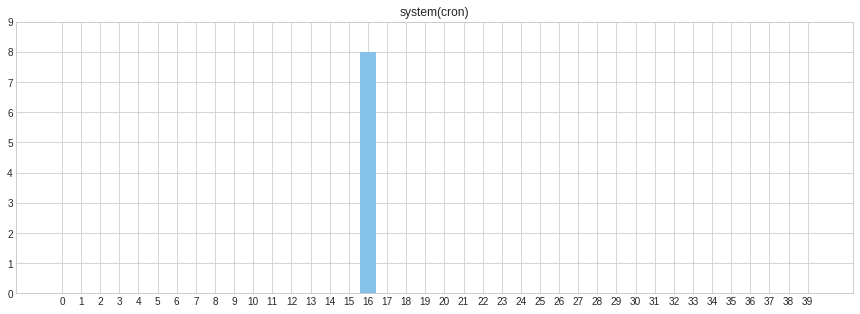

1.2489995996796797


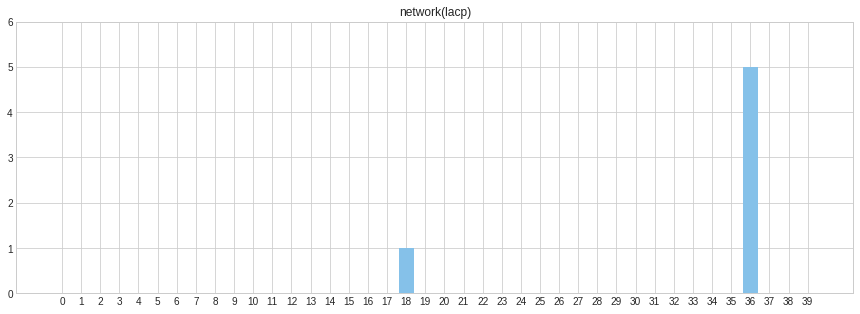

0.7921489758877429


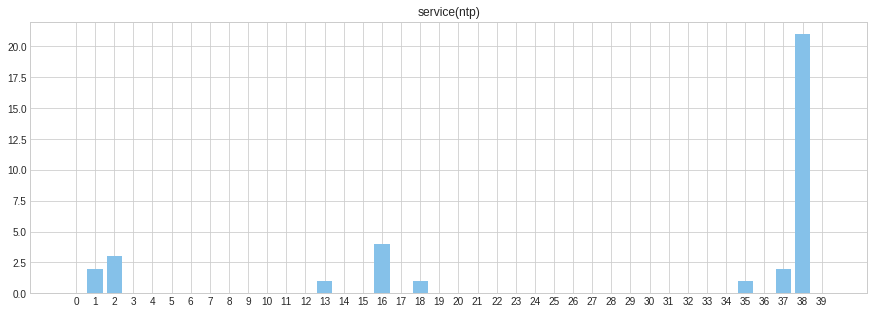

3.340565071960132


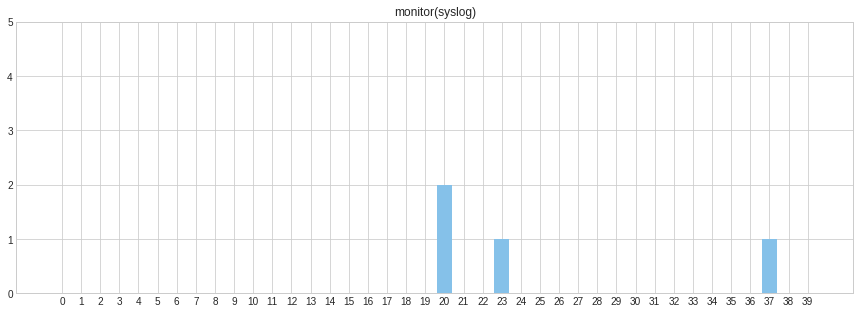

0.37416573867739417


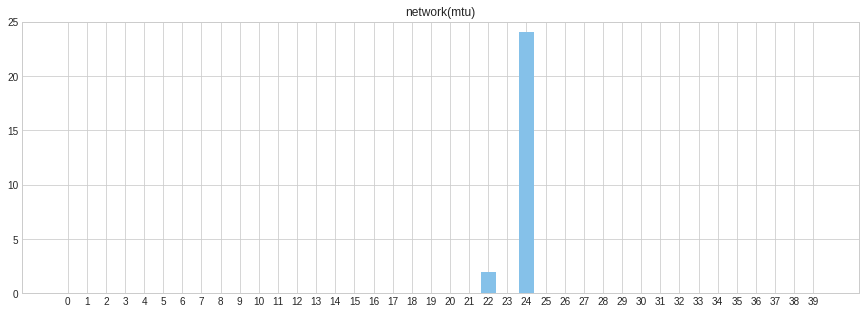

3.751999466950922


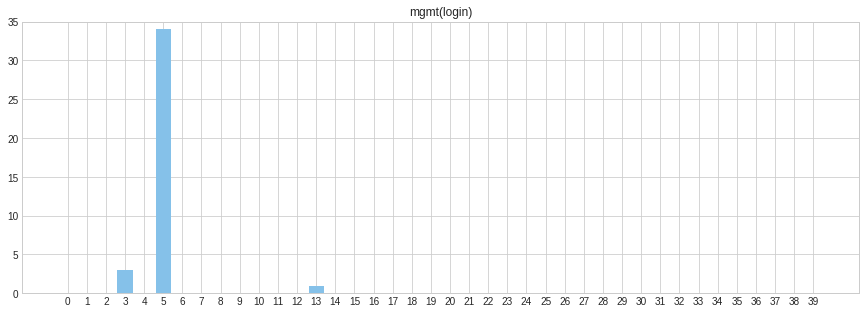

5.314837720946896


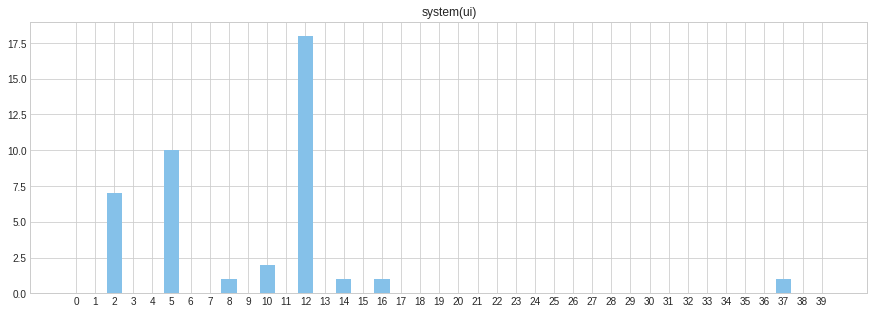

3.312759423803667


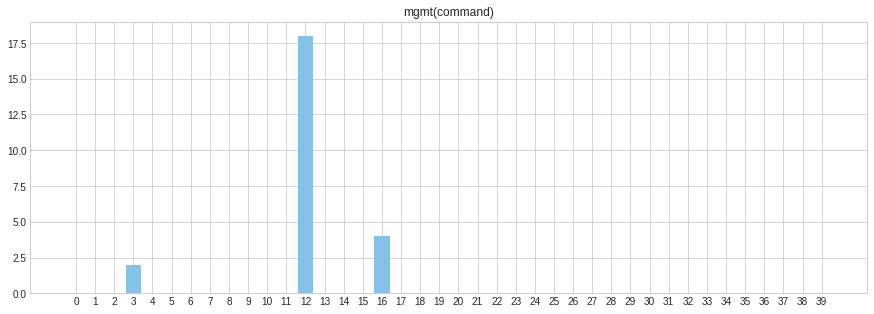

2.870540018881465


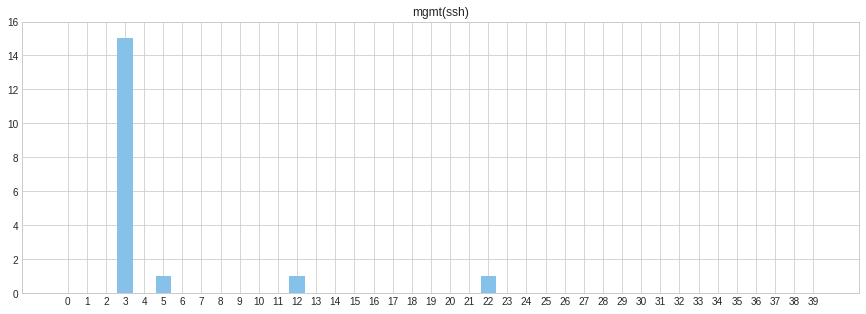

2.344674817538671


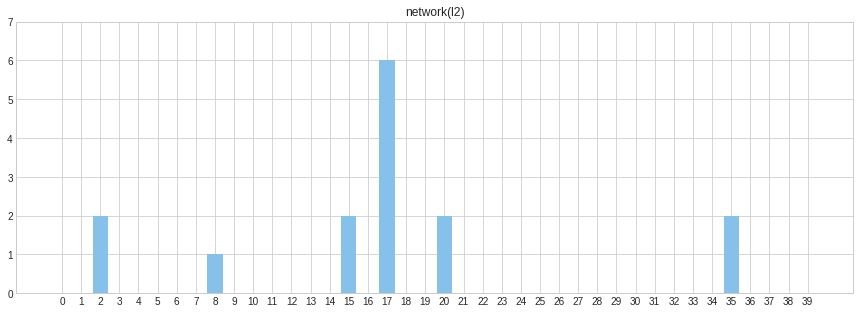

1.0882899429839459


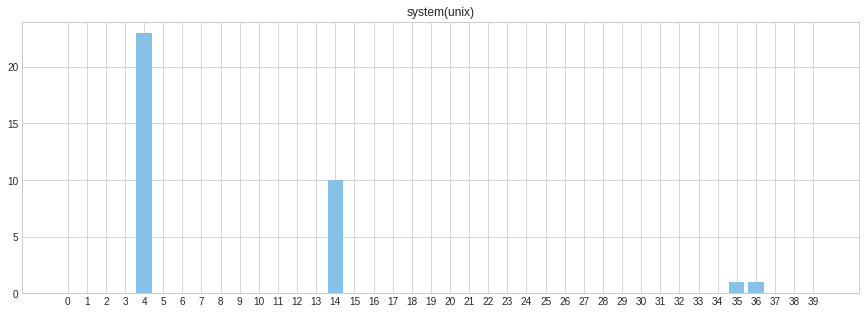

3.8741934644516656


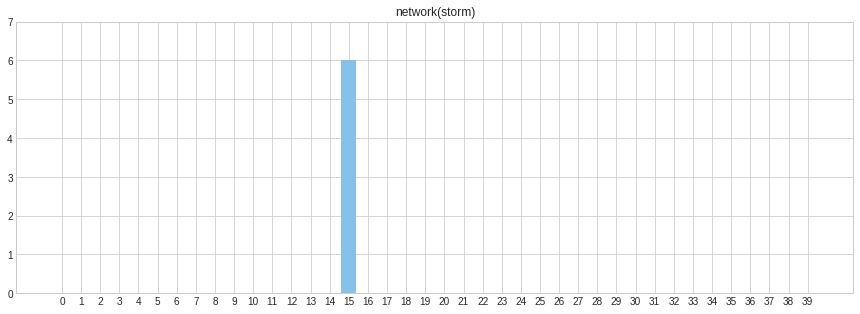

0.9367496997597597


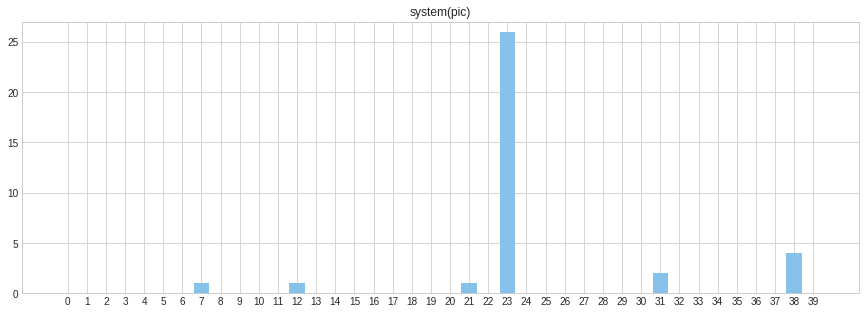

4.087710239241525


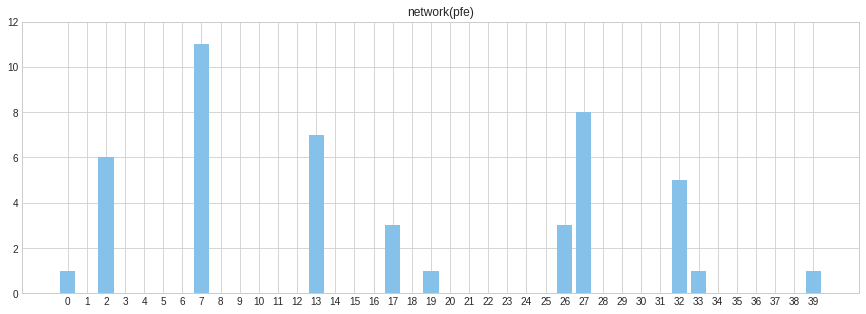

2.5581976076917905


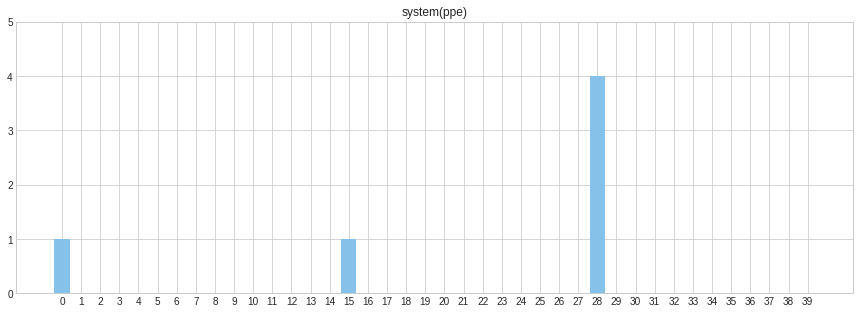

0.653834841531101


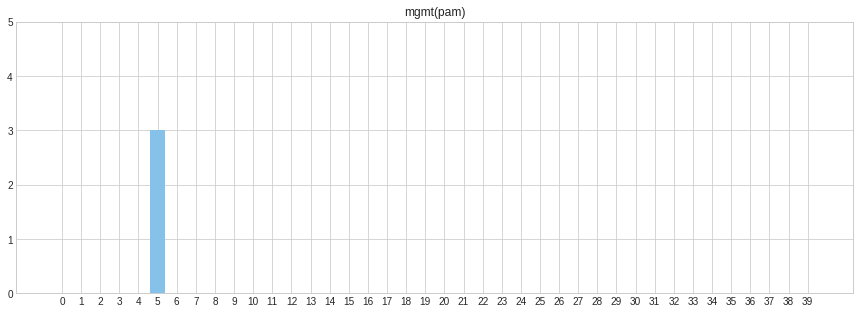

0.4683748498798799


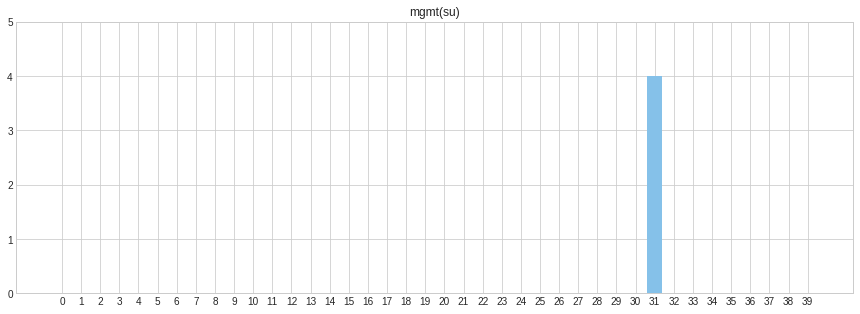

0.6244997998398398


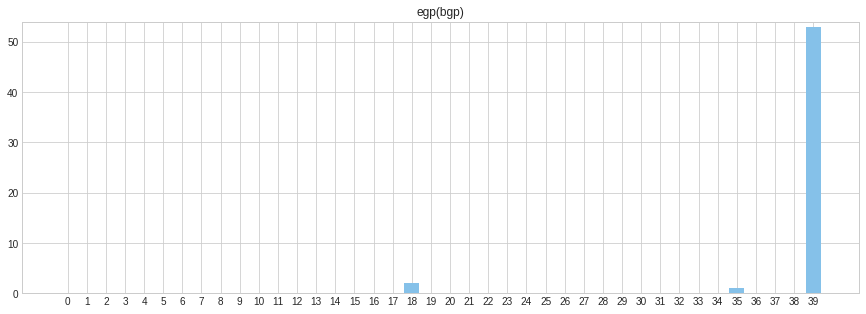

8.26982466561414


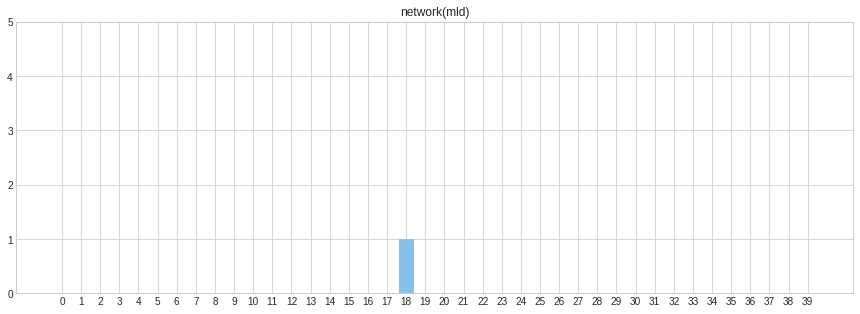

0.15612494995995996


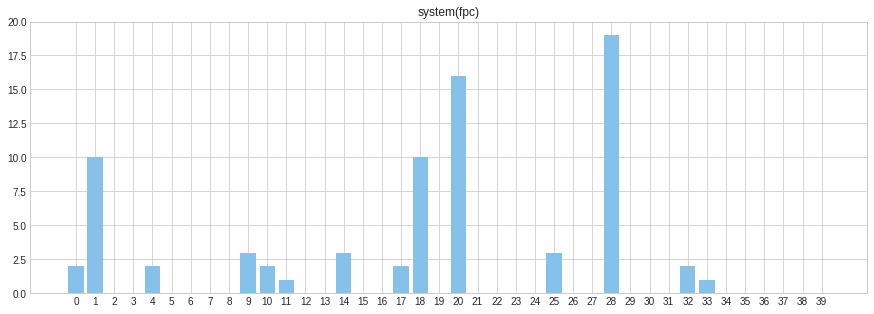

4.24735211631906


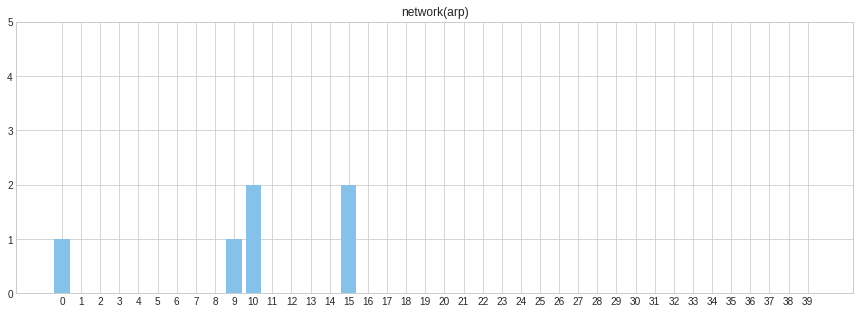

0.47696960070847283


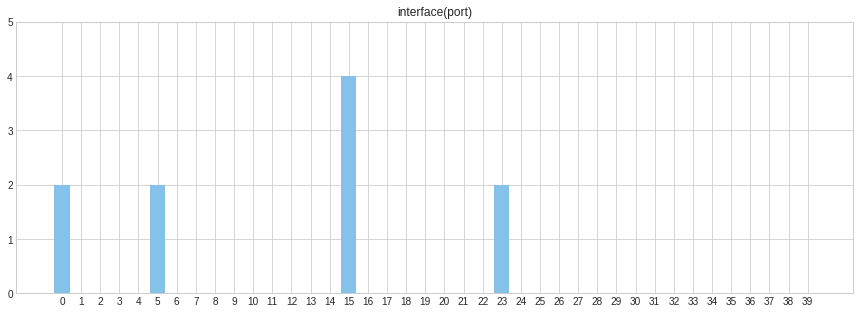

0.7984359711335656


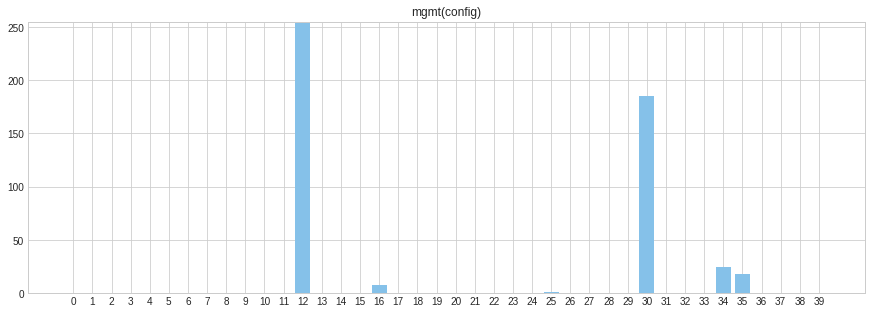

48.40660466300028


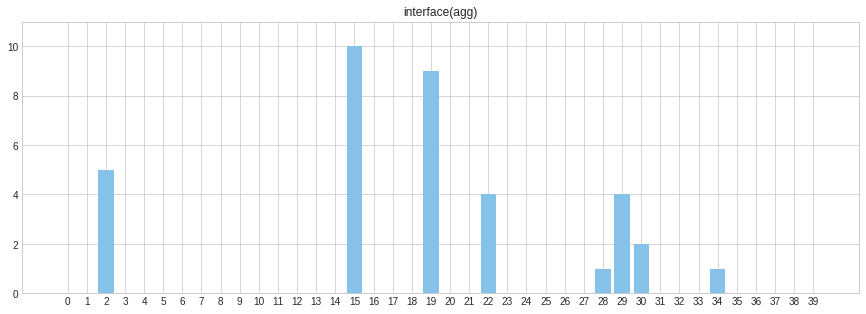

2.3000000000000003


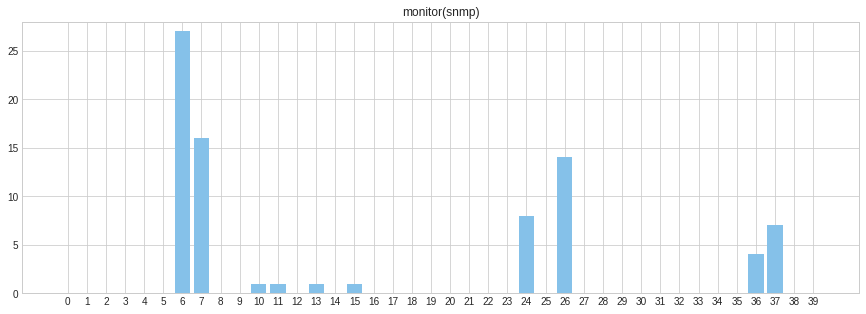

5.371219600798314


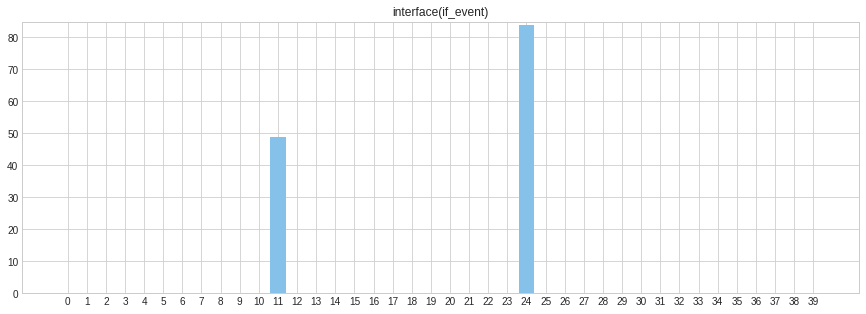

15.012307450888418


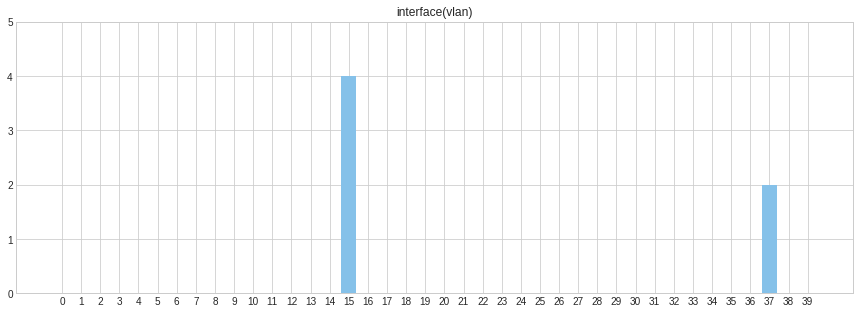

0.6910137480542627


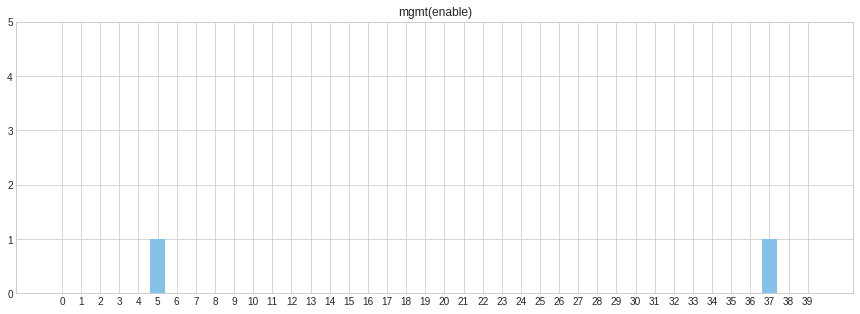

0.21794494717703367


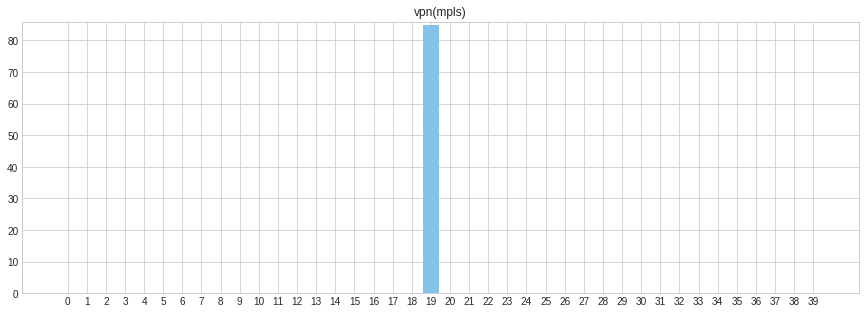

13.270620746596597


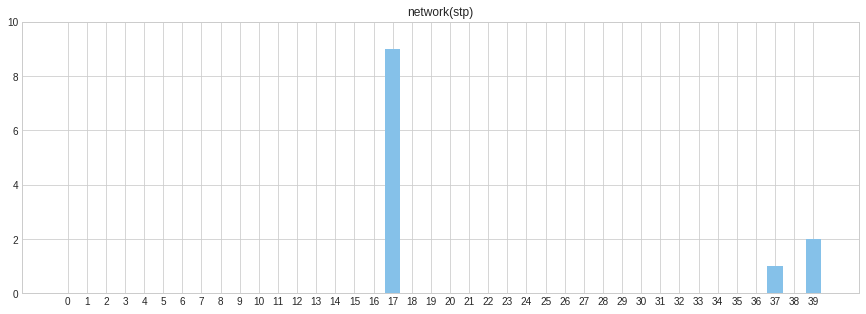

1.4352700094407325


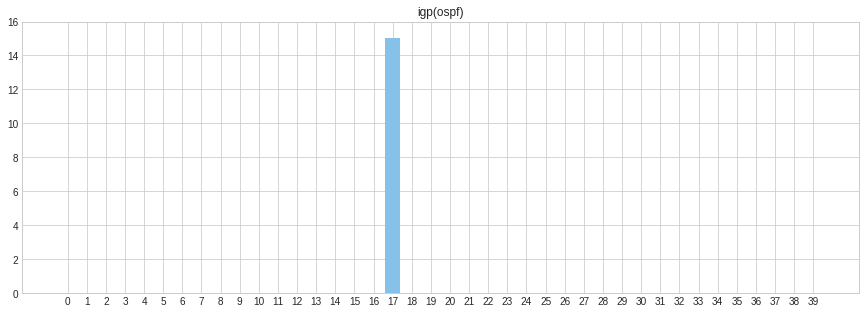

2.341874249399399


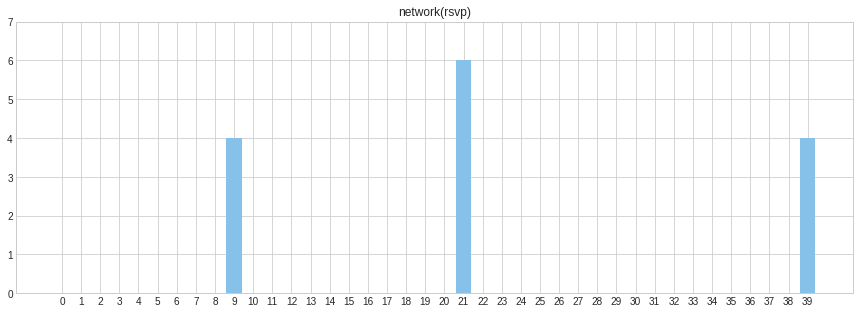

1.255985668708047


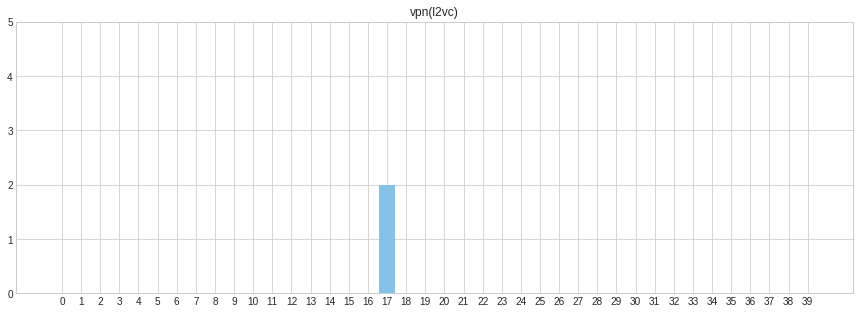

0.3122498999199199


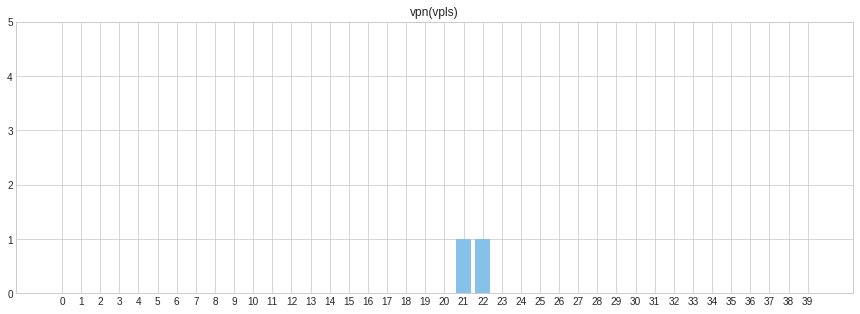

0.21794494717703367


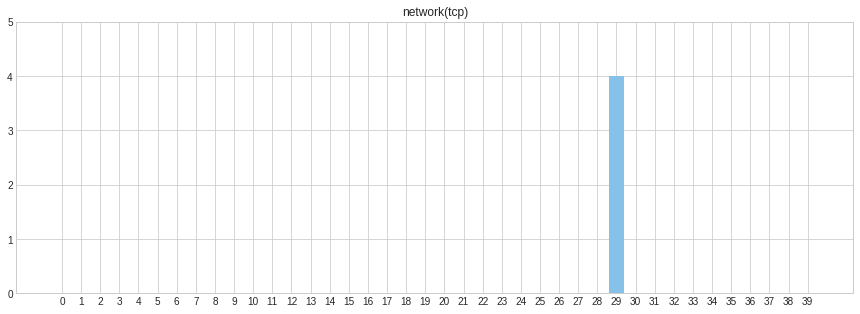

0.6244997998398398


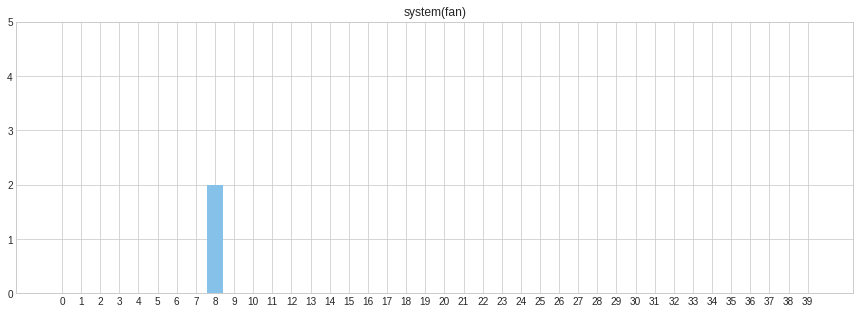

0.3122498999199199


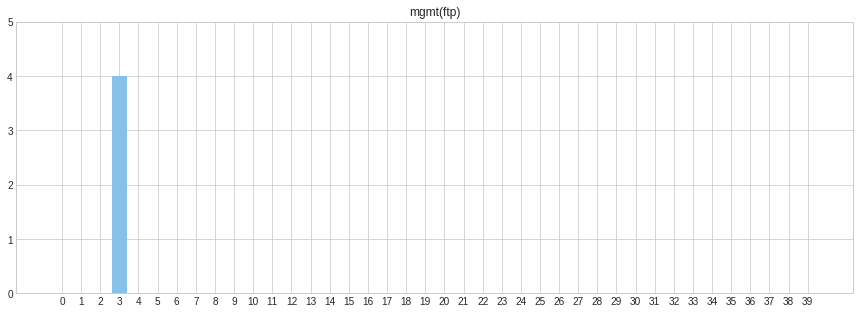

0.6244997998398398


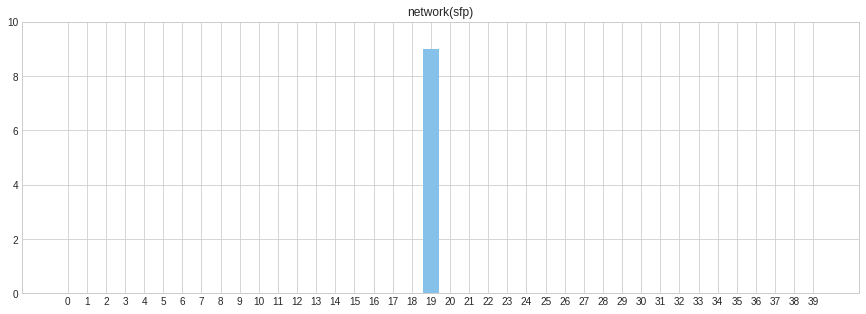

1.4051245496396394


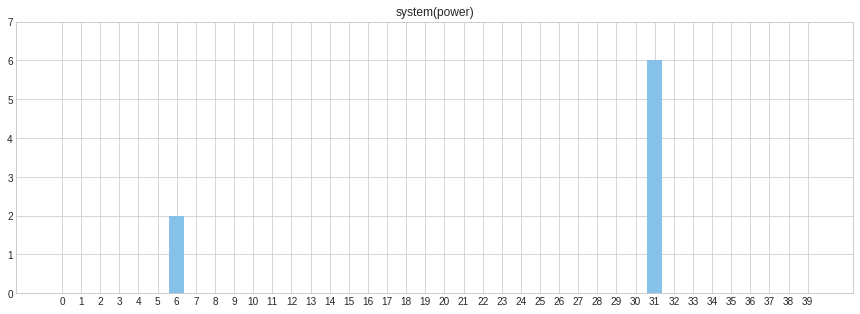

0.9797958971132711


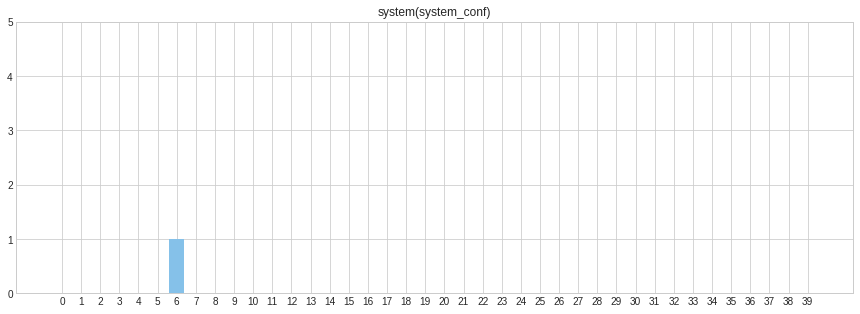

0.15612494995995996


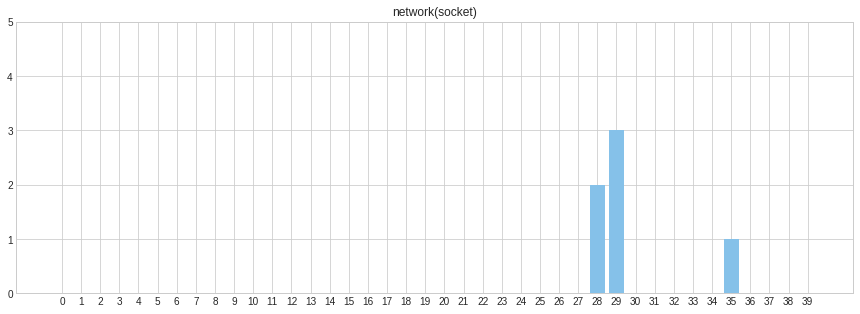

0.5722761571129799


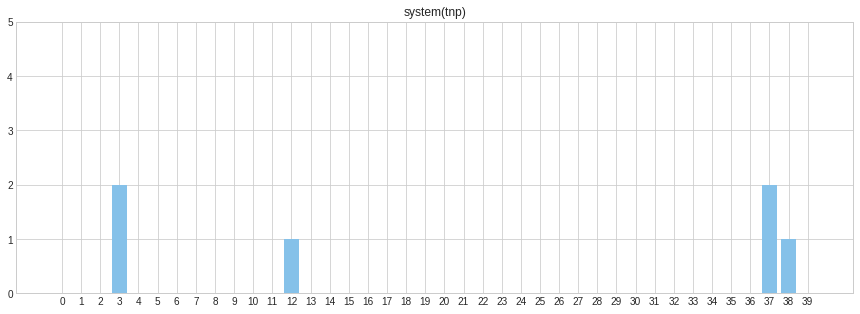

0.47696960070847283


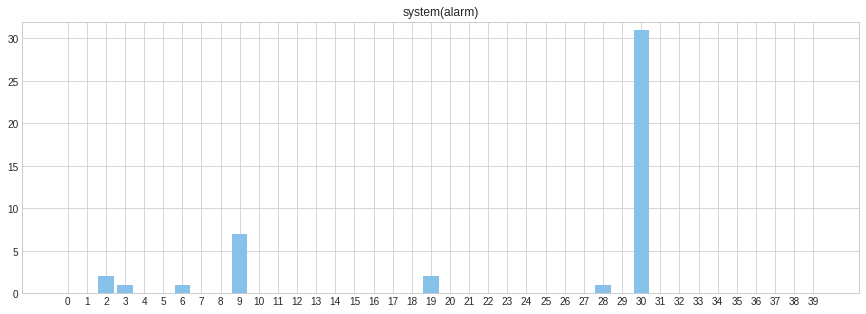

4.925380695946253


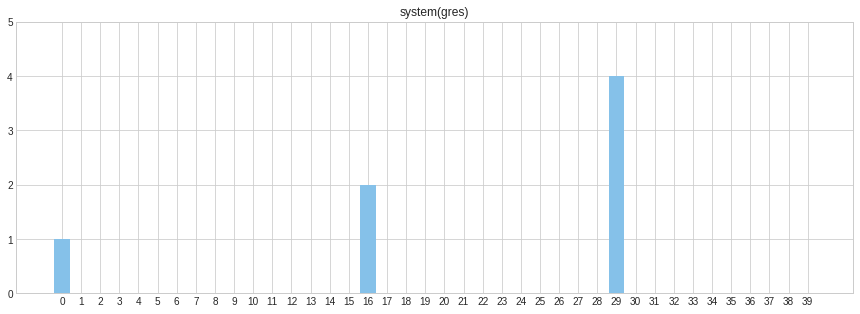

0.7031180555212617


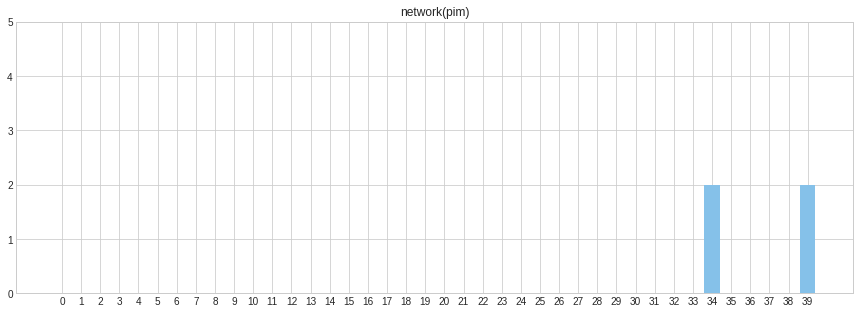

0.43588989435406733


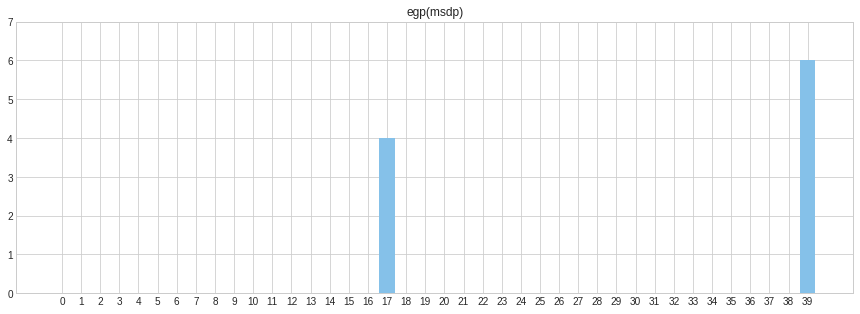

1.1124297730643495


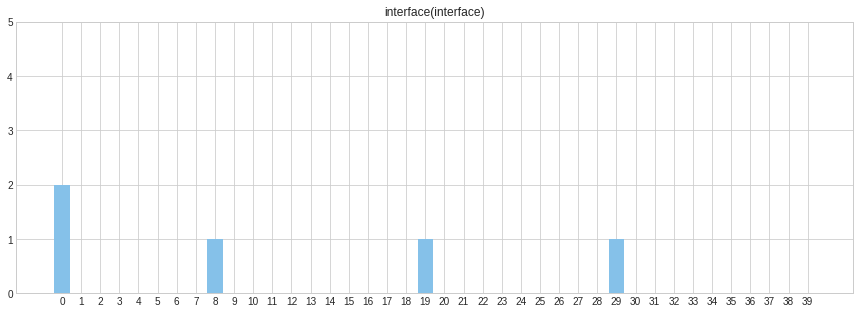

0.3992179855667828


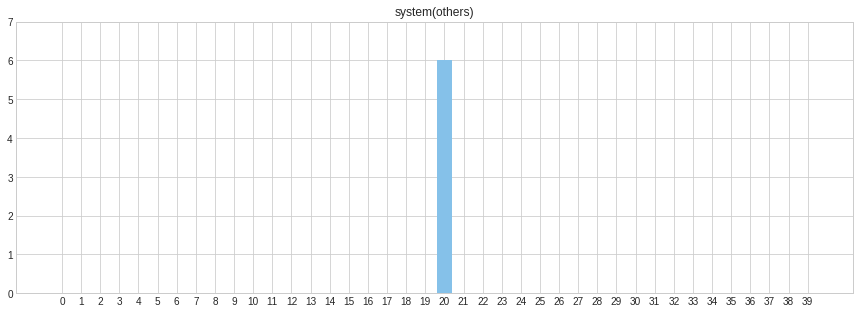

0.9367496997597597


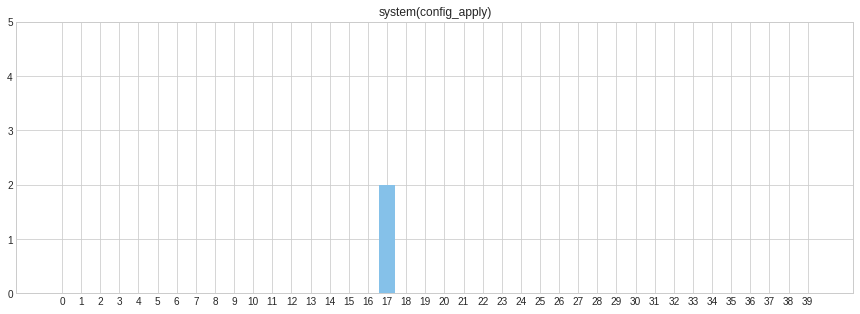

0.3122498999199199


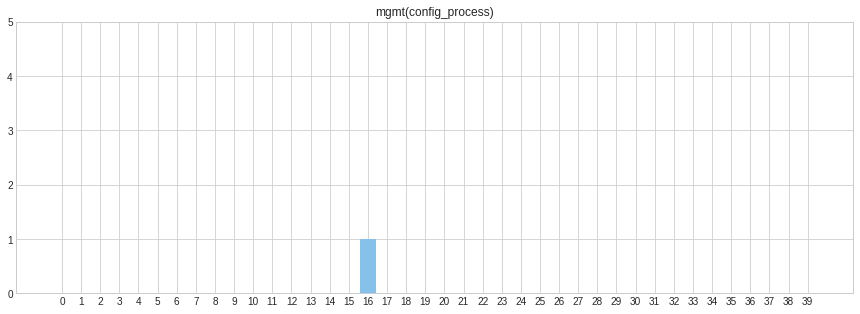

0.15612494995995996


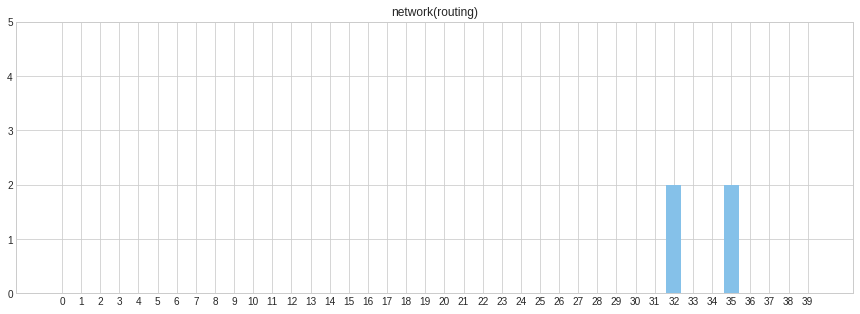

0.43588989435406733


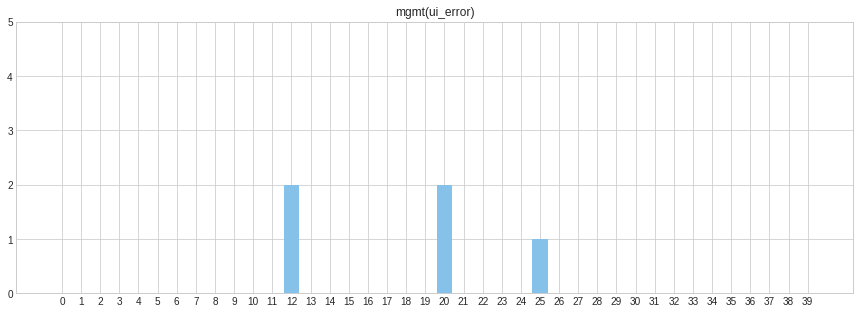

0.4575751304430782


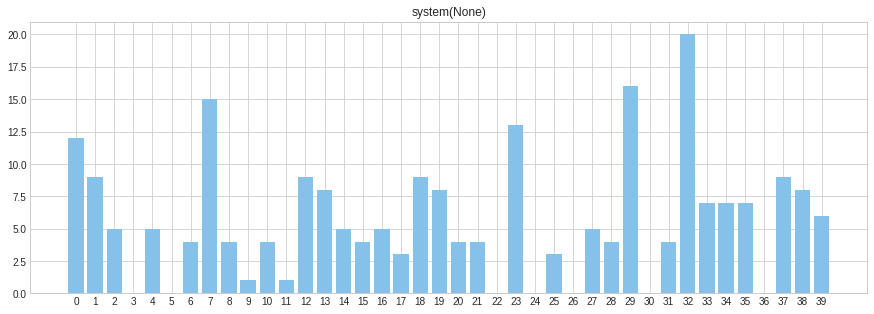

4.654030511288039


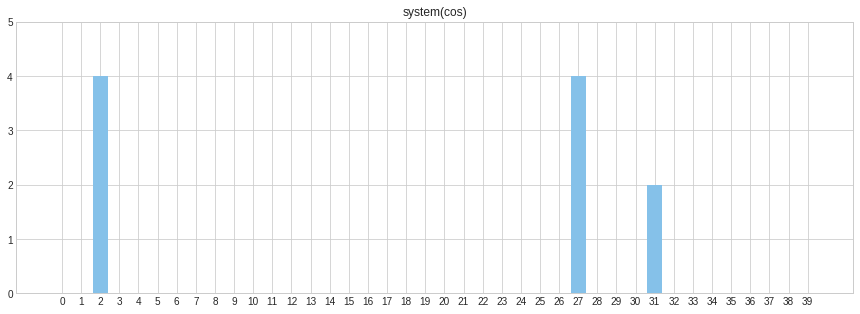

0.9151502608861564


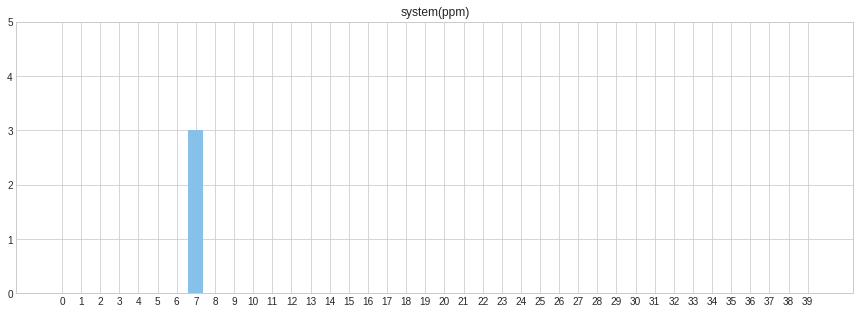

0.4683748498798799


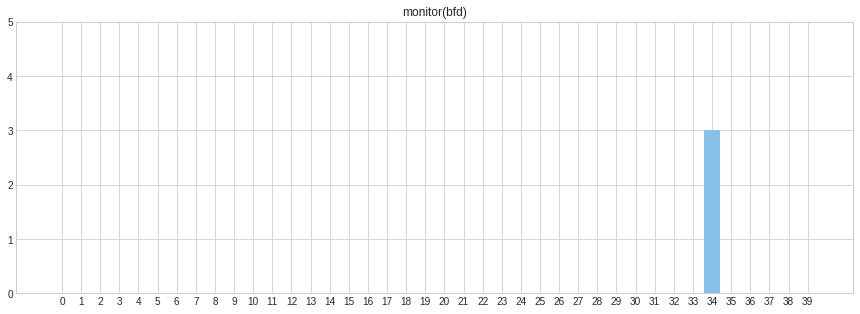

0.4683748498798799


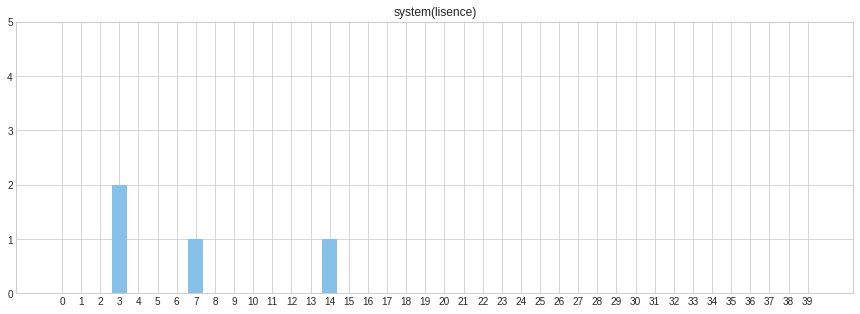

0.3741657386773941


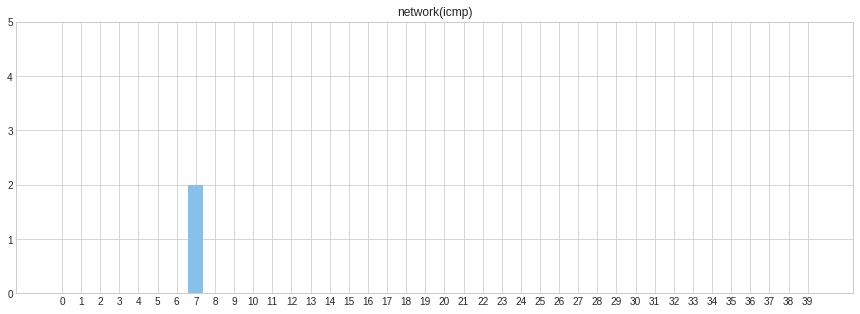

0.3122498999199199


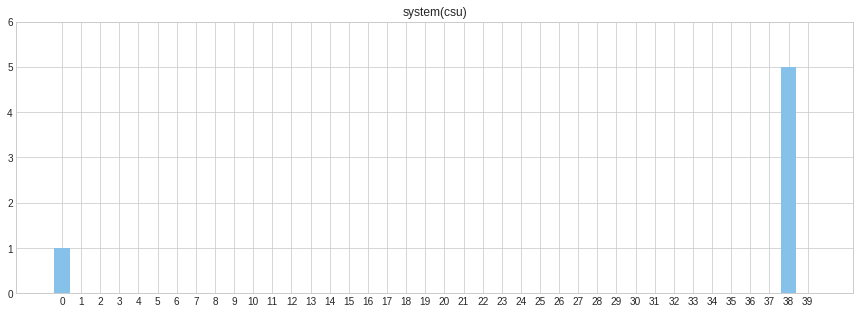

0.7921489758877429


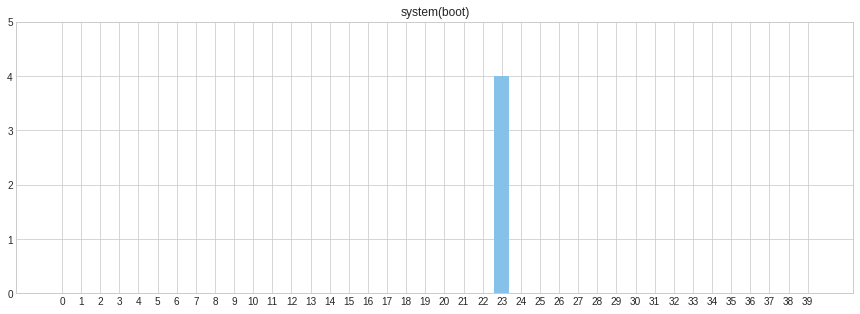

0.6244997998398398


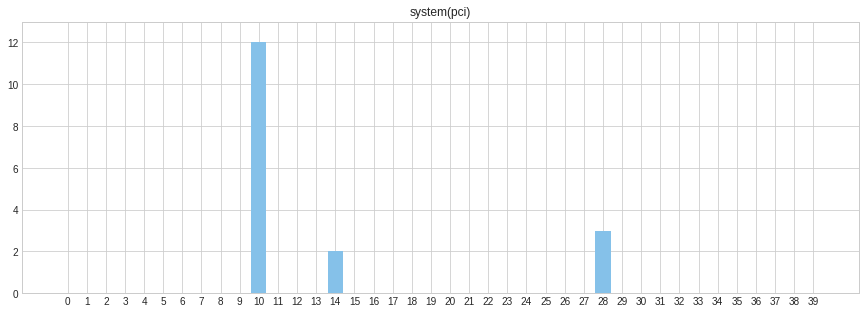

1.9350387593017353


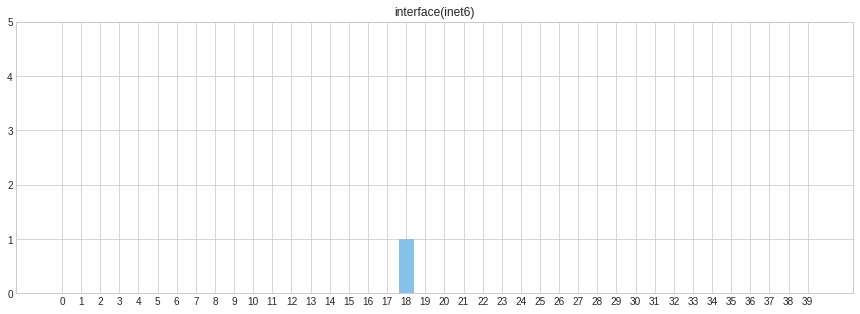

0.15612494995995996


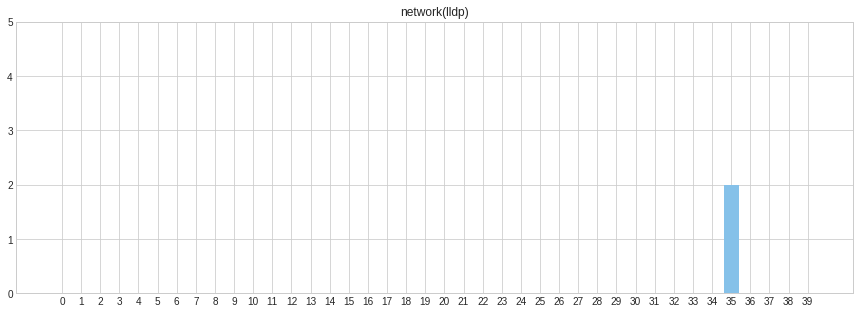

0.3122498999199199


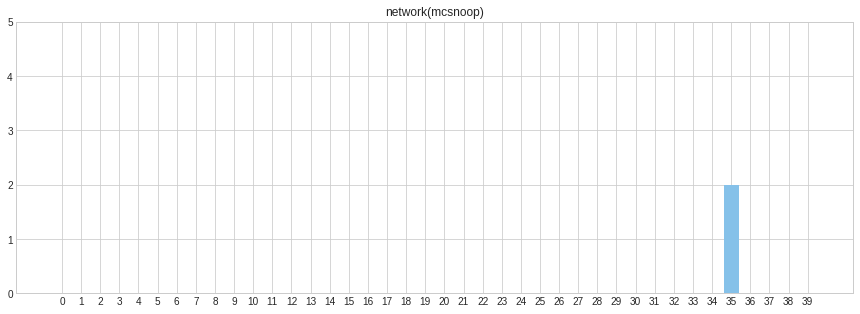

0.3122498999199199


In [334]:
plt.style.use('seaborn-colorblind')
plt.style.use('seaborn-whitegrid')
cvs = []

for cat, res in inf_per_cat.items():
    plt.figure(figsize=(15, 5))
    plt.title(cat)
    y = collections.Counter(res)
    y = [y[i] if i in y else 0 for i in range(40)]
    plt.bar(np.arange(40), y, color="#85C1E9")
    plt.xticks(np.arange(40))
    minY = 5 if max(y) < 5 else max(y)+1
    plt.ylim(0, minY)
    plt.show()

    print(np.array(y).std())
    cvs.append((cat, np.array(y).std()/np.array(y).mean()))

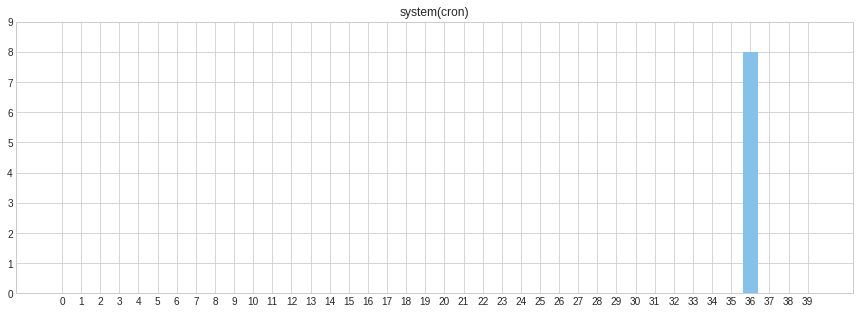

1.2489995996796797


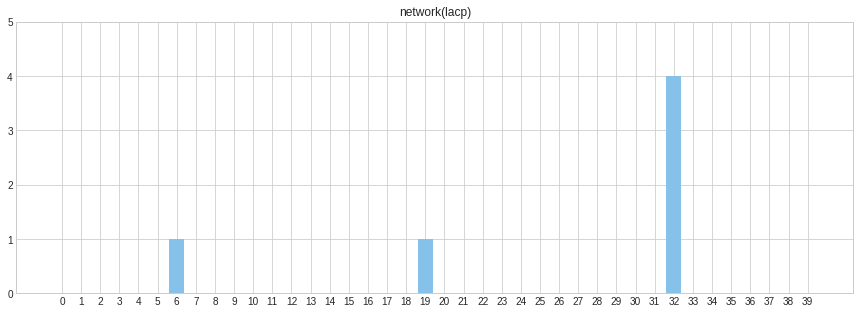

0.653834841531101


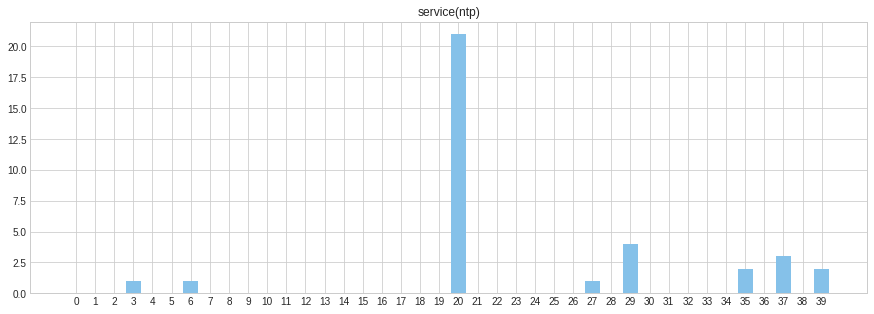

3.340565071960132


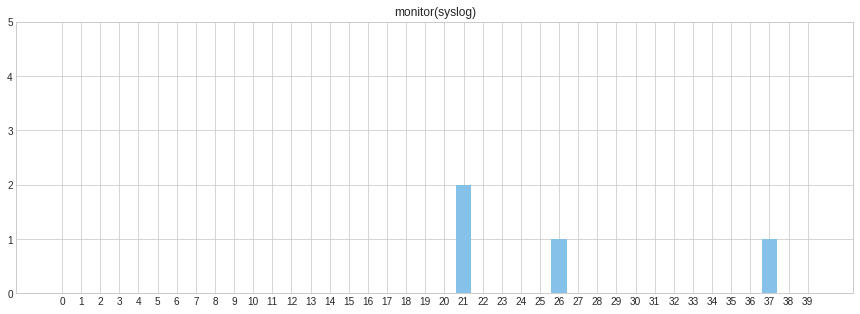

0.37416573867739406


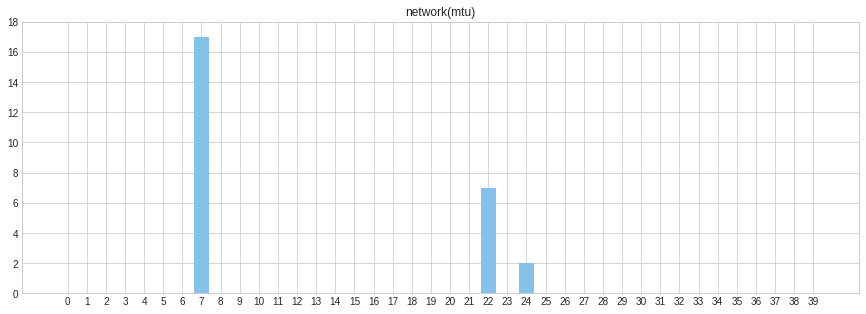

2.850877058029687


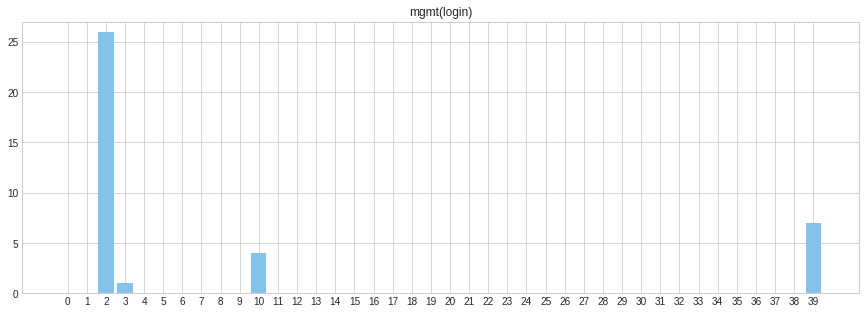

4.200892762258994


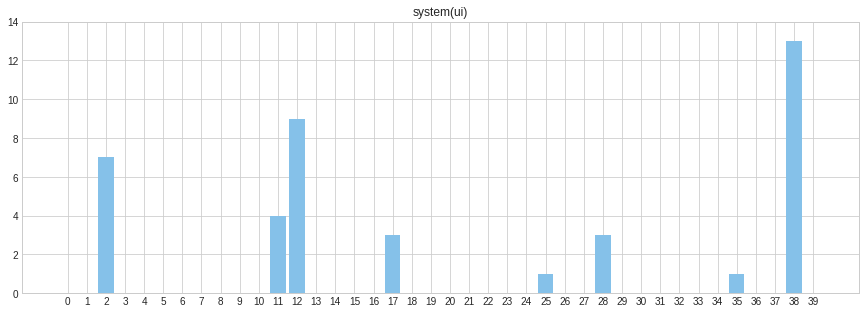

2.7063582541858717


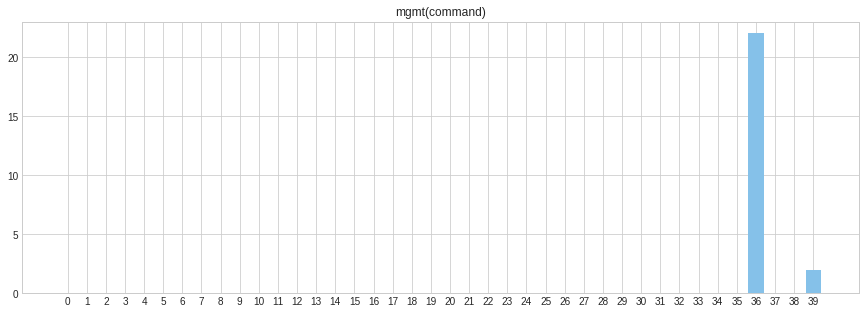

3.4409301068170506


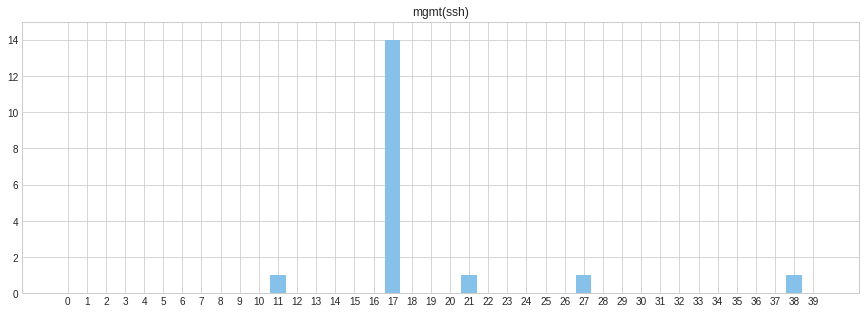

2.190319611380951


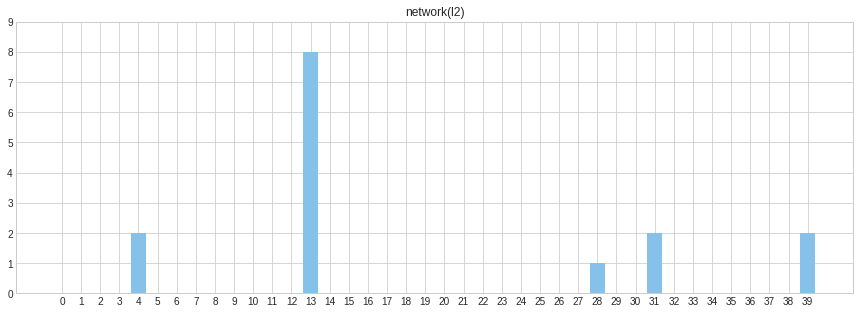

1.3358050007392546


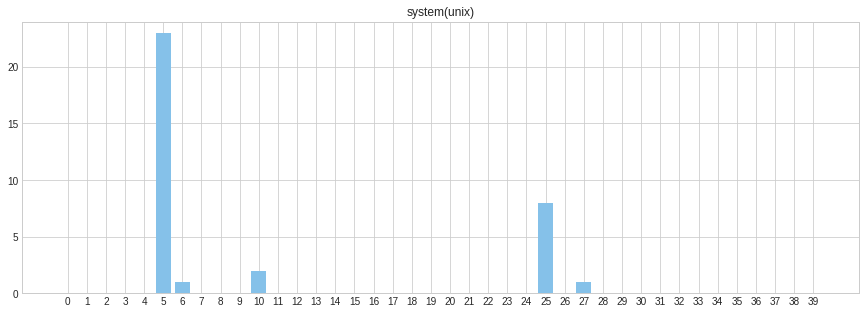

3.7695324643780426


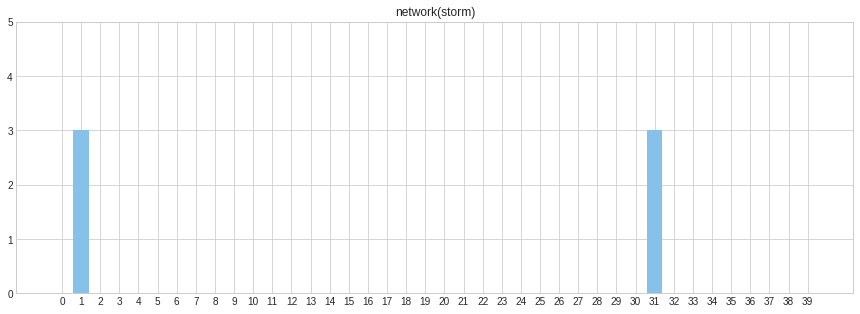

0.6538348415311012


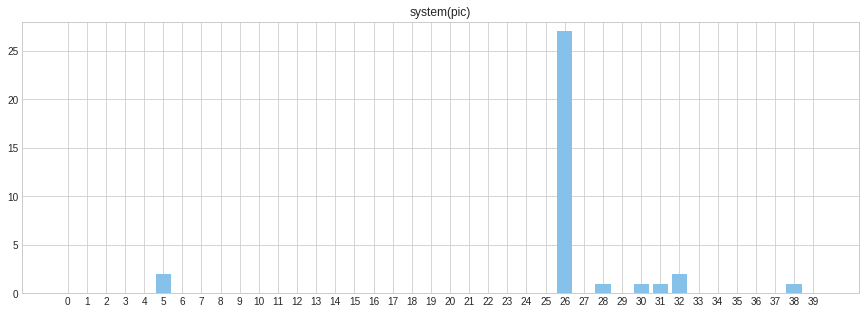

4.214187347520278


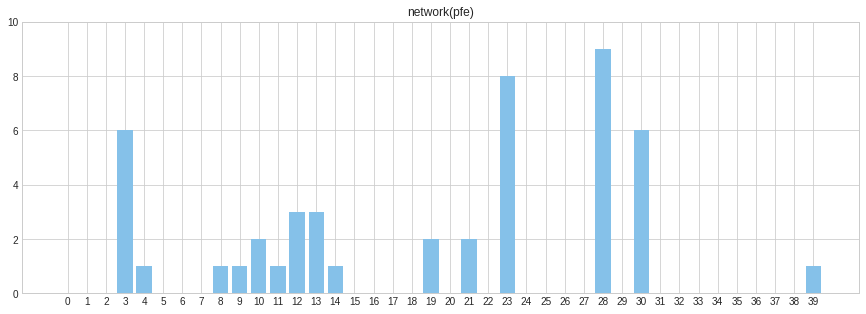

2.223595062056039


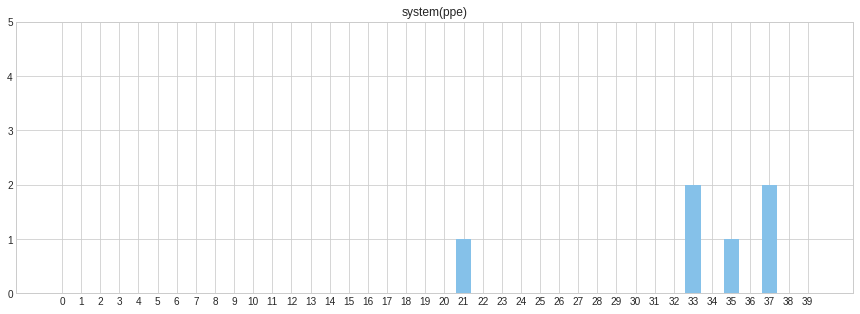

0.47696960070847283


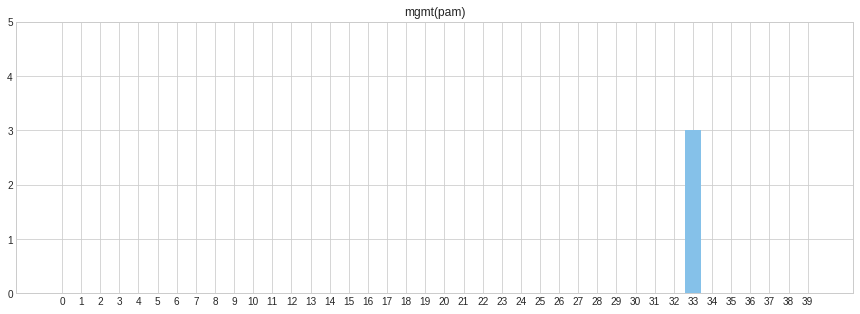

0.4683748498798799


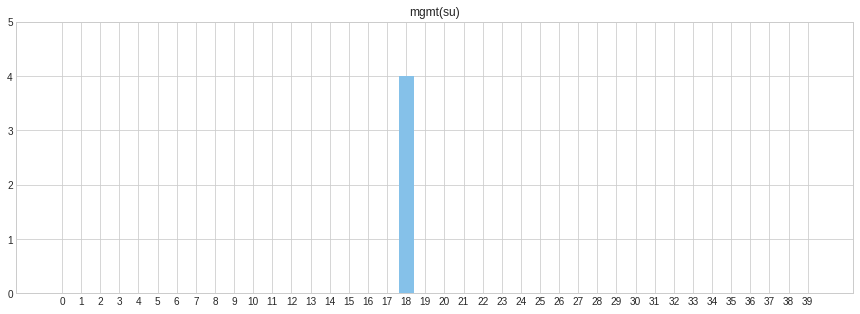

0.6244997998398398


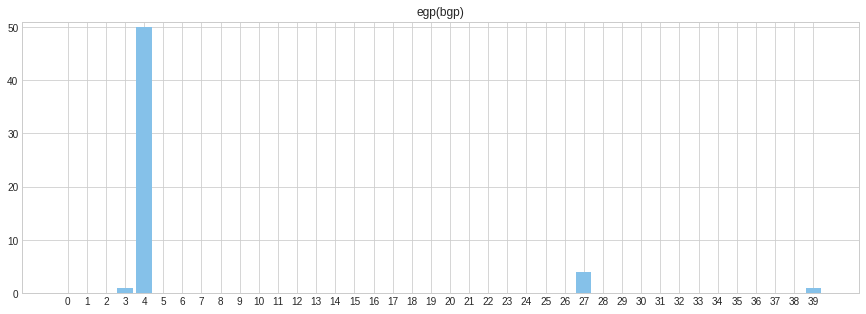

7.8096094652677746


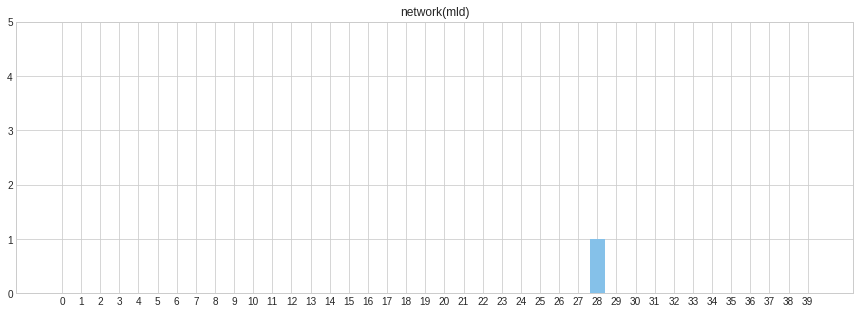

0.15612494995995996


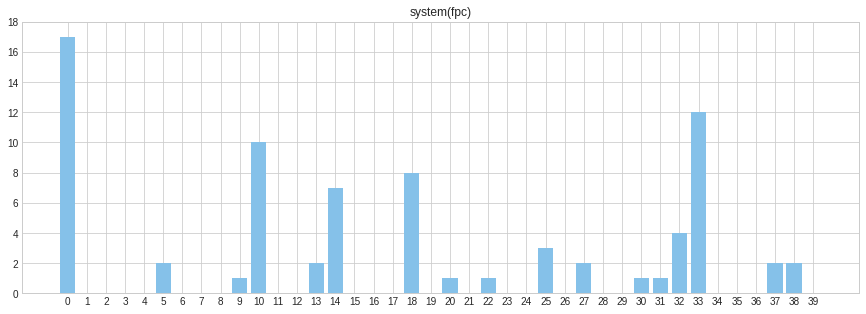

3.7134889255254286


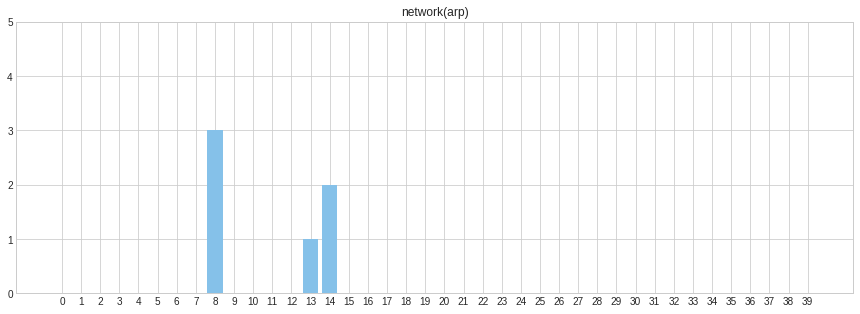

0.57227615711298


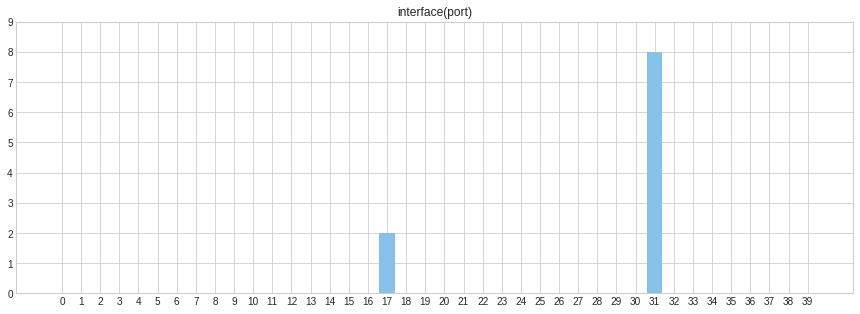

1.2796483892069728


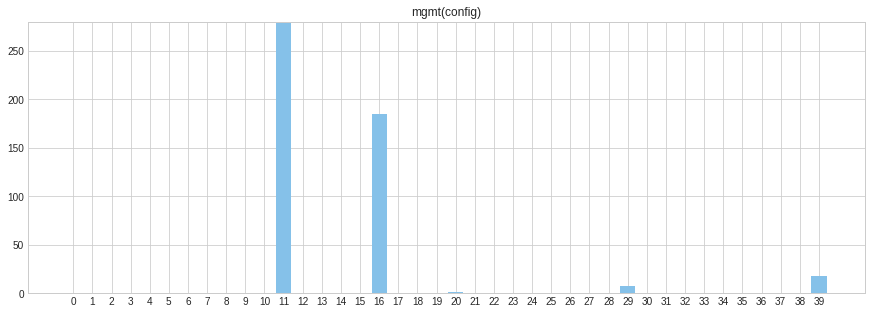

51.58196753711515


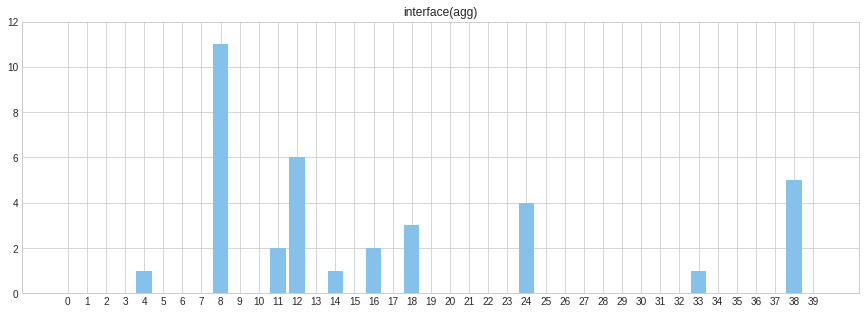

2.1540659228538015


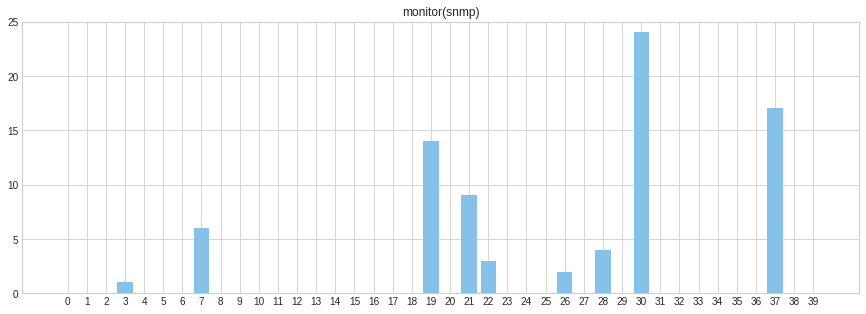

5.118593556827891


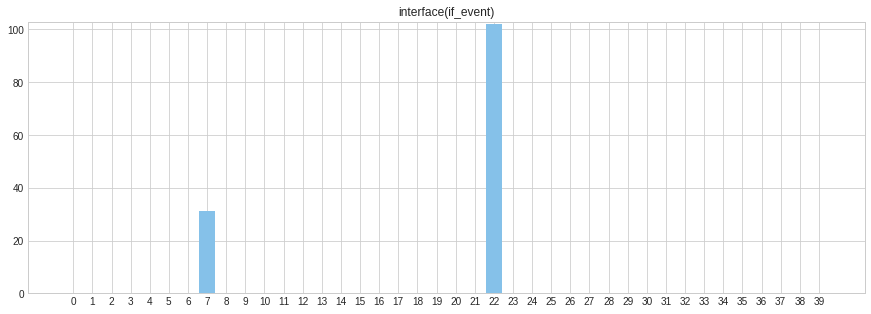

16.52481089150493


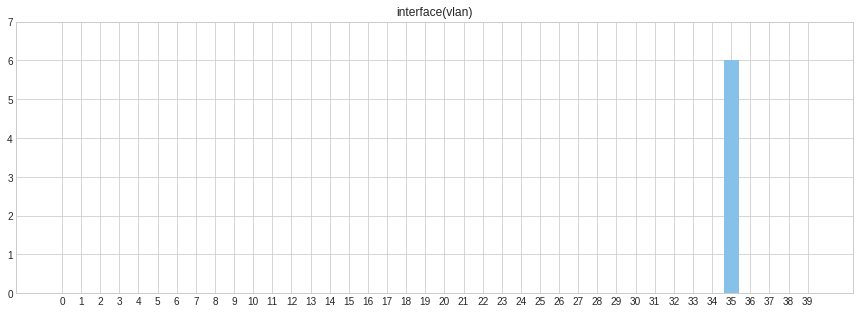

0.9367496997597597


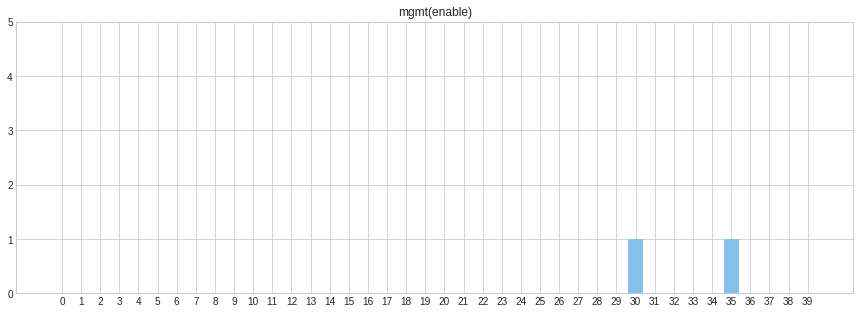

0.21794494717703367


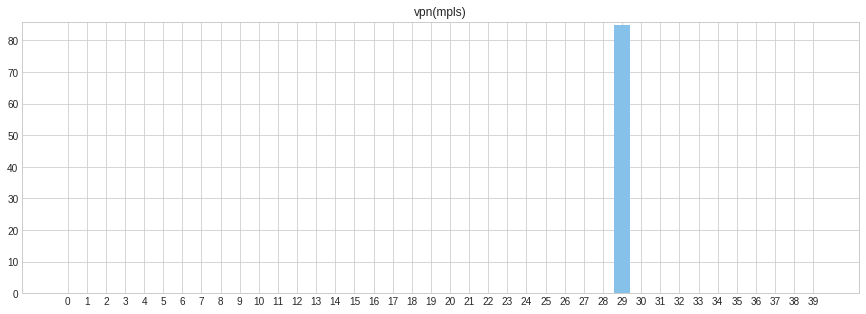

13.270620746596597


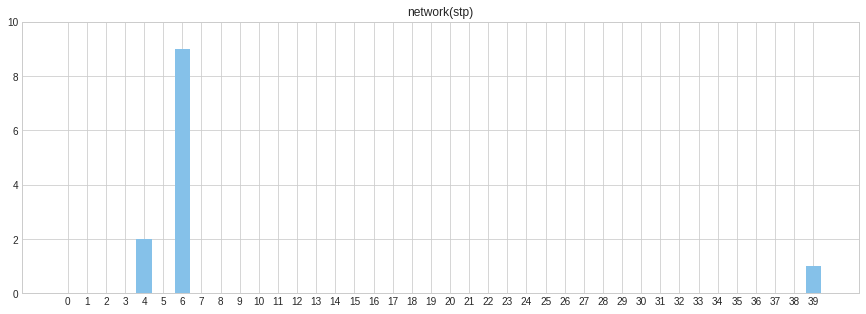

1.4352700094407322


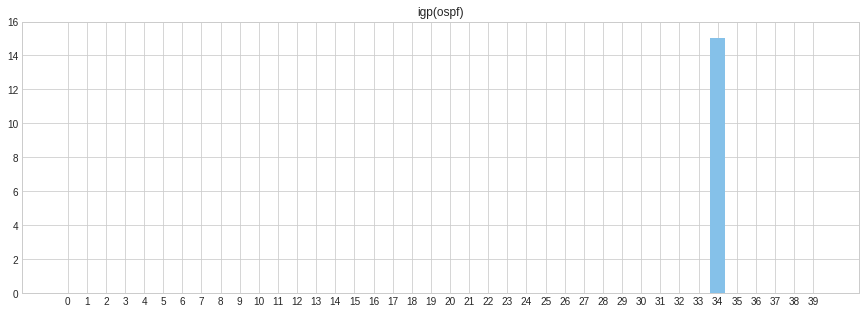

2.341874249399399


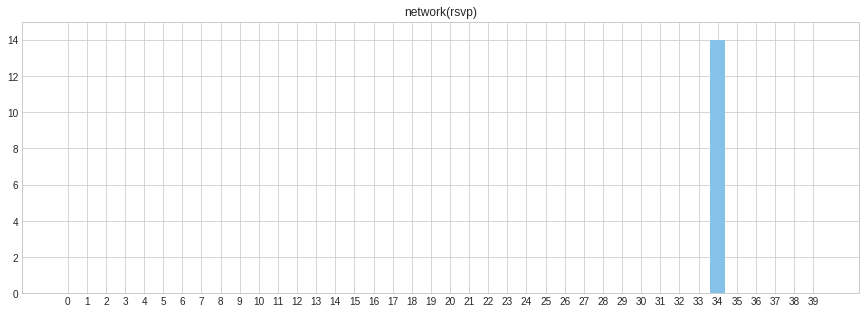

2.1857492994394394


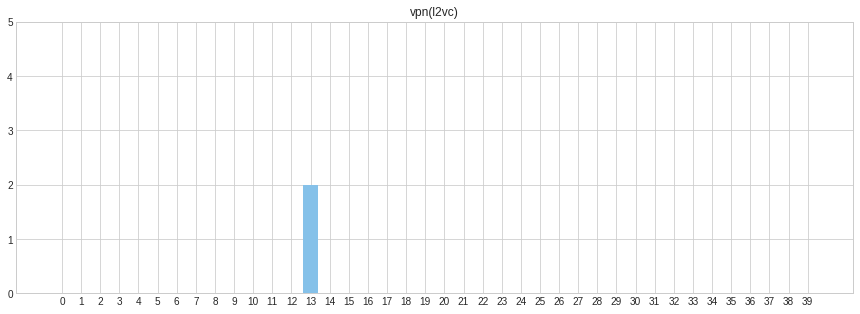

0.3122498999199199


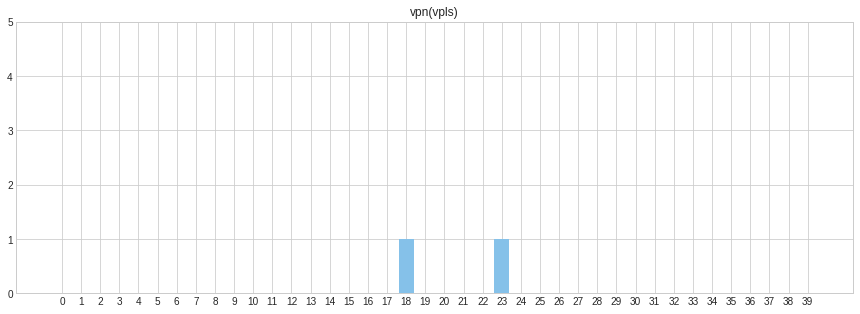

0.21794494717703367


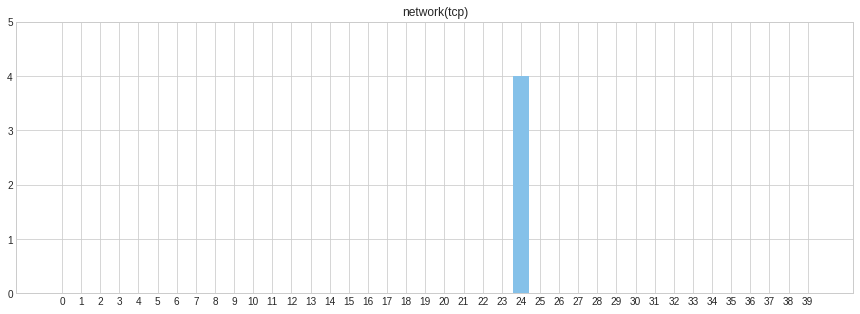

0.6244997998398398


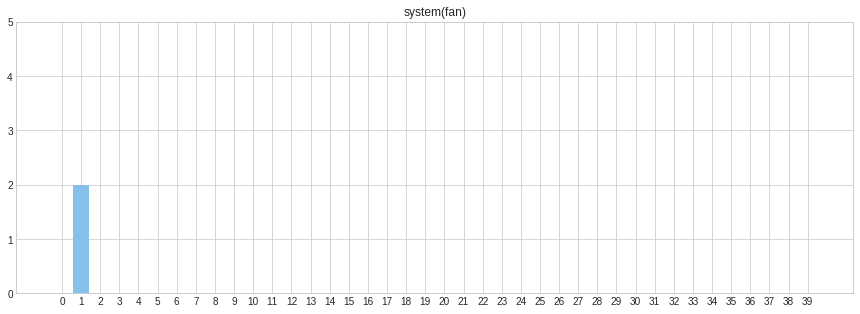

0.3122498999199199


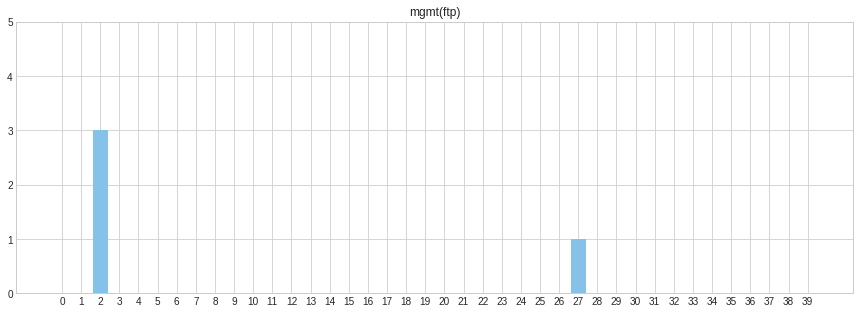

0.48989794855663554


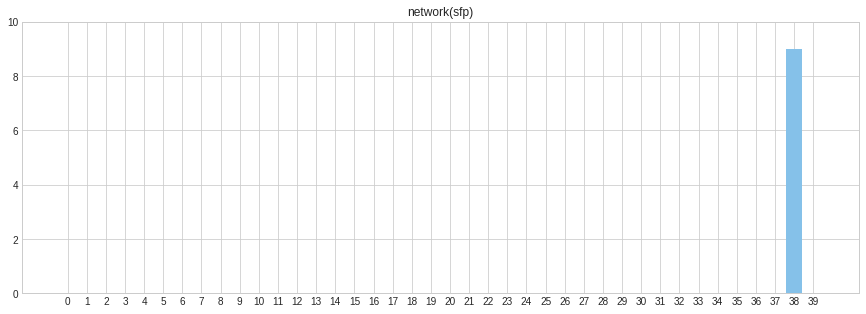

1.4051245496396396


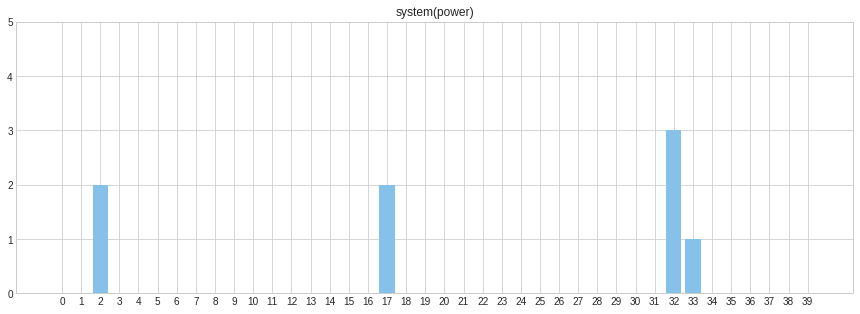

0.6403124237432849


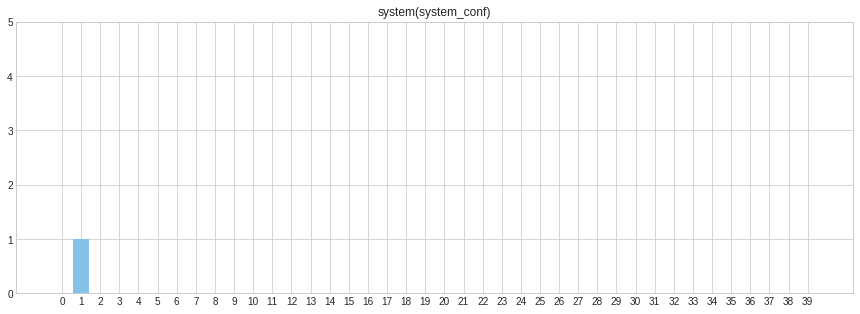

0.15612494995995996


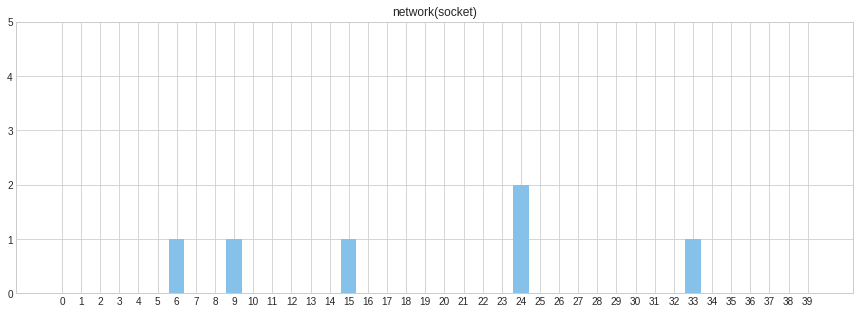

0.4213074886588179


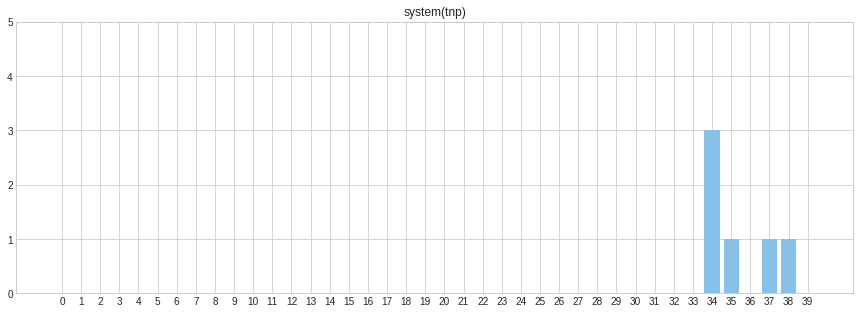

0.5267826876426369


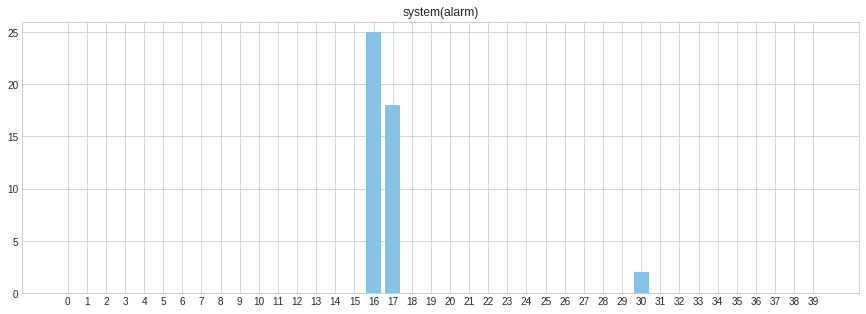

4.749671041240646


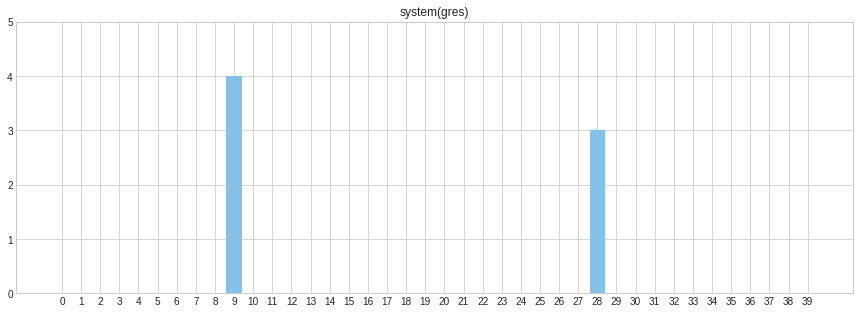

0.7709571972554637


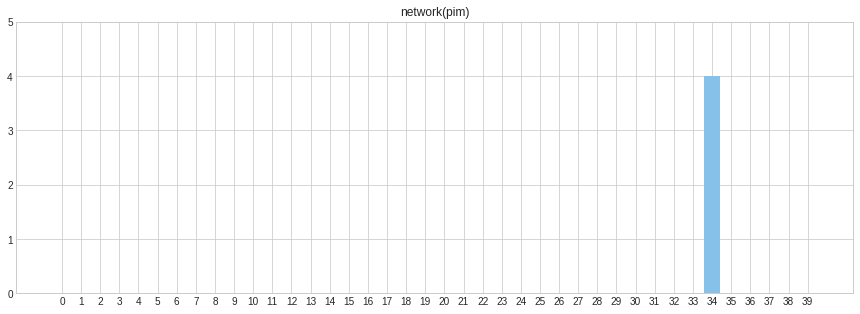

0.6244997998398398


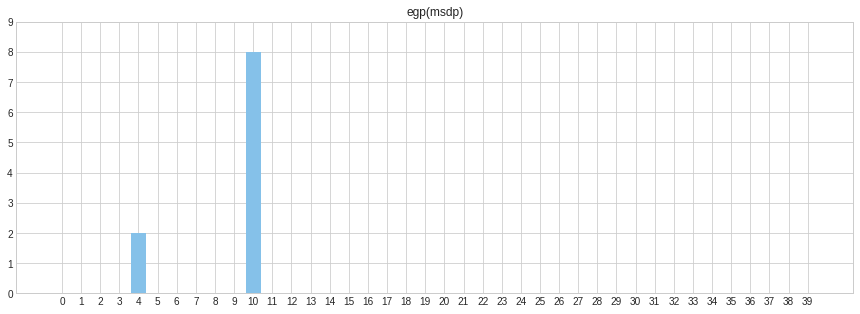

1.2796483892069728


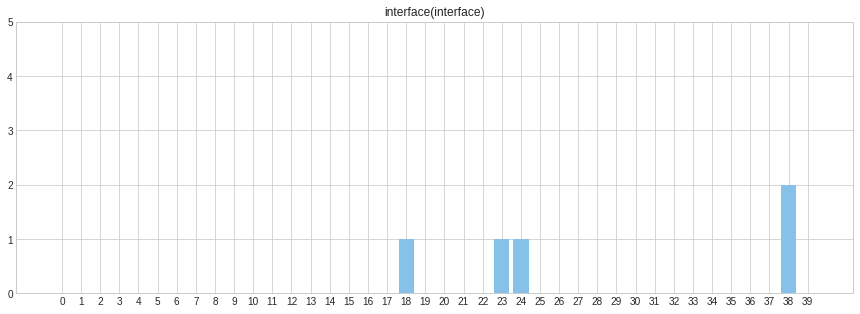

0.3992179855667828


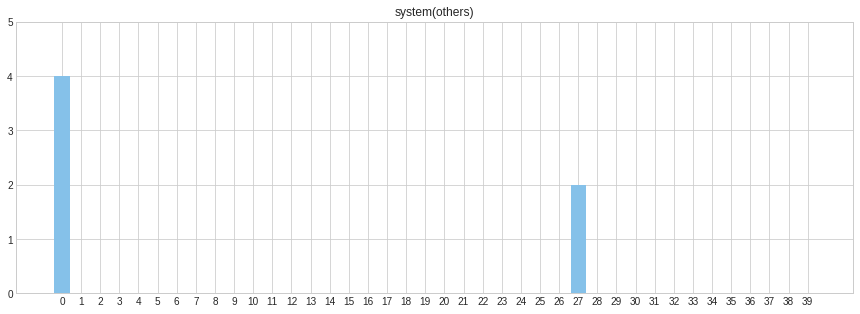

0.6910137480542627


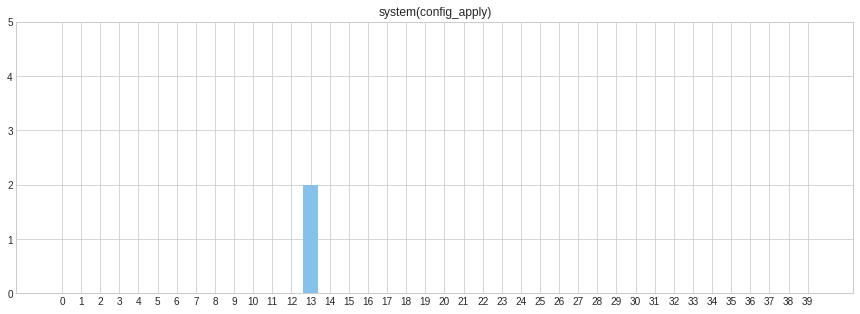

0.3122498999199199


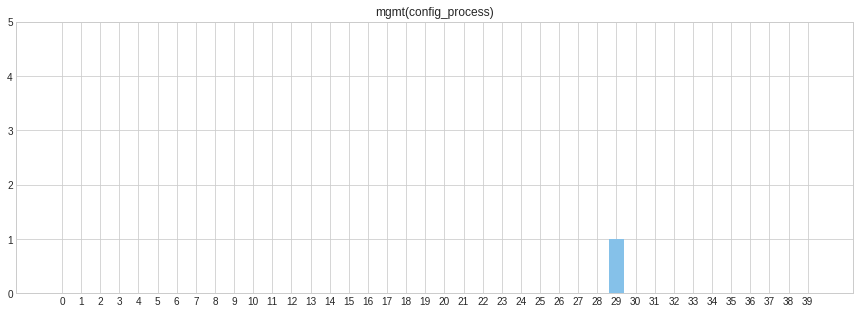

0.15612494995995996


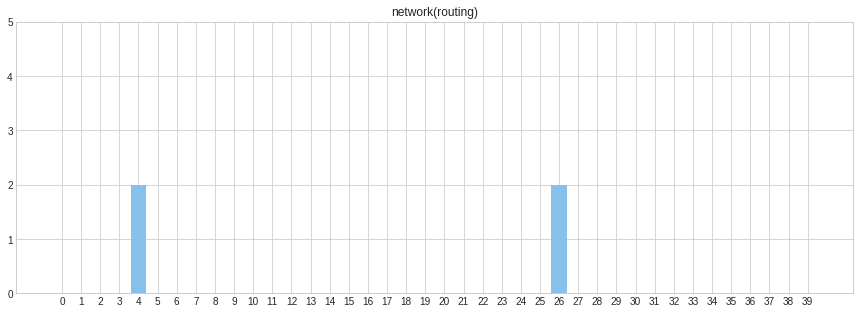

0.4358898943540673


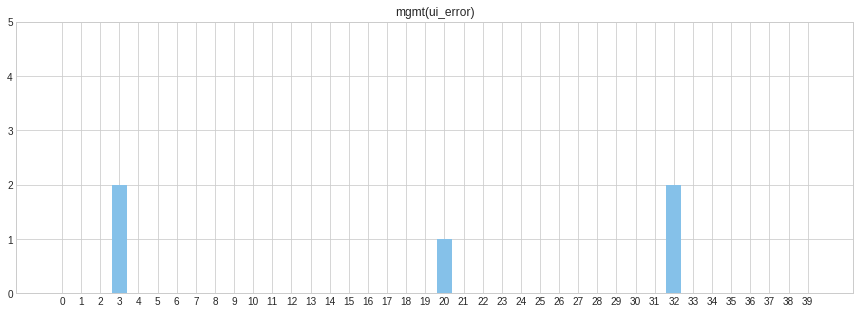

0.4575751304430782


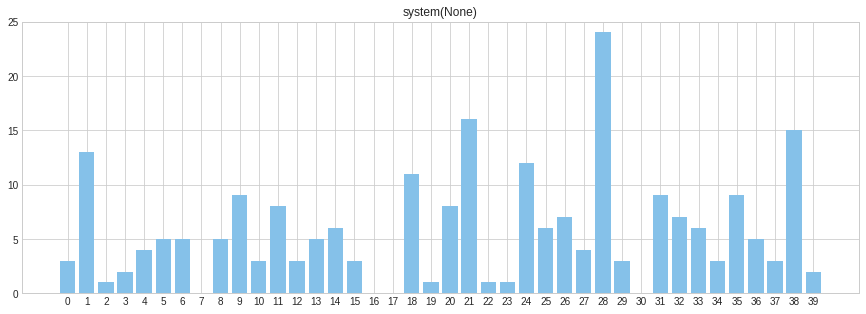

5.000999900019995


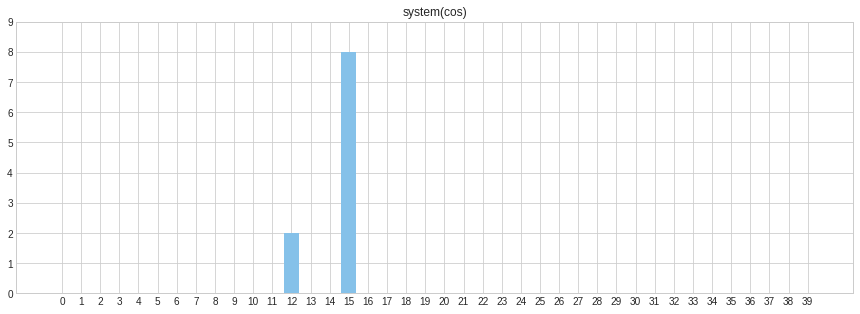

1.2796483892069728


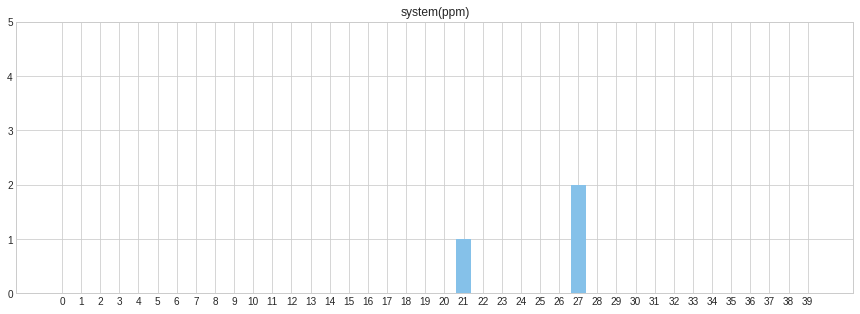

0.34550687402713137


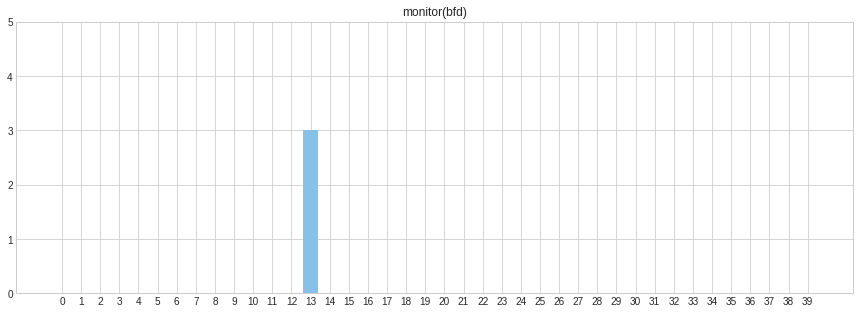

0.4683748498798799


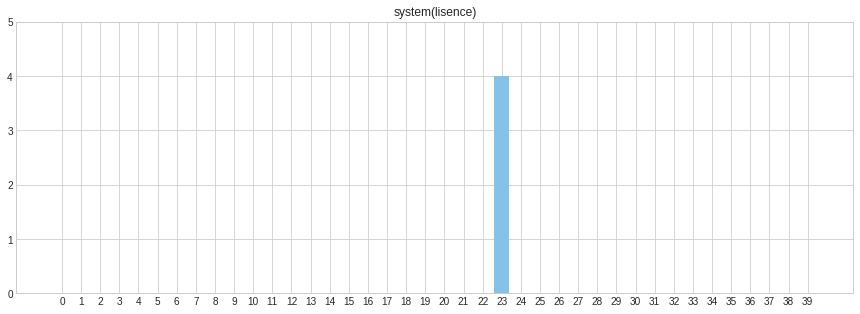

0.6244997998398398


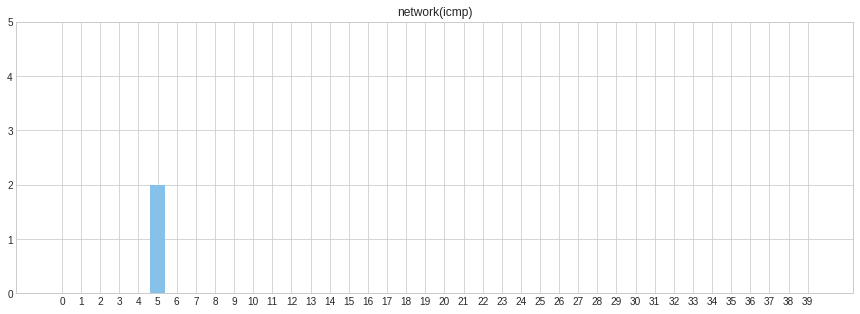

0.3122498999199199


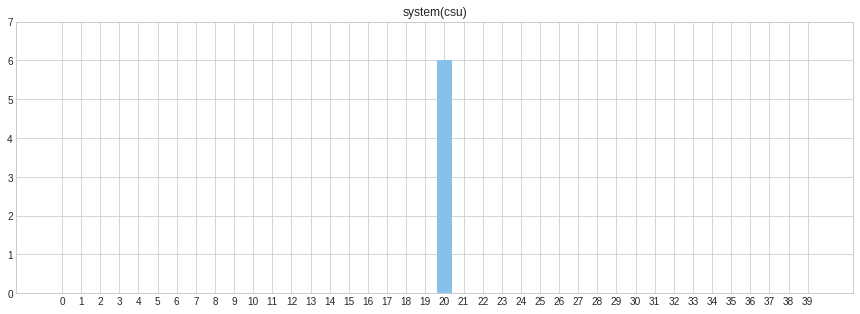

0.9367496997597597


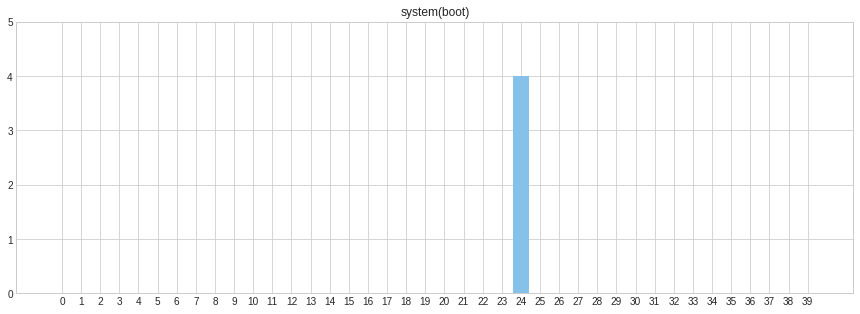

0.6244997998398398


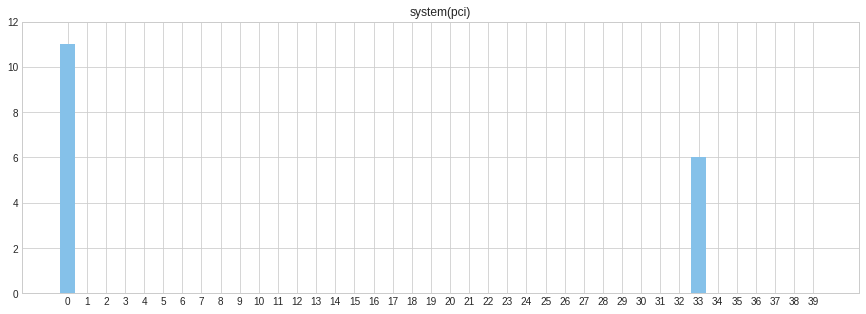

1.9350387593017357


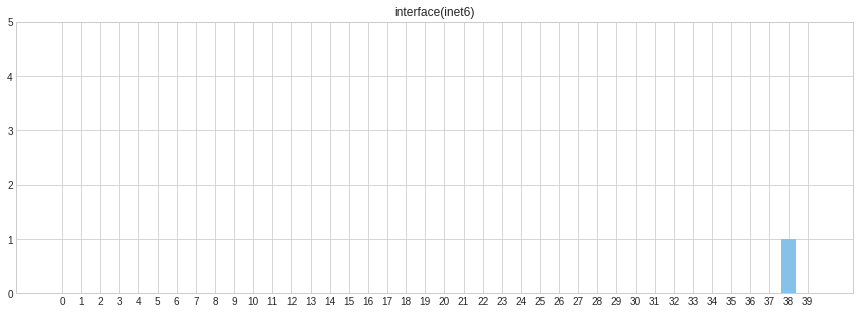

0.15612494995995996


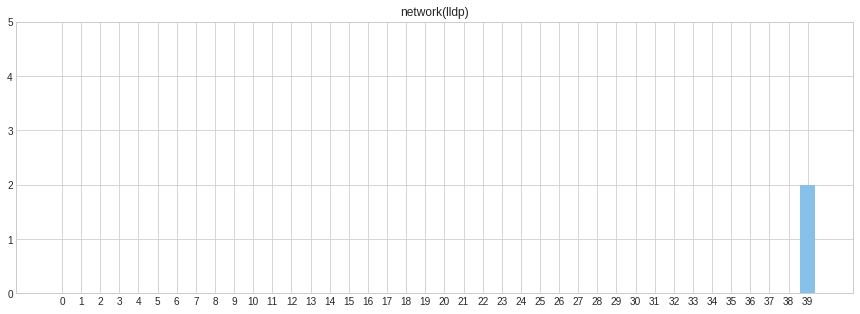

0.3122498999199199


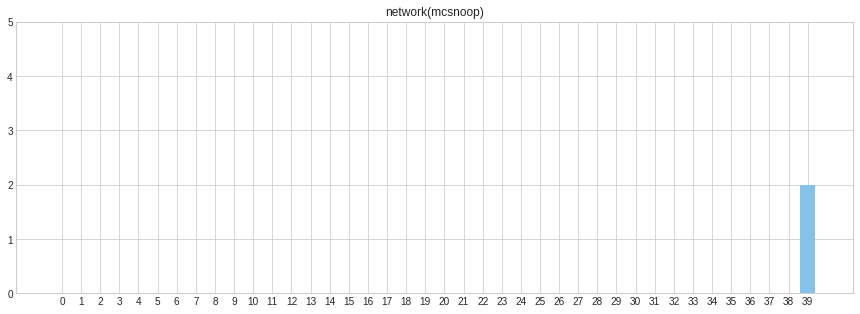

0.3122498999199199


In [335]:
plt.style.use('seaborn-colorblind')
plt.style.use('seaborn-whitegrid')
cvs = []

for cat, res in inf_per_cat2.items():
    plt.figure(figsize=(15, 5))
    plt.title(cat)
    y = collections.Counter(res)
    y = [y[i] if i in y else 0 for i in range(40)]
    plt.bar(np.arange(40), y, color="#85C1E9")
    plt.xticks(np.arange(40))
    minY = 5 if max(y) < 5 else max(y)+1
    plt.ylim(0, minY)
    plt.show()

    print(np.array(y).std())
    cvs.append((cat, np.array(y).std()/np.array(y).mean()))

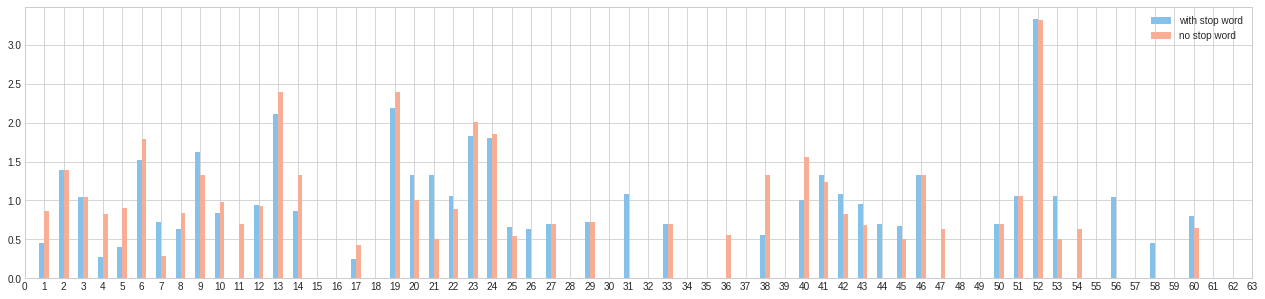

In [336]:
from scipy.stats import entropy
plt.style.use('seaborn-colorblind')
plt.style.use('seaborn-whitegrid')
ent_results = []

for cat, res in inf_per_cat.items():
    y = collections.Counter(res)
    y = [y[i] if i in y else 0 for i in range(40)]

    ent_results.append(entropy(y))


## stop words
ent_results2 = []
for cat, res in inf_per_cat2.items():
    y = collections.Counter(res)
    y = [y[i] if i in y else 0 for i in range(40)]

    ent_results2.append(entropy(y))
    
plt.figure(figsize=(22, 5))
plt.bar(np.arange(64)-0.25/2, ent_results, width=0.25, color="#85C1E9", label="with stop word")
plt.bar(np.arange(64)+0.25/2, ent_results2, width=0.25, color="#f8ad95", label="no stop word")
plt.xticks(np.arange(64))
plt.xlim(0, 63)
plt.legend()
plt.show()

In [337]:
print(np.array(ent_results).mean())
print(np.array(ent_results).std())
print()
print(np.array(ent_results2).mean())
print(np.array(ent_results2).std())

0.6736179480234137
0.6867860991547825

0.6698337616928333
0.7145742632085408


In [ ]:
## 逆変換

total_per_cat = np.array([len(lt_per_cat[i]) for i in inf_per_cat.keys()])

cat_per_inf = dict()
for i in range(40):
    cat_per_inf[i] = []

for cat, res in inf_per_cat.items():
    for r in res:
        cat_per_inf[r].append(cat)
    
for cat, res in cat_per_inf.items():
    plt.figure(figsize=(15, 5))
    plt.title(cat)
    y = collections.Counter(res)
    y = [y[i] if i in y else 0 for i in inf_per_cat.keys()]
    y = np.array(y) / total_per_cat
    plt.bar(np.arange(len(inf_per_cat)), y, color="#85C1E9")
    plt.xticks(np.arange(len(inf_per_cat)), inf_per_cat.keys(), rotation=90)
    plt.ylabel("#LT/#LT in the cat")
#     minY = 5 if max(y) < 5 else max(y)+1
#     plt.ylim(0, minY)
    plt.ylim(0, 1)
    plt.show()

In [ ]:
lt_per_inf_topic = {}
for i in range(40):
    lt_per_inf_topic[i] = []
    
for ltid, data in raw_lt.items():
    lt = data['lt']
        
    c = list(collections.Counter([word_dict[w] for w in string_to_corpus(lt, max_len=7)]).items())
    topic_dist, word_topic, word_topic_dist = lda[c]
    inf_topic = np.argmax(np.array([t[1] for t in topic_dist]))
    
    lt_per_inf_topic[inf_topic].append((lt, string_to_corpus(lt, max_len=7)))

In [ ]:
for inf_topic, lts in lt_per_inf_topic.items():
    print(inf_topic, inf_topic_words[inf_topic])
    
    for lt in lts:
        print("\t", lt[0], "\t",  lt[1])
    print()

### グラフ生成

- エッジの重みは，GTノードから出ているエッジの，それぞれの発生回数の割合

In [ ]:
inf_per_cat

In [ ]:
G = nx.DiGraph()
nx.set_node_attributes

pos = {}
for i,k in enumerate(inf_per_cat.keys()):
    if 'None' in k:
        pos[k] = (2,i)
    else:
        pos[k] = (0, i)
for i in range(40):
    pos[i] = (1, len(inf_per_cat)/40*i)

for cat, res in inf_per_cat.items():
    if cat not in G.nodes:
        G.add_node(cat)
        
    col = collections.Counter(res) # dstの集計
    total = sum(col.values())
    for dst, weight in col.items():
        if dst not in G.nodes:
            G.add_node(dst)
        G.add_edge(cat, dst, weight=weight/total)
        
for n, p in pos.items():
    G.node[n]['pos'] = p

In [ ]:
for a in G.edges(data=True):
    print(a)

In [ ]:
inf_node_edge_weight = dict()
for a,b in G.edges.items():
    if 'None'  in a[0]:
            if a[1] in inf_node_edge_weight:
                inf_node_edge_weight[a[1]] += 0
            else:
                inf_node_edge_weight[a[1]] = 0
        
    if a[1] in inf_node_edge_weight:
        inf_node_edge_weight[a[1]] += b['weight']
    else:
        inf_node_edge_weight[a[1]] = b['weight']
        
        
# edge_size = [i[2]['weight']*2 for i in G.edges(data=True)]
# edge_size = [1 if i[2]['weight']==1.0  else 0 for i in G.edges(data=True)]
# edge_size = [i[2]['weight'] if i[2]['weight']>0.55 else 0  for i in G.edges(data=True)]
edge_size = [i[2]['weight'] if "None" not in i[0] else -1 for i in G.edges(data=True)]

In [ ]:
x = collections.Counter([int(e*1000)/10 for e in edge_size])
plt.figure(figsize=(10, 5))
plt.bar(x.keys(), x.values())
plt.title("Edge weights distribution")
plt.xlabel("%")
plt.ylabel("#edges")
plt.xticks([i for i in range(0, 100, 10)])
plt.show()

In [ ]:
x = collections.Counter([int(e*1000)/10 for e in edge_size])

# remove -100% data
x = sorted(x.items(), key=lambda x:x[0])
x[0] = (0., 0)

plt.figure(figsize=(10, 5))
plt.bar([i[0] for i in x], [i[1] for i in x])
plt.title("Edge weights distribution (without 'None')")
plt.xlabel("%")
plt.ylabel("#edges")
plt.xticks([i for i in range(0, 100, 10)])
plt.ylim(0, 30)
plt.show()

In [ ]:
print('All edges:', len(G.edges()))

print('Without None:', len([(k,v) for k,v in G.edges.items() if 'None' not in k[0]]))

In [ ]:
# エッジ1本のみ
for i in np.where(np.array(edge_size)==1)[0]:
    print(list(G.edges())[i], "\t", edge_size[i])
    
print()
for i in np.where(np.array(edge_size)>0.55)[0]:
    print(list(G.edges())[i], "\n\t", edge_size[i], len(lt_per_cat[list(G.edges())[i][0]]))

In [ ]:
plt.figure(figsize=(20, 30))
node_size = [20 if type(g) == str else inf_node_edge_weight[g]*500 for g in G.nodes]
nx.draw_networkx(G, pos, node_color='b', alpha=0.6, node_size=node_size, width=edge_size, edge_color='g')

plt.show()

# nx.draw_networkx_labels(G, pos, fontsize=14, font_family="Yu Gothic", font_weight="bold")

# edge_width = [ d['weight']*0.2 for (u,v,d) in G.edges(data=True)]
# nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color='C', width=edge_width)

# plt.axis('off')
# plt.savefig("g2.png")
# plt.show()

### 集計結果

- gtのカテゴリごとに，どのトピックが振られたかを確認
    - カテゴリとトピックのそれらしい対応をつけて見た
    - 複数マージされるものと，対応づけられなかったものが存在
- 訓練じはUIの単語を含むものは除外したが，評価じは全て含めた
- gt通りにうまくいったものは存在

## VyOS

In [13]:
with open("./vyos_logs/tpl_all_uniq", "r") as f:
    raw_vyos = f.readlines()

In [14]:
corpus = []
for lt in raw_vyos:
    words = [remove_symbols(t) for t in lt.split()]
    split_words = []
    for w in words:
        if len(w.split()) > 1: # さらに分割できる場合
            split_words.extend(w.split())
        else:
            split_words.append(w)
    split_words = [t.lower() for t in split_words if t != '']
    corpus.append(split_words)

In [15]:
len(corpus)

29266

In [16]:
## エラー文の抽出

error_words = []

# corpus = []
for lt in raw_vyos[2599:2733]:
    words = [remove_symbols(t) for t in lt.split()]
    split_words = []
    for w in words:
        if len(w.split()) > 1: # さらに分割できる場合
            split_words.extend(w.split())
        else:
            split_words.append(w)
    split_words = [t.lower() for t in split_words if t != '']
    
    split_words = [w for w in split_words][5:]
    error_words.append(split_words)

In [17]:
error_words

[['.lib', 'section', 'in', 'a.out', 'corrupted'],
 ['accessing', 'a', 'corrupted', 'shared', 'library'],
 ['address', 'already', 'in', 'use'],
 ['address', 'family', 'not', 'supported', 'by', 'protocol'],
 ['advertise', 'error'],
 ['argument', 'list', 'too', 'long'],
 ['attempting', 'to', 'link', 'in', 'too', 'many', 'shared', 'libraries'],
 ['bad', 'address'],
 ['bad', 'file', 'descriptor'],
 ['bad', 'font', 'file', 'format'],
 ['bad', 'message'],
 ['block', 'device', 'required'],
 ['broken', 'pipe'],
 ['can', 'not', 'access', 'a', 'needed', 'shared', 'library'],
 ['cannot', 'allocate', 'memory'],
 ['cannot', 'assign', 'requested', 'address'],
 ['cannot', 'exec', 'a', 'shared', 'library', 'directly'],
 ['cannot', 'send', 'after', 'transport', 'endpoint', 'shutdown'],
 ['channel', 'number', 'out', 'of', 'range'],
 ['communication', 'error', 'on', 'send'],
 ['connection', 'refused'],
 ['connection', 'reset', 'by', 'peer'],
 ['connection', 'timed', 'out'],
 ['destination', 'address', 're

In [18]:
def remove_error_words(split_words):
    for error_word in error_words:
        if error_word == split_words[-len(error_word):]:
            return split_words[:-len(error_word)] ## 前方の単語が抜かれてしまわないようにする
    return split_words

In [19]:
all_words = list(set([word for words in corpus for word in words]))
word_dict = {w:i for i, w in enumerate(all_words)}
inv_word_dict = {v:k for k,v in word_dict.items()}

corpus = []
tmp_corpus = []
for lt in raw_vyos:
    words = [remove_symbols(t) for t in lt.split()]
    split_words = []
    for w in words:
        if len(w.split()) > 1: # さらに分割できる場合
            split_words.extend(w.split())
        else:
            split_words.append(w)
    split_words = [t.lower() for t in split_words if t != '']
    split_words = remove_error_words(split_words)
    tmp_corpus.append(split_words)
    
# uniq_corpus = list(set([tuple(i) for i in tmp_corpus]))
# for split_words in uniq_corpus:
#     lt_word_id_cnt = collections.Counter([word_dict[w] for w in split_words])
#     corpus.append([(tid, cnt) for tid, cnt in lt_word_id_cnt.items()])

In [20]:
for i in range(18145,18279):
    tmp_corpus[i] = ['cant',
      'setsockopt',
      'ip',
      'add',
      'membership',
      'fd',
      'addr',
      'ifindex',
      'alldrouters']

for i in range(18279,18413):
    tmp_corpus[i] = ['cant',
      'setsockopt',
      'ip',
      'add',
      'membership',
      'fd',
      'addr',
      'ifindex',
      'allspfrouters']

In [21]:
uniq_corpus = list(set([tuple(i) for i in tmp_corpus]))
for split_words in uniq_corpus:
    lt_word_id_cnt = collections.Counter([word_dict[w] for w in split_words])
    corpus.append([(tid, cnt) for tid, cnt in lt_word_id_cnt.items()])

In [22]:
# 単語のカウント
word_cnt = {}
for wid, cnt in sorted(collections.Counter([c[0] for s in corpus for c in s]).items(), key= lambda x: x[1])[::-1]:
    print(inv_word_dict[wid], cnt)
    word_cnt[inv_word_dict[wid]] = cnt

cant 548
not 444
pid 414
to 397
failed 390
ospf 379
socket 355
file 333
ripng 307
is 290
type 290
lock 272
error 242
set 195
lsa 193
router 188
could 184
no 182
interface 169
on 164
for 163
create 160
/ 158
seq 157
route 150
bind 149
accept 147
closing 145
recv 143
vty 143
nonblocking 138
recvfrom 137
solicitation 136
vtysh 136
exiting 136
continuing 135
fopen 135
abr 135
in 129
address 110
of 106
area 102
too 94
network 94
a 92
packet 92
new 91
from 83
length 82
add 80
invalid 80
send 76
link 75
neighbor 73
by 69
state 68
message 68
the 67
zebra 64
with 63
cannot 63
out 62
received 62
id 60
unknown 59
has 58
as 57
update 57
opaque 56
connection 55
open 55
fd 54
apiserver 53
already 53
nexthop 52
attribute 52
protocol 51
lsatype 51
operation 50
process 50
many 49
ip 49
be 48
this 48
ipv6 47
rcvd 46
refresh 46
timer 45
metric 45
found 45
device 44
bad 44
smux 43
announce 43
nssa 43
level 42
start 42
read 41
index 41
ifindex 41
isis 39
0x 39
or 38
originate 38
prefix 37
multicast 36
peer

In [23]:
tmp_corpus[2466:2600]

[['cant', 'allocate', 'memory', 'for', '`', 'size'],
 ['cant', 'allocate', 'memory', 'for', '`', 'size'],
 ['cant', 'allocate', 'memory', 'for', '`', 'size'],
 ['cant', 'allocate', 'memory', 'for', '`', 'size'],
 ['cant', 'allocate', 'memory', 'for', '`', 'size'],
 ['cant', 'allocate', 'memory', 'for', '`', 'size'],
 ['cant', 'allocate', 'memory', 'for', '`', 'size'],
 ['cant', 'allocate', 'memory', 'for', '`', 'size'],
 ['cant', 'allocate', 'memory', 'for', '`', 'size'],
 ['cant', 'allocate', 'memory', 'for', '`', 'size'],
 ['cant', 'allocate', 'memory', 'for', '`', 'size'],
 ['cant', 'allocate', 'memory', 'for', '`', 'size'],
 ['cant', 'allocate', 'memory', 'for', '`', 'size'],
 ['cant', 'allocate', 'memory', 'for', '`', 'size'],
 ['cant', 'allocate', 'memory', 'for', '`', 'size'],
 ['cant', 'allocate', 'memory', 'for', '`', 'size'],
 ['cant', 'allocate', 'memory', 'for', '`', 'size'],
 ['cant', 'allocate', 'memory', 'for', '`', 'size'],
 ['cant', 'allocate', 'memory', 'for', '`', 's

In [293]:
# LTレベルの共起
cor_df = pd.DataFrame(index=np.arange(len(word_dict)), columns=np.arange(len(word_dict)), dtype=int)
cor_df = cor_df.fillna(0)

for s in tqdm.tqdm(corpus):
    for a,b in itertools.combinations(s, 2):
        ida = int(a[0])
        idb = int(b[0])
        cor_df[ida][idb] += 1
        cor_df[idb][ida] += 1

cor_list = []
for a,b in tqdm.tqdm(itertools.combinations(np.arange(len(word_dict)), 2)):
    if cor_df[a][b] != 0 :
        cor_list.append([(a, b) , cor_df[a][b]])
        
# for i in tqdm.tqdm(sorted(cor_list, key=lambda x:x[1], reverse=True)):
#     a,b = i[0]
#     print(inv_word_dict[a], inv_word_dict[b], i[1])
#     print("\t simpson:", i[1]/min(word_cnt[inv_word_dict[a]], word_cnt[inv_word_dict[b]]))
#     print("\t jaccard:", i[1]/(word_cnt[inv_word_dict[a]] + word_cnt[inv_word_dict[b]] - i[1]))
#     print()

100%|██████████| 3355/3355 [00:12<00:00, 262.34it/s]
2485335it [00:37, 66372.68it/s]


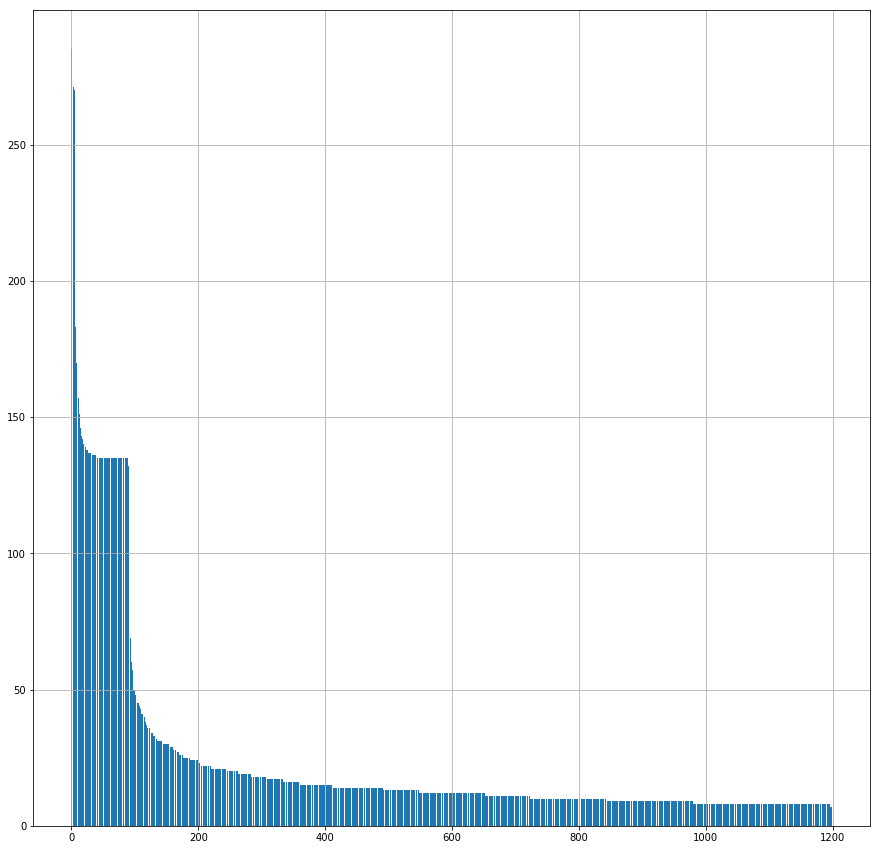

In [132]:
plot_data = [i[1] for i in sorted(cor_list, key=lambda x:x[1], reverse=True)][:1200]
plt.figure(figsize=(15, 15))
plt.bar(np.arange(len(plot_data)), plot_data)
plt.grid()
plt.show()

In [294]:
# stop_words = ["failed", "cant", "not", "to", "could", "cannot", "is", "a", "for", "fail"]
stop_words = ["failed", "is", "cant", "not", "error", "to"]

In [295]:
# G = nx.DiGraph()
G = nx.Graph()
nx.set_node_attributes

for i in sorted(cor_list, key=lambda x:x[1], reverse=True):
    if i[1] > 5: # 共起がn回以上
        a,b = i[0]
        
        if inv_word_dict[a] in stop_words or inv_word_dict[b] in stop_words:
            continue
            
        simpson = i[1]/min(word_cnt[inv_word_dict[a]], word_cnt[inv_word_dict[b]])
        jaccard = i[1]/(word_cnt[inv_word_dict[a]] + word_cnt[inv_word_dict[b]] - i[1])
        
        print(simpson)
        if simpson > 0.8:
            if a not in G.nodes:
                G.add_node(inv_word_dict[a])

            if b not in G.nodes:
                G.add_node(inv_word_dict[b])

            src = inv_word_dict[a] if np.argmin([word_cnt[inv_word_dict[a]], word_cnt[inv_word_dict[b]]]) == 0 else inv_word_dict[b]
            dst = inv_word_dict[a] if src == inv_word_dict[b] else inv_word_dict[b]
            G.add_edge(src, dst, weight=jaccard)

0.8558558558558559
0.9963235294117647
0.9963235294117647
0.5206896551724138
0.7487179487179487
0.782608695652174
0.9530201342281879
0.4560260586319218
0.9455782312925171
0.965034965034965
0.8726114649681529
0.958041958041958
0.8726114649681529
0.951048951048951
0.951048951048951
1.0
1.0
1.0
1.0
0.9855072463768116
0.951048951048951
1.0
0.9183673469387755
0.9183673469387755
0.9310344827586207
0.9926470588235294
0.9782608695652174
0.7336956521739131
0.9310344827586207
0.9926470588235294
0.9782608695652174
1.0
0.84375
1.0
0.9310344827586207
0.9926470588235294
0.9782608695652174
0.9926470588235294
1.0
0.84375
1.0
0.9854014598540146
0.9060402684563759
0.9926470588235294
0.9310344827586207
0.9926470588235294
0.9440559440559441
0.9782608695652174
0.9926470588235294
0.9926470588235294
1.0
1.0
0.9782608695652174
0.84375
1.0
0.9777777777777777
0.43523316062176165
0.5494505494505495
0.8064516129032258
1.0
0.24725274725274726
0.46808510638297873
0.4215686274509804
0.9534883720930233
0.7735849056603

In [296]:
json_data = nx.node_link_data(G)
f = open("./d3/vyos_nx.json", "w")
json.dump(json_data, f, ensure_ascii=False, indent=4, sort_keys=True, separators=(',', ': '))
f.close()

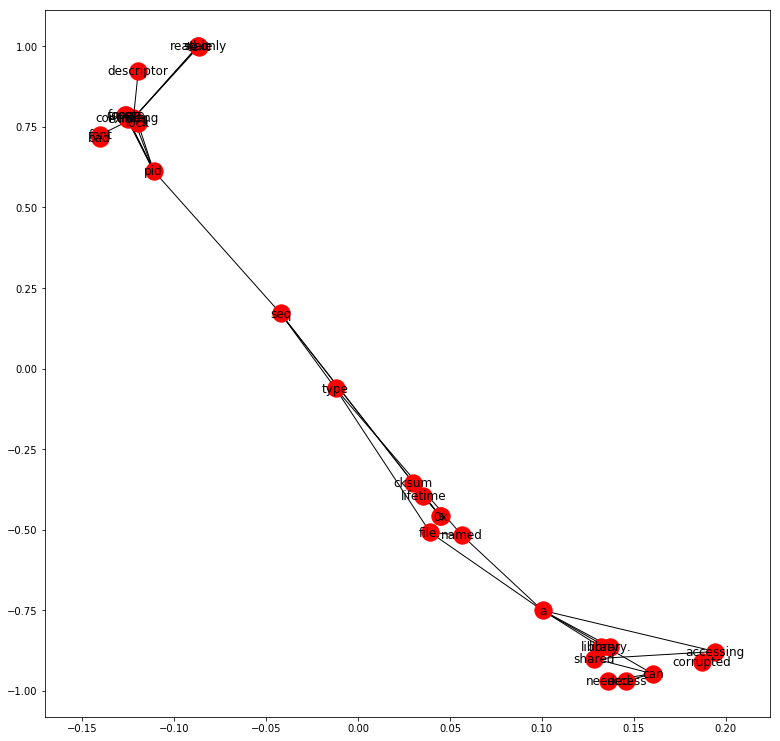

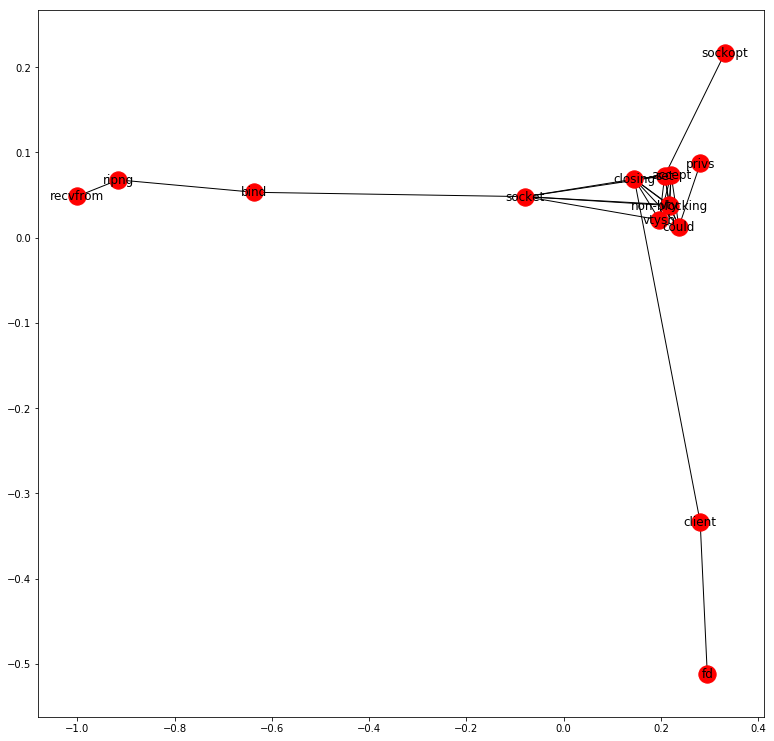

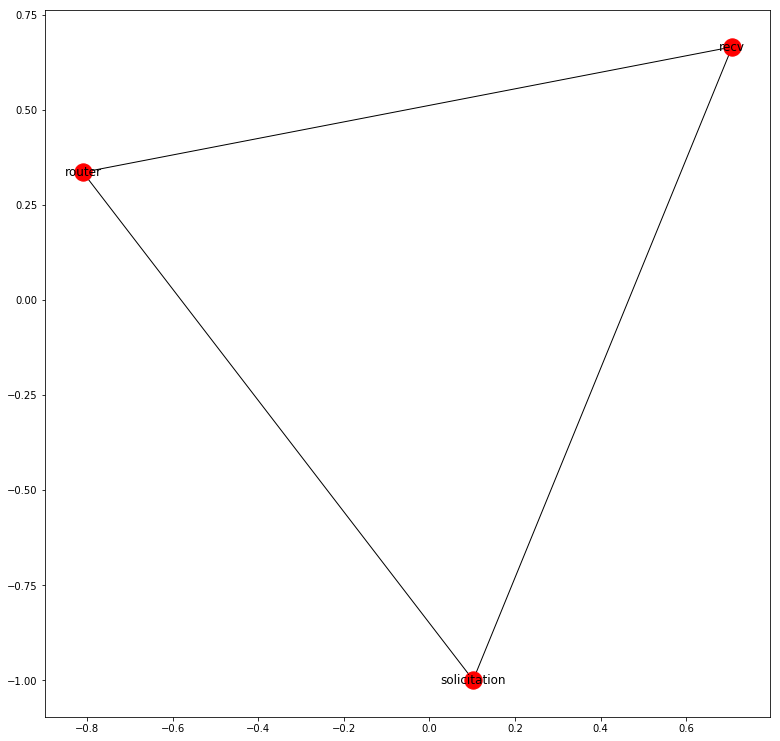

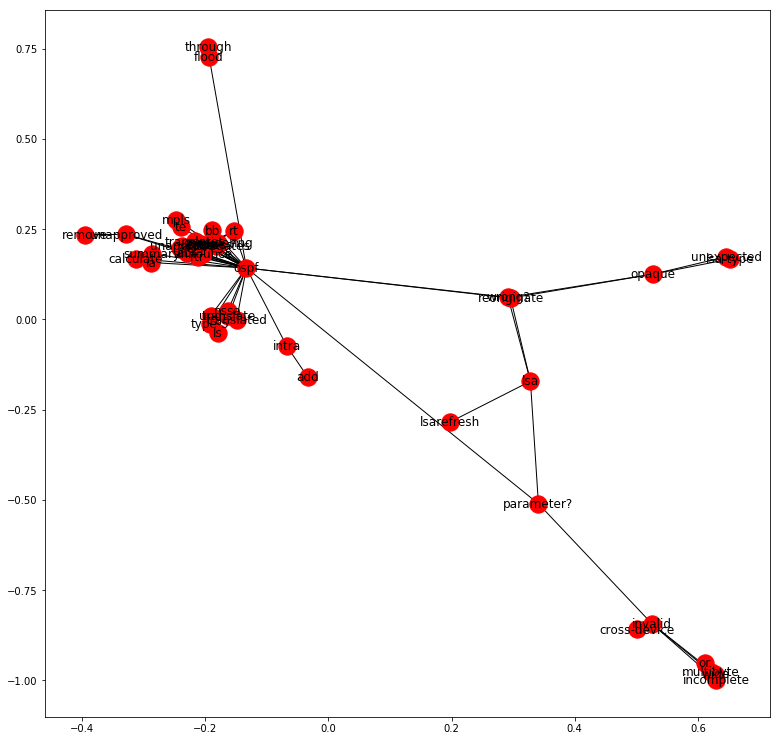

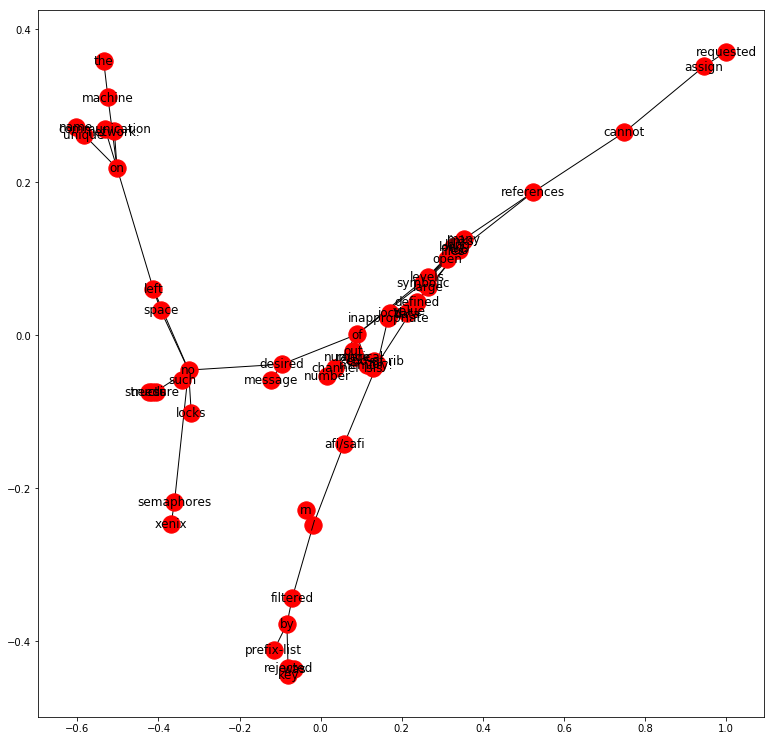

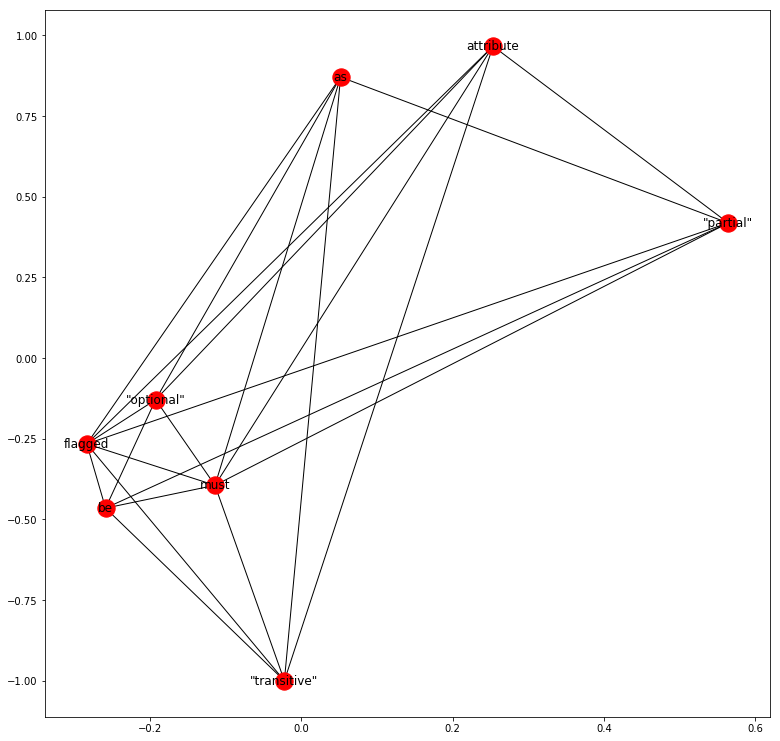

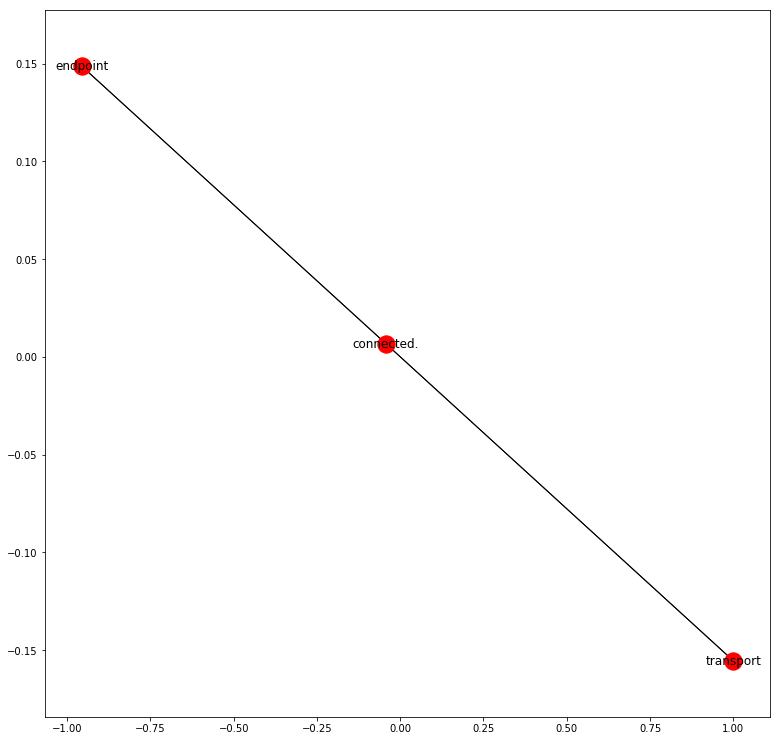

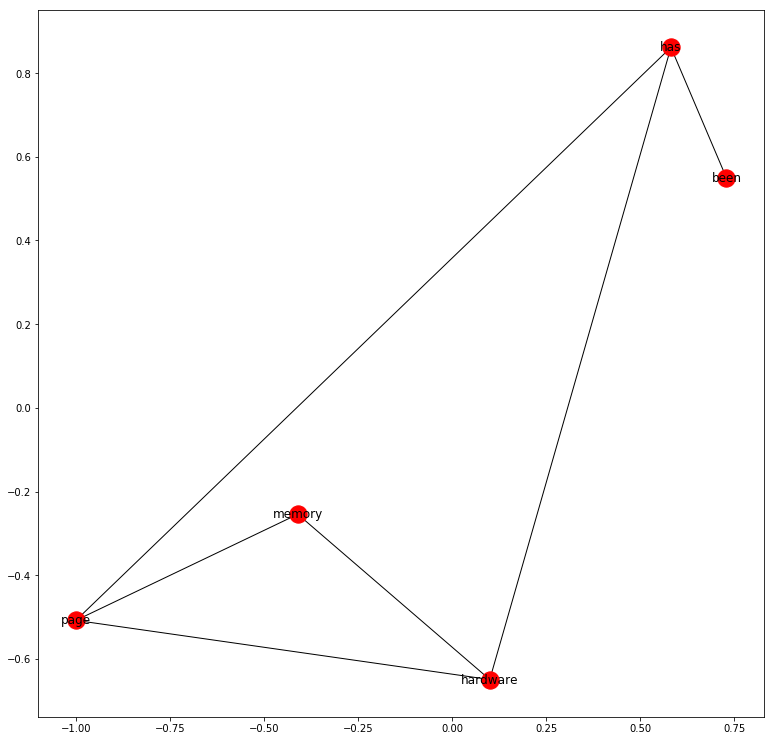

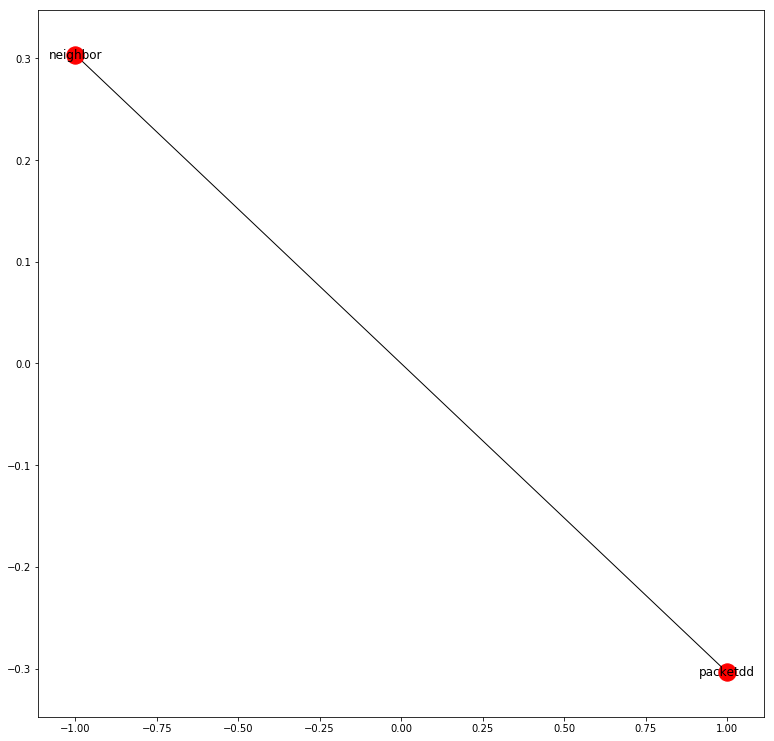

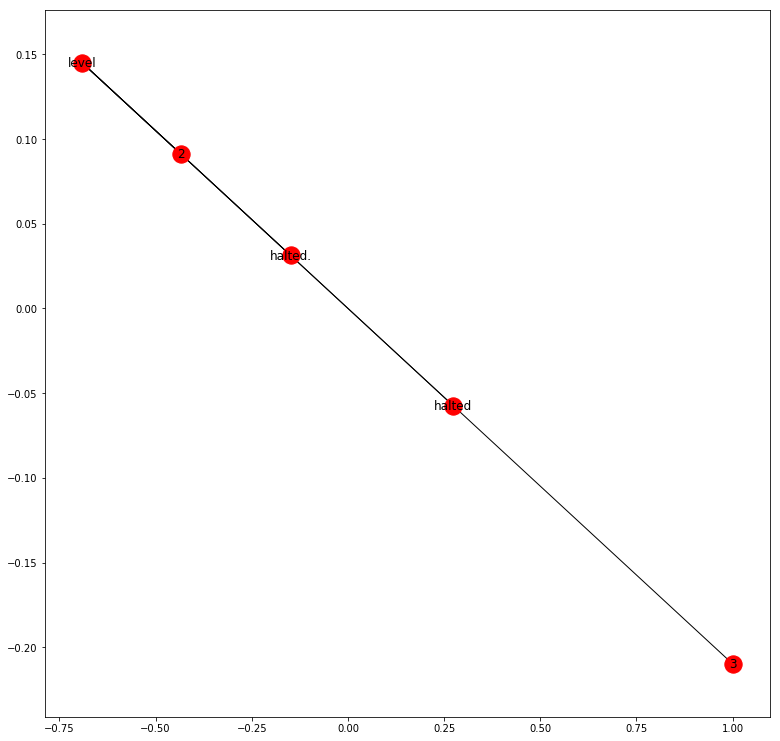

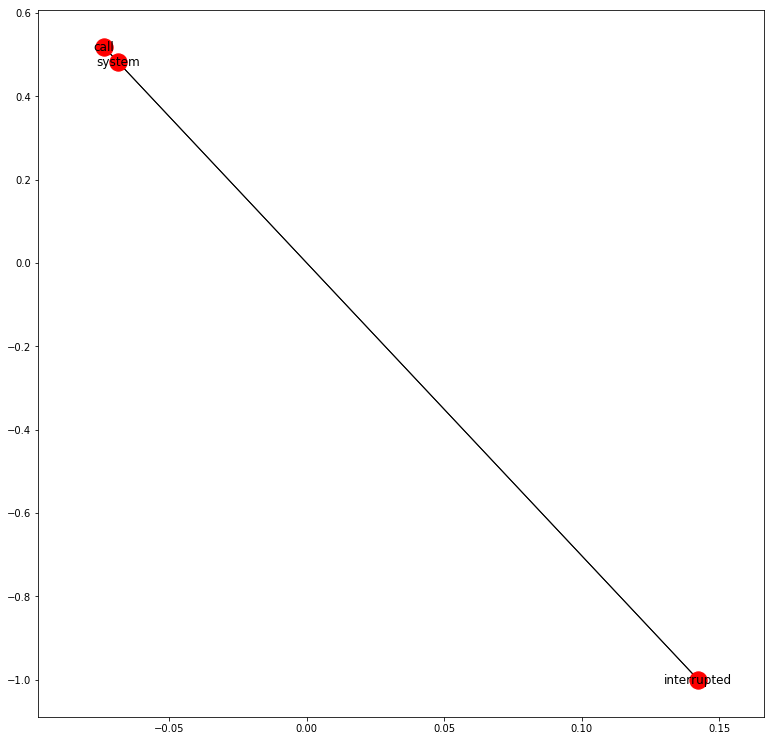

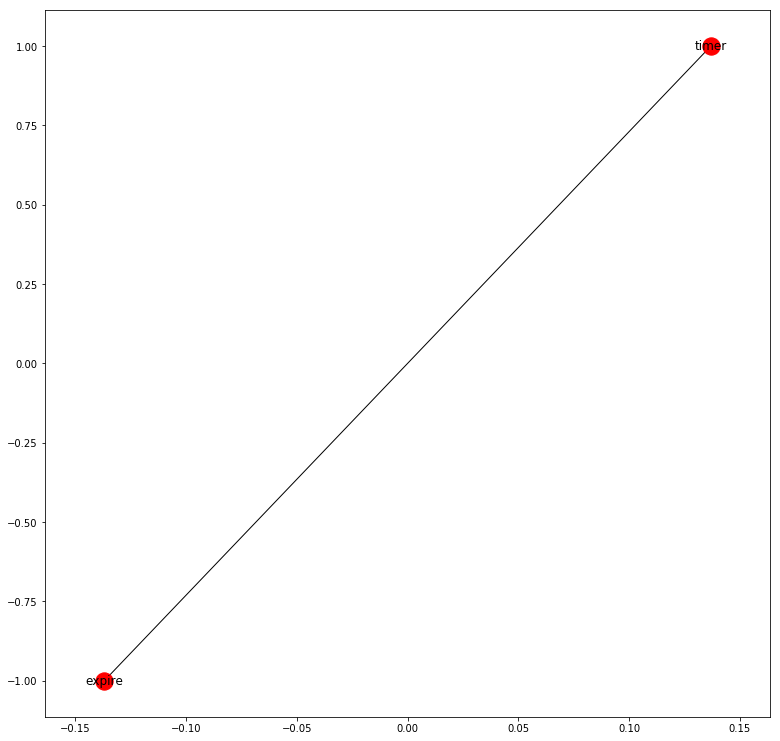

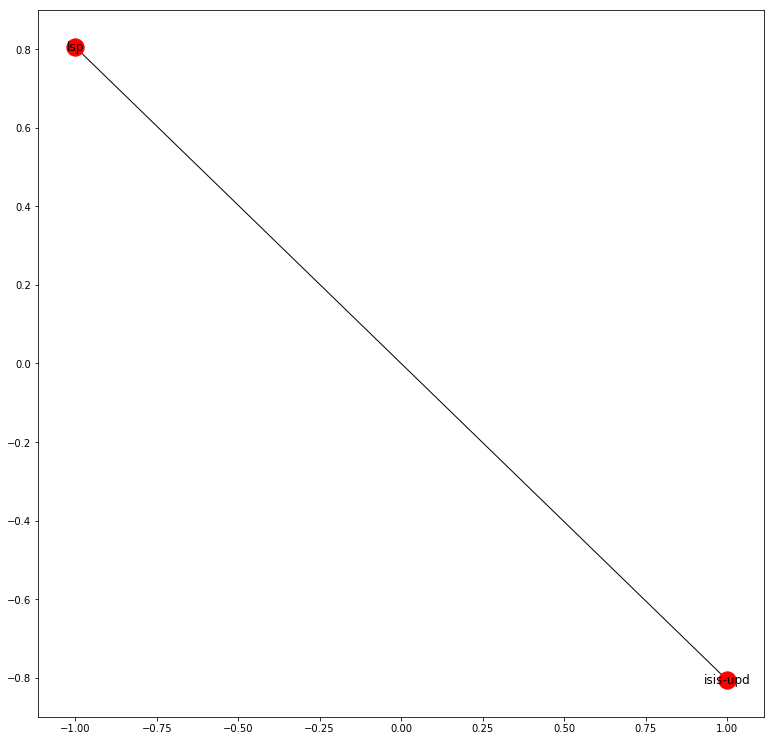

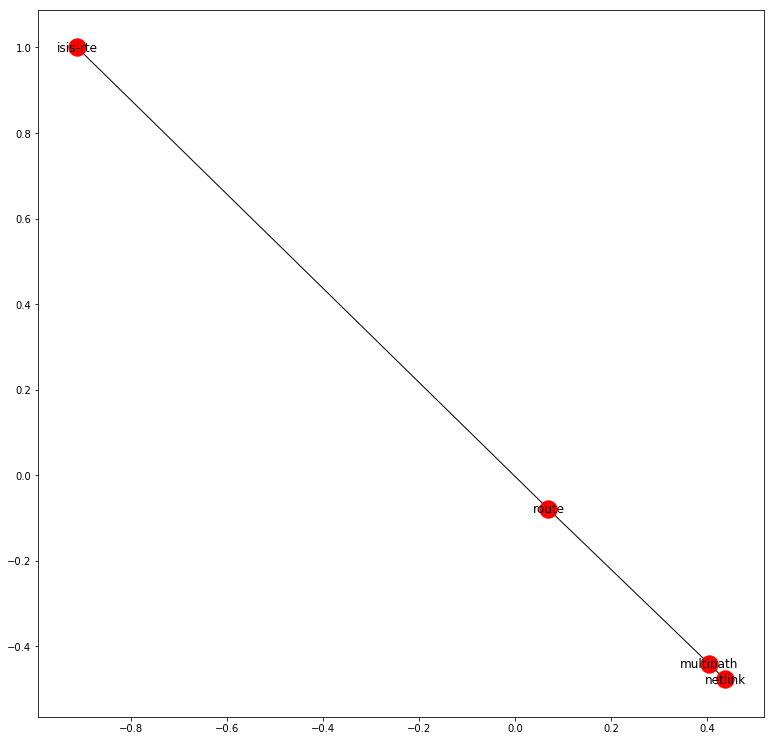

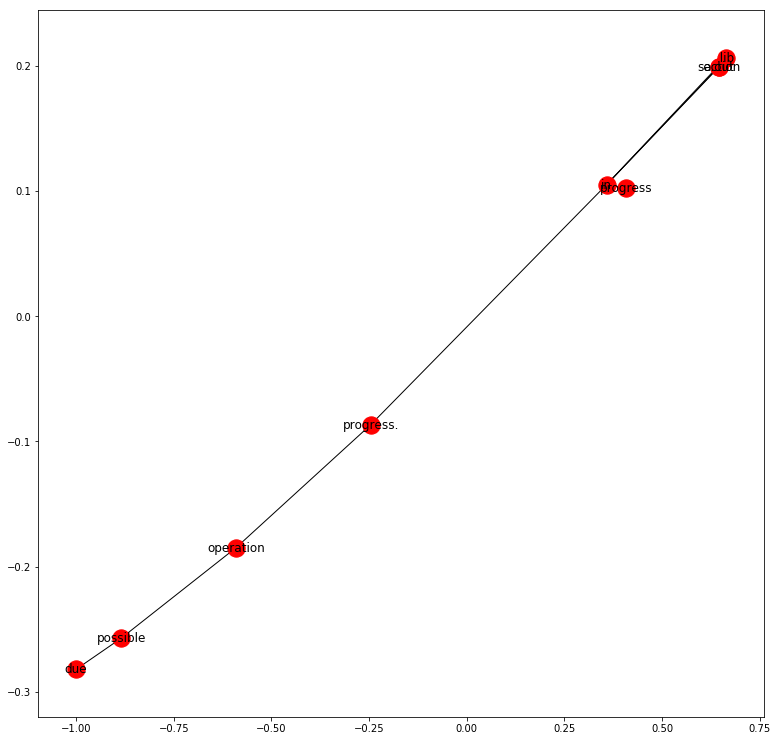

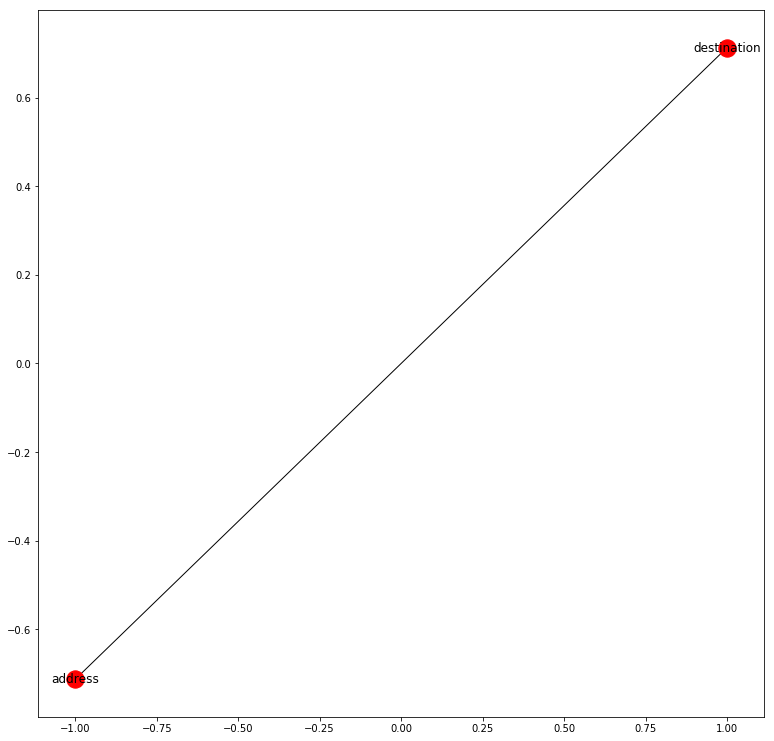

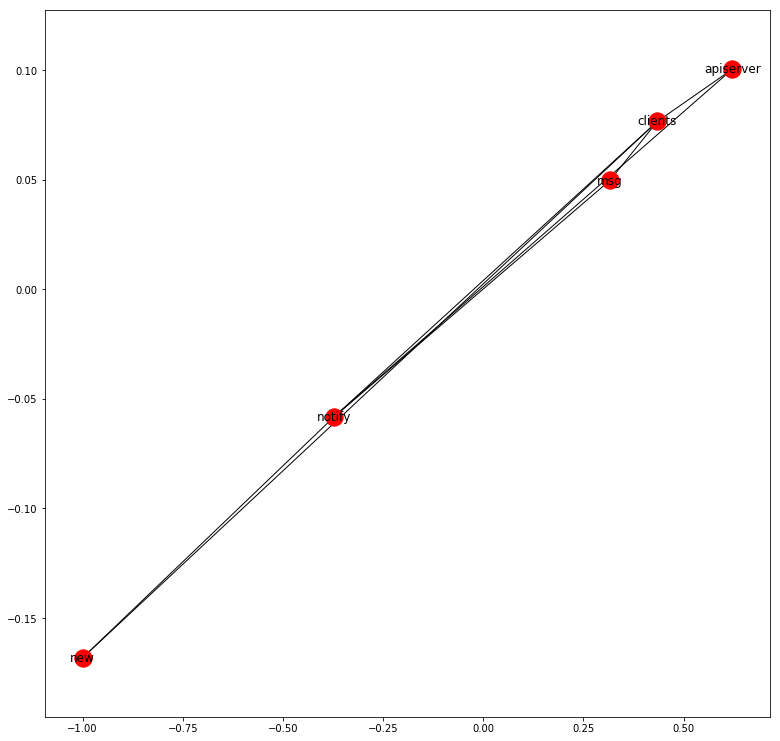

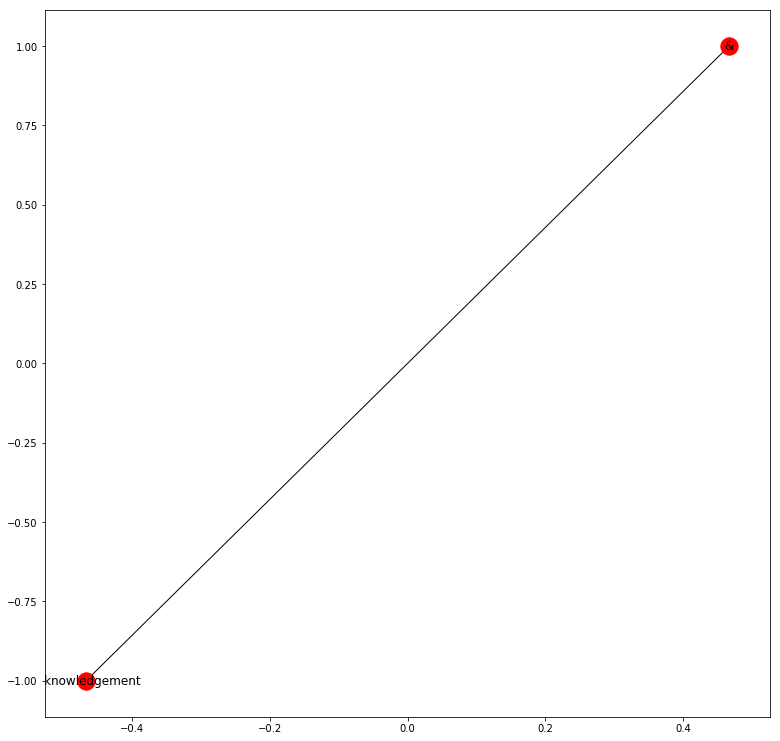

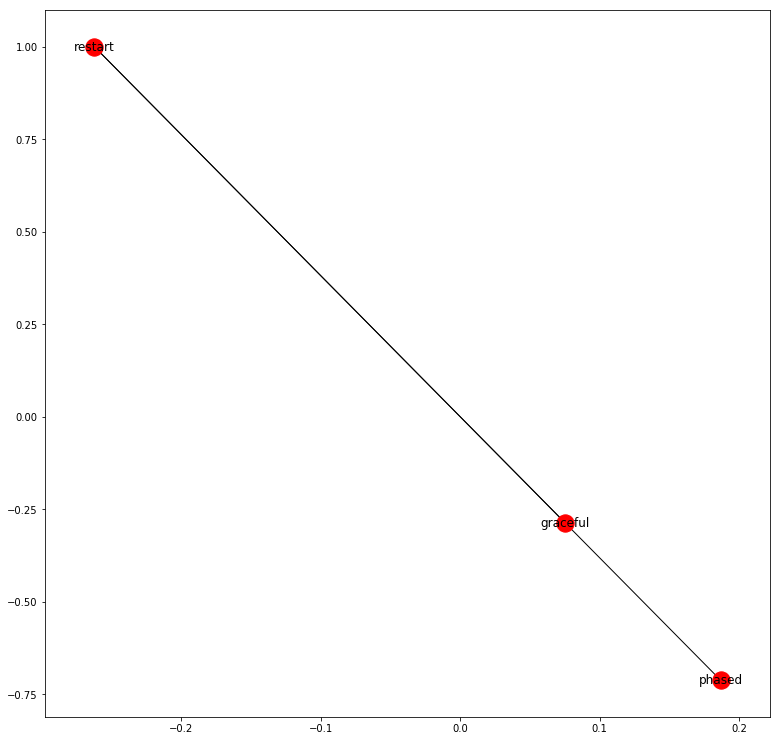

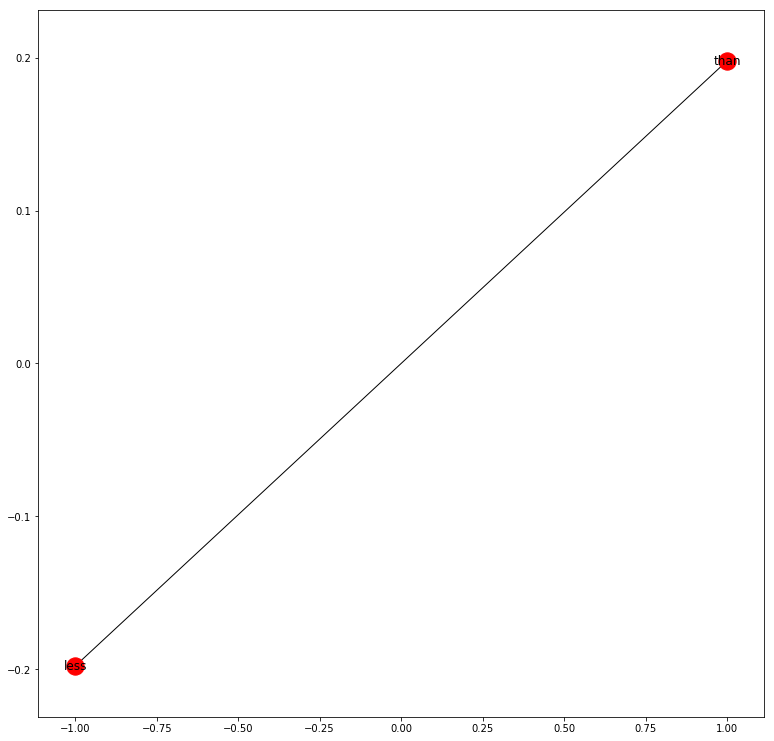

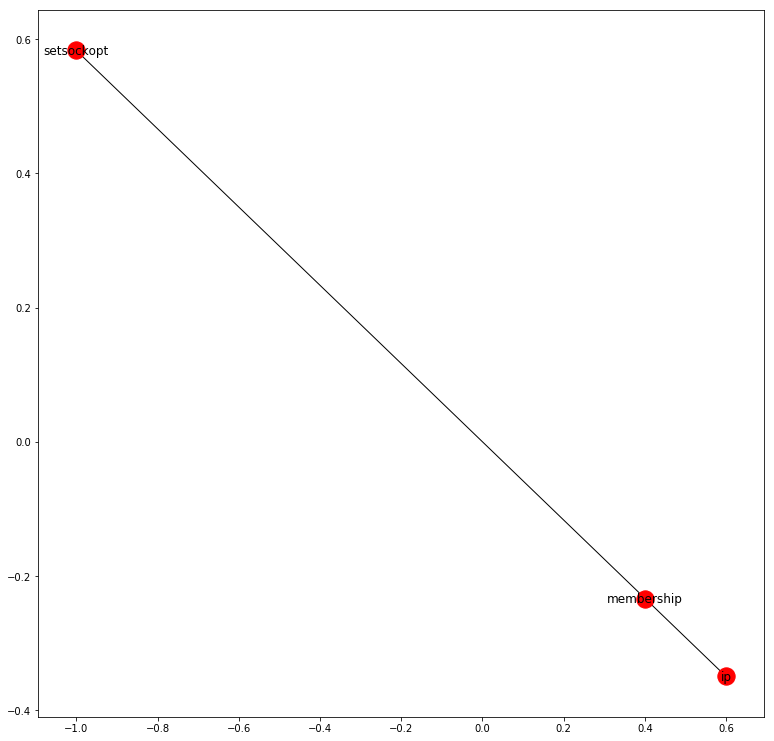

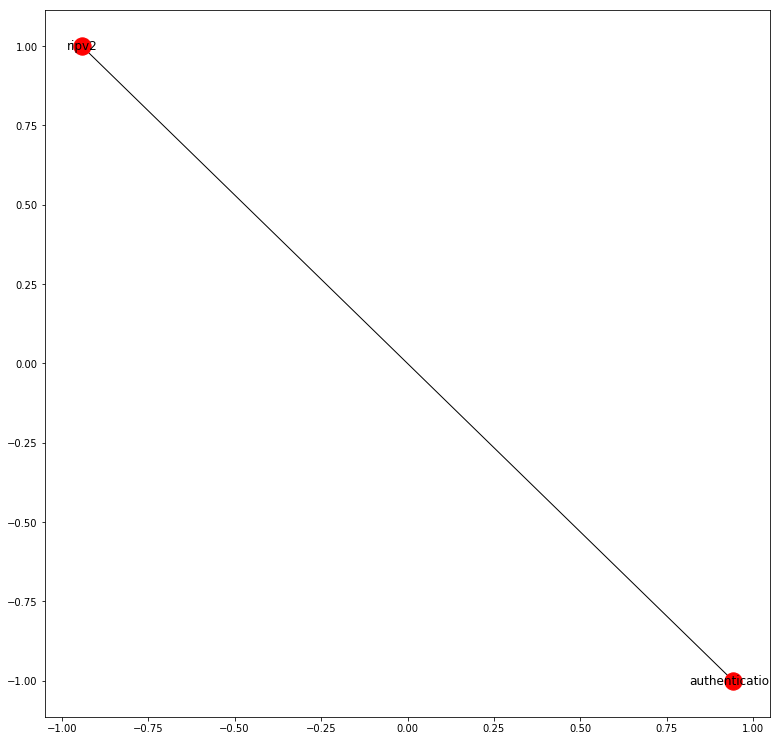

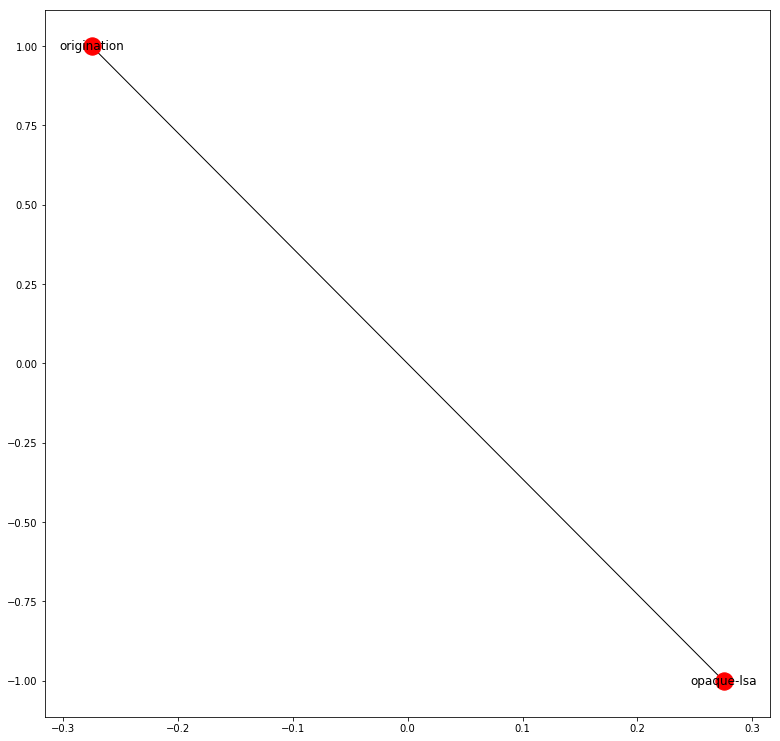

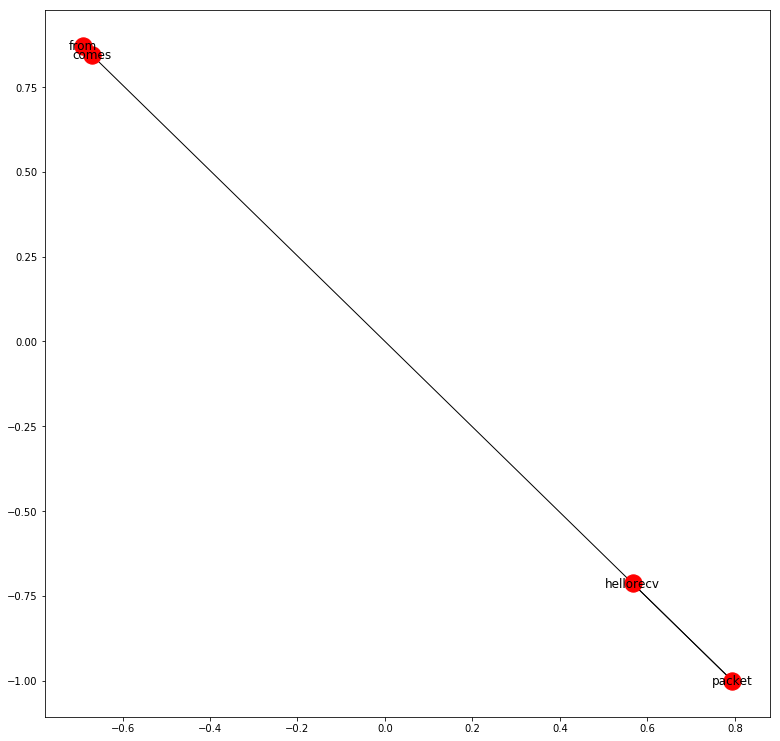

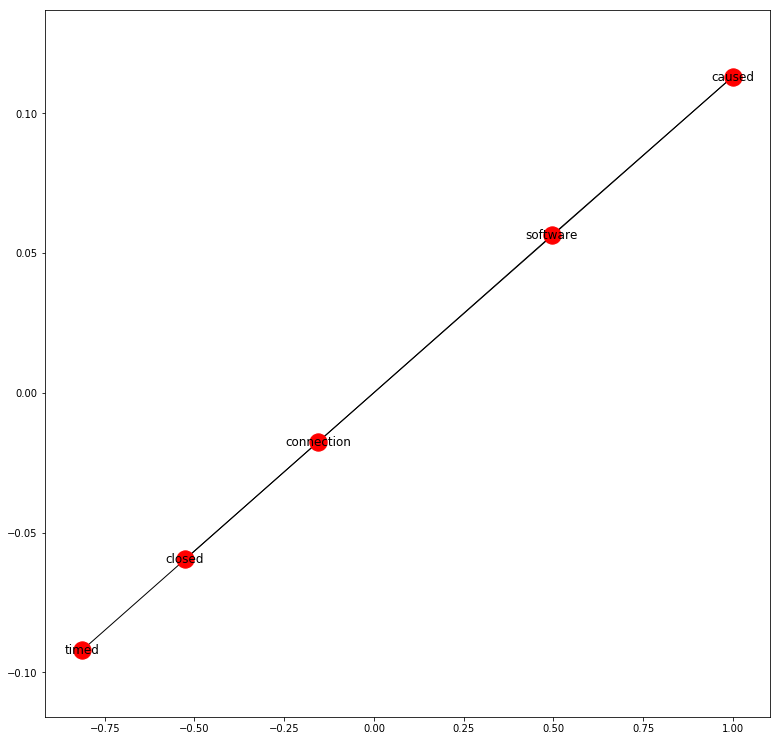

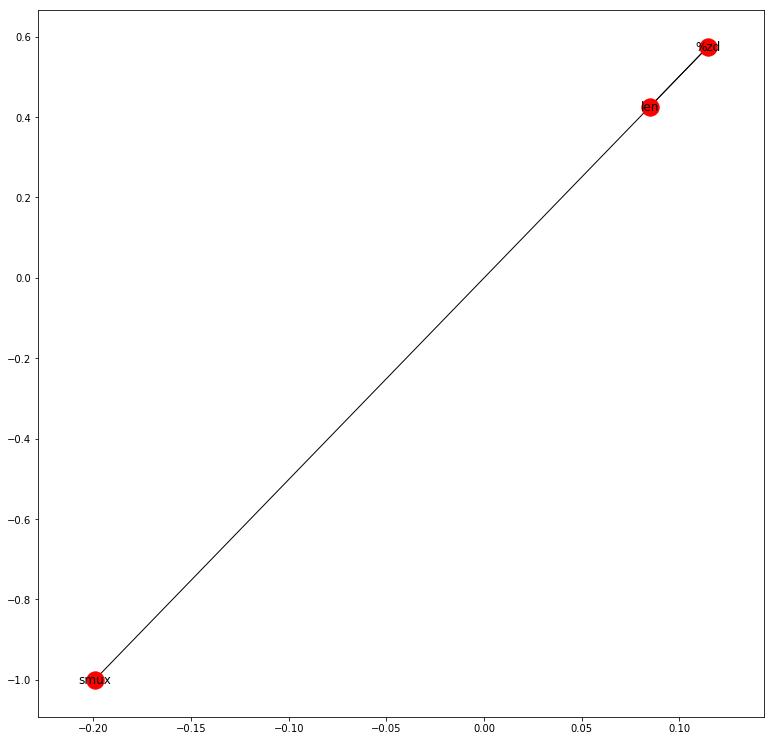

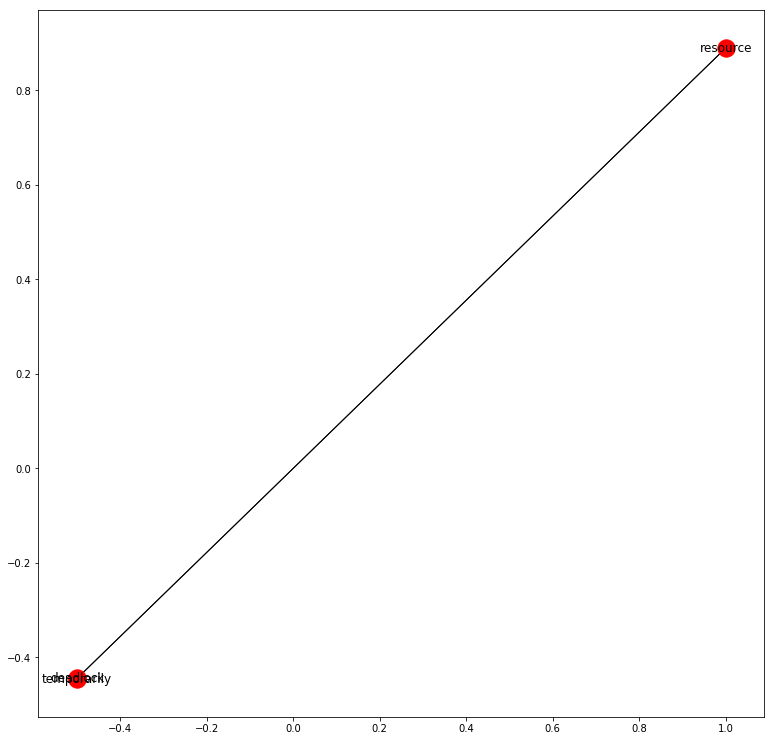

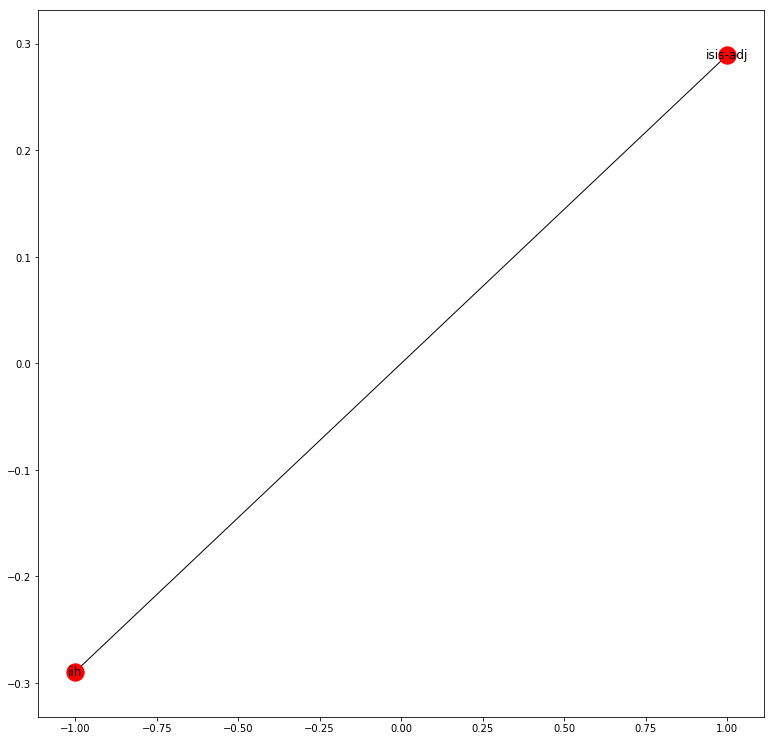

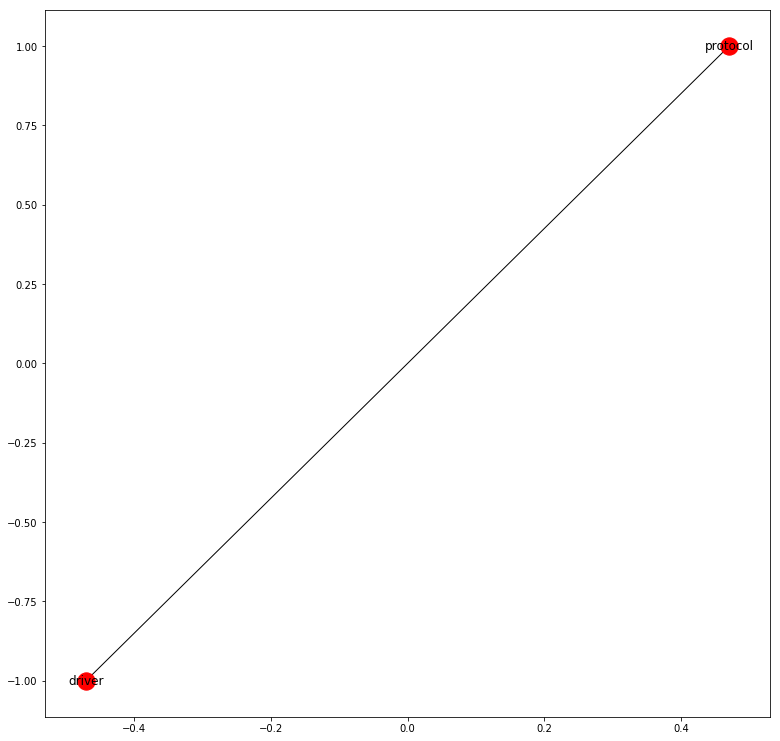

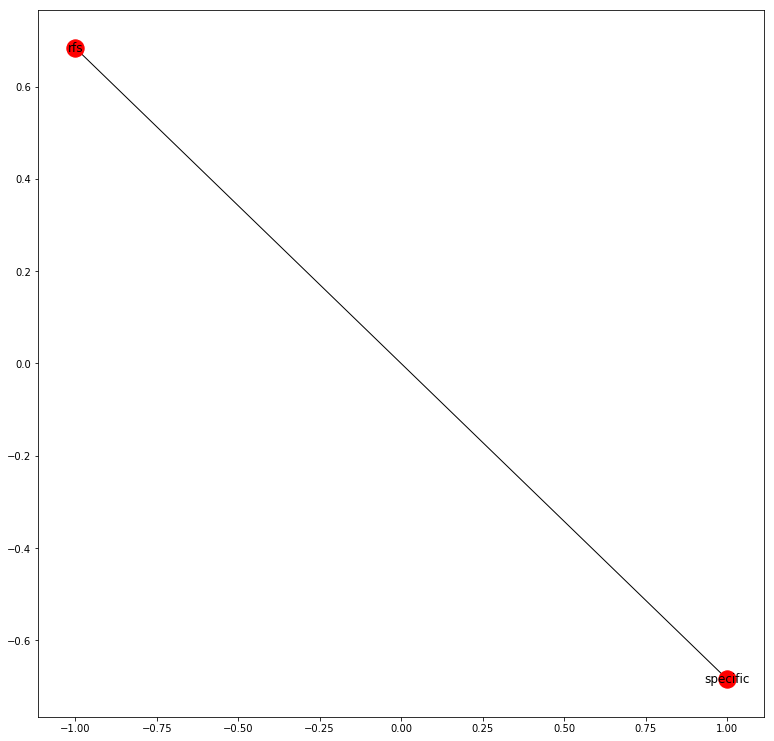

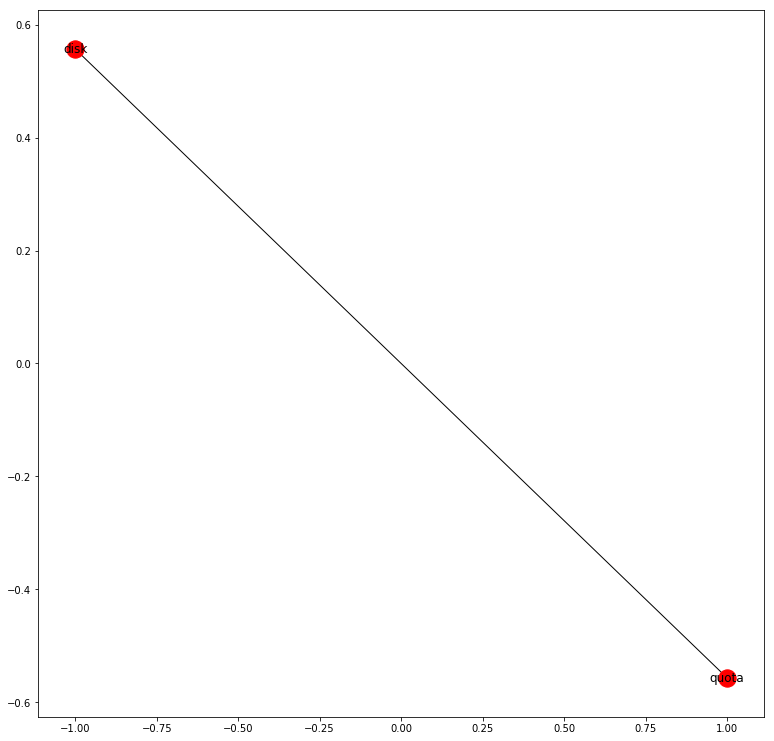

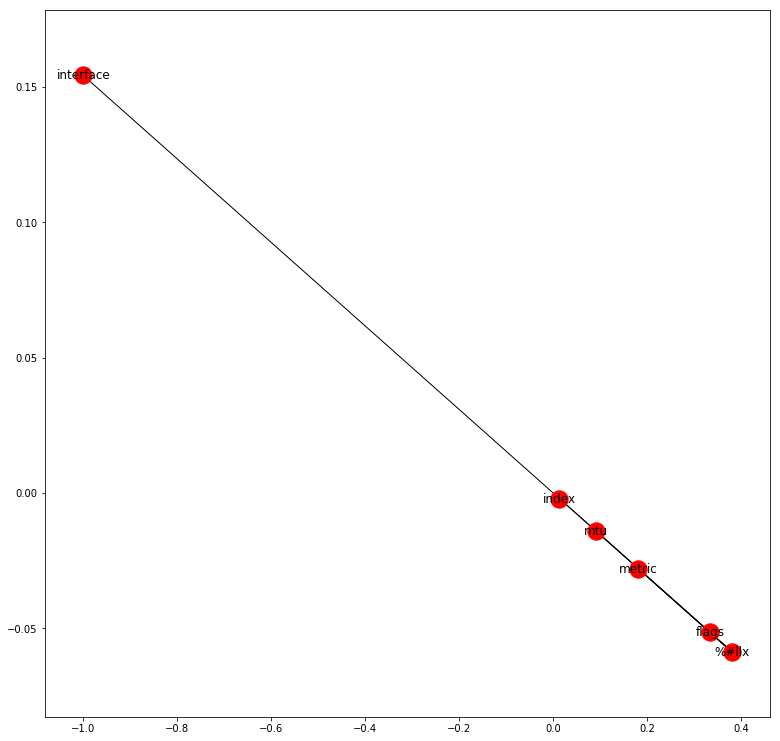

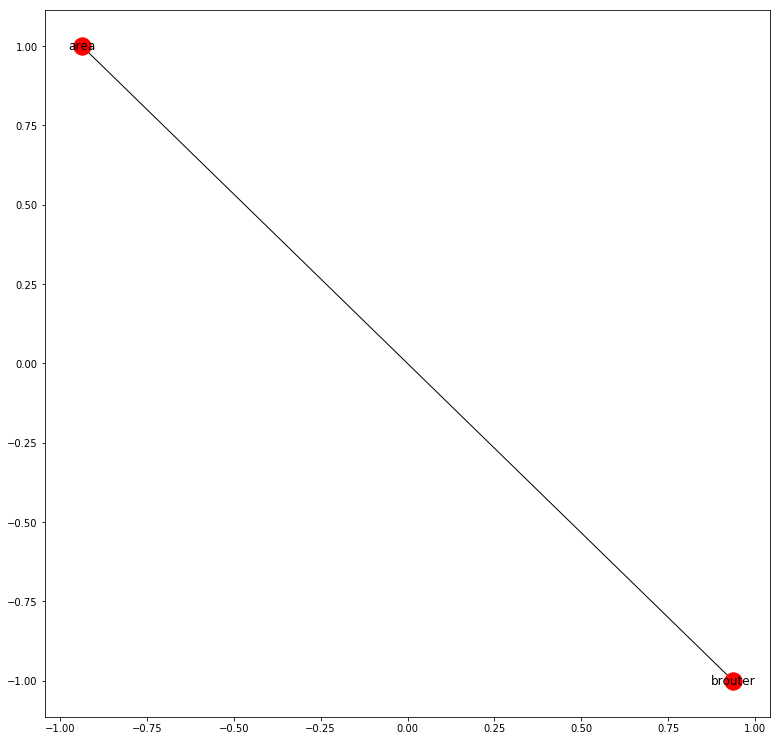

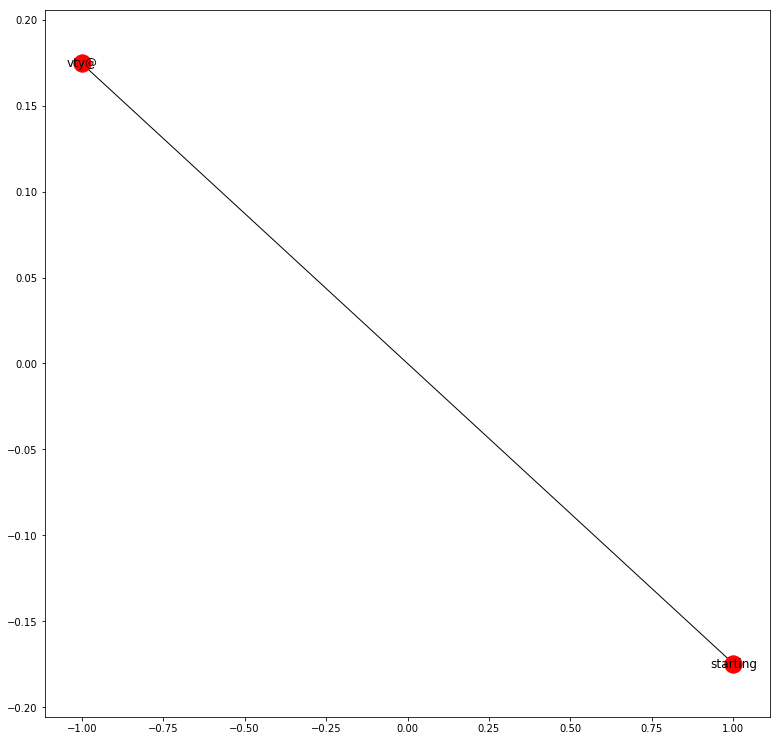

In [202]:
for i, nodes in enumerate(list(nx.connected_components(G))):
    H = G.copy()
    H.remove_nodes_from(G.nodes - nodes)
    plt.figure(figsize=(13, 13))
    pos = nx.spring_layout(H, k=0.001)
    nx.draw_networkx(H, pos=pos)
    plt.show()
    
    json_data = nx.node_link_data(H)
    f = open("./d3/vyos_nx_{}.json".format(i), "w")
    json.dump(json_data, f, ensure_ascii=False, indent=4, sort_keys=True, separators=(',', ': '))
    f.close()

In [ ]:
# with open("./d3/vyos_nx.json", "w") as f :
ag = nx.nx_agraph.to_agraph(G)
ag.draw("test.pdf", prog = 'circo')

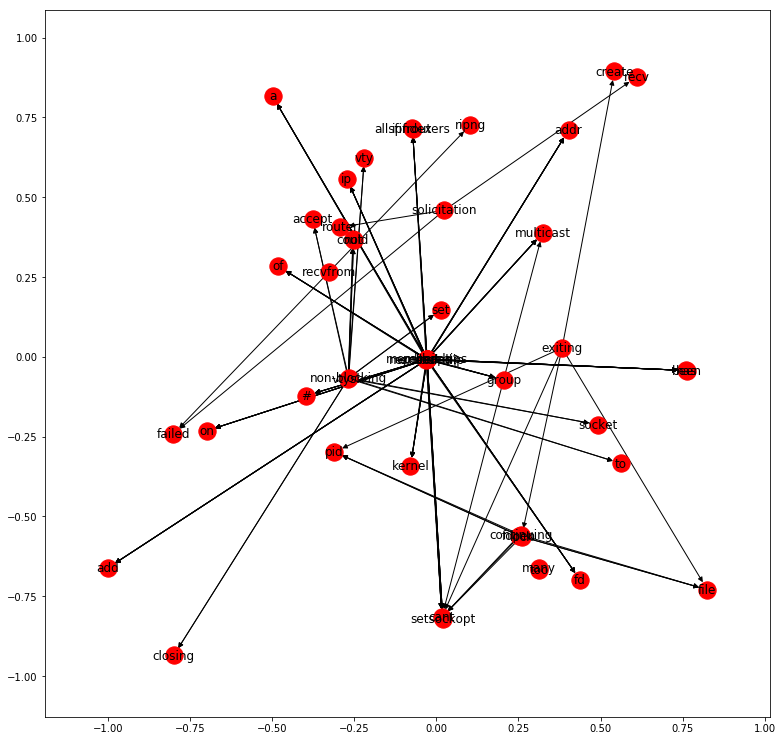

In [110]:
pos = nx.spring_layout(G, k=0.0001)

plt.figure(figsize=(13, 13))
nx.draw_networkx(G, pos=pos)
plt.show()

## LDA

### full length

In [25]:
stop_words = ["failed", "is", "cant", "not", "error", "to", "on", "of", "by", "for", "a", "from", "the", "with", "\\n"]

In [26]:
## stop word 除去
import random

eval_corpus = []
for c in corpus:
    eval_corpus.append([cc for cc in c if inv_word_dict[cc[0]] not in stop_words])
    
random.shuffle(eval_corpus)

In [30]:
lda3 = gensim.models.ldamodel.LdaModel(
                                      corpus=eval_corpus,
                                      chunksize=3,
                                      num_topics=22, 
                                      id2word=inv_word_dict, 
                                      minimum_probability=1e-8,
                                      iterations=100,
                                      decay=1.0,
                                      passes=1,
                                      per_word_topics=True)

In [287]:
for k,v in lt_per_inf.items():
    print('topic: ',k)
    for w in v:
        print("\t", [inv_word_dict[i[0]] for i in w])

topic:  18
	 ['zebra', 'rcvd', 'interface', 'add']
	 ['zebra', 'message', 'received']
	 ['unwanted', 'icmpv6', 'message', 'type']
	 ['no', 'retransmission', 'scheduled', 'next', 'interface']
	 ['ignoring', 'ifla', 'wireless', 'message']
	 ['keepalive', 'rcvd']
	 ['zebra', 'interface', 'address', 'read', 'cant', 'find', 'by', 'ifindex']
	 ['could', 'not', 'send', 'entire', 'message']
	 ['zebra', 'send', 'ipv4', 'route', 'add', 'nexthop']
	 ['rcvd', '/...duplicate', 'ignored']
	 ['message', 'zebra', 'interface', 'up']
	 ['rfc', '1073', 'violation', 'detected', 'telnet', 'naws', 'option', 'should', 'send', 'characters', 'but', 'we', 'received']
	 ['interface', 'invalid', 'packet', 'authtype']
	 ['interface', 'index', 'flags', '%#llx', 'metric', 'mtu', 'is', 'up']
	 ['bind', 'to', 'interface', 'failed']
	 ['message', 'zebra', 'interface', 'address', 'add', '/', 'on']
	 ['static', 'add', 'ipv4', 'allocating', 'policy', 'table']
	 ['zebra', 'route', 'delete', '/', 'nexthop']
	 ['zebra', 'int

	 ['cant', 'fopen', 'pid', 'lock', 'file', 'structure', 'needs', 'cleaning', 'continuing']
	 ['cant', 'create', 'pid', 'lock', 'file', 'wrong', 'medium', 'type', 'exiting']
	 ['cant', 'create', 'pid', 'lock', 'file', 'destination', 'address', 'required', 'exiting']
	 ['cant', 'create', 'pid', 'lock', 'file', 'is', 'a', 'directory', 'exiting']
	 ['cant', 'create', 'pid', 'lock', 'file', 'key', 'has', 'been', 'revoked', 'exiting']
	 ['cant', 'create', 'pid', 'lock', 'file', 'rfs', 'specific', 'error', 'exiting']
	 ['cant', 'fopen', 'pid', 'lock', 'file', 'srmount', 'error', 'continuing']
	 ['stream', 'recvmsg', 'failed']
	 ['cant', 'create', 'pid', 'lock', 'file', 'operation', 'already', 'in', 'progress', 'exiting']
	 ['cant', 'create', 'pid', 'lock', 'file', 'stale', 'handle', 'exiting']
	 ['cant', 'fopen', 'pid', 'lock', 'file', 'illegal', 'seek', 'continuing']
	 ['cant', 'fopen', 'pid', 'lock', 'file', 'bad', 'address', 'continuing']
	 ['cant', 'fopen', 'pid', 'lock', 'file', 'no', 'x

In [31]:
lt_per_inf = {}
for lt in corpus:
#     c = list(collections.Counter([word_dict[w] for w in string_to_corpus(lt, max_len=7)]).items())
    topic_dist, word_topic, word_topic_dist = lda3[lt]
    inf_topic = np.argmax(np.array([t[1] for t in topic_dist]))
    if inf_topic in lt_per_inf:
        lt_per_inf[inf_topic].append(lt)
    else:
        lt_per_inf[inf_topic] = [lt]

In [32]:
inf_topic_words = {}
for topic in range(lda3.num_topics):
    print(topic, [inv_word_dict[i[0]] for i in lda3.get_topic_terms(topic)])
    inf_topic_words[topic] = [inv_word_dict[i[0]] for i in lda3.get_topic_terms(topic)]

0 ['file', 'pid', 'such', 'shared', 'system', 'library', 'exec', 'interrupted', 'large', 'call']
1 ['lock', 'continuing', 'fopen', 'out', 'connection', 'level', 'number', 'endpoint', 'transport', 'connected']
2 ['has', 'fd', '0x', 'ip', 'ifindex', 'setsockopt', '#', 'been', 'remove', 'filtered']
3 ['ripng', 'bind', 'recvfrom', 'operation', 'smux', 'bad', 'get', 'available.', 'directory', 'register']
4 ['recv', 'solicitation', 'too', 'cannot', 'many', 'in', 'error.', 'resource', 'find', 'rip']
5 ['opaque', 'schedule', 'lsatype', 'opaquelsa', 'up', 'reoriginate', 'local', 'authentication', 'calculate', 'asbr']
6 ['neighbor', 'state', 'as', 'update', 'attribute', 'be', 'must', 'flagged', 'packetdd', 'an']
7 ['timer', 'flags', 'restart', 'routing', 'stream', 'connect', 'make', 'now', 'called', 'expire']
8 ['create', 'exiting', 'lock', 'available', 'buffer', 'space', 'fail', 'routerlsa', 'ioctl', 'inappropriate']
9 ['new', 'add', 'id', 'isis', 'lsp', 'circuit', 'dr', 'ipv4', 'l', 'allocate'

In [ ]:
results =  [np.argmax(l) for l in lda3.inference(eval_corpus)[0]]

inference_results = {}
for a,b in zip(eval_corpus, results):
    if b in inference_results:
        inference_results[b].append([inv_word_dict[c[0]] for c in a])
    else:
        inference_results[b] = [[inv_word_dict[c[0]] for c in a]]

In [ ]:
for topic in range(lda.num_topics):
    print(topic, [inv_word_dict[i[0]] for i in lda.get_topic_terms(topic)])
# print('1', [inv_word_dict[i[0]] for i in lda.get_topic_terms(1)])

In [ ]:
inf_ltids = {}
for ltid, inf_cat in results.items():
    if inf_cat in inf_ltids:
        inf_ltids[inf_cat].append(ltid)
    else:
        inf_ltids[inf_cat] = [ltid]

In [ ]:
for inf_cat, ltids in inf_ltids.items():
    print("topic:", inf_cat)
    for i in ltids:
        print(raw_lt[str(i)]['lt'])
    print()

### eval

- 外れたやつについて，調査

In [ ]:
compared_results = {}
for inf_cat, ltids in inf_ltids.items():
    for ltid in ltids:
        true_cat = raw_lt[str(ltid)]['cat']
        if true_cat in compared_results:
            compared_results[true_cat].append((ltid, inf_cat))
        else:
            compared_results[true_cat] = [(ltid, inf_cat)]

In [ ]:
for cat, res in compared_results.items():
    plt.figure(figsize=(15, 5))
    plt.title(cat)
    y = collections.Counter([r[1] for r in res])
    y = [y[i] if i in y else 0 for i in range(40)]
#     print(collections.Counter([r[1] for r in res]), y)
    plt.bar(np.arange(40), y)
    plt.show()